In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install gdown

In [ ]:
# Function to download file from Google Drive
def download_from_drive(file_id, filename):
    import gdown
    gdown.download(f'https://drive.google.com/uc?id={file_id}', filename, quiet=False)

# File IDs
train_file_id = '12bvugHAHFVKV75uCVgGE-8alesLI4Fsp'
test_file_id = '1C1TaKKT37N8LowW90eBq6STnem1Uh1KX'

# File names for saving locally
train_filename = 'train.csv'
test_filename = 'test.csv'

# Download the files
download_from_drive(train_file_id, train_filename)
download_from_drive(test_file_id, test_filename)

Downloading...
From (original): https://drive.google.com/uc?id=12bvugHAHFVKV75uCVgGE-8alesLI4Fsp
From (redirected): https://drive.google.com/uc?id=12bvugHAHFVKV75uCVgGE-8alesLI4Fsp&confirm=t&uuid=09f228b4-24ed-483e-8b53-2fed7a3ccbf1
To: /content/train.csv
100%|██████████| 165M/165M [00:02<00:00, 65.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C1TaKKT37N8LowW90eBq6STnem1Uh1KX
To: /content/test.csv
100%|██████████| 35.5M/35.5M [00:00<00:00, 59.7MB/s]


In [ ]:
# Read CSVs into pandas DataFrames
import pandas as pd
train_df = pd.read_csv(train_filename)
test_df = pd.read_csv(test_filename)

print("Train and test data loaded successfully!")

Train and test data loaded successfully!


# Exploratory Data Analysis ( EDA )

In [ ]:
print("Shape of the dataset - ")
print()
print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")
print()
print("----------------------------------")
print()
print("Top 5 rows of the dataset -")
print(train_df.head())
print()
print("----------------------------------")
print("Bottom 5 rows of the dataset -")
print(train_df.tail(5))
print("----------------------------------")
print()
print("Data Types:")
print()
print(train_df.dtypes)
print()
print("----------------------------------")
print()
print("Missing Values:")
print()
print(train_df.isnull().sum())
print()
print("----------------------------------")

Shape of the dataset - 

Training set shape: (279999, 2)
Testing set shape: (59999, 2)

----------------------------------

Top 5 rows of the dataset -
                                             QA Text                  Class
0  Question Title:\nWhat are the names of the 206...  Science & Mathematics
1  Question Title:\ncan you tell me the universit...  Education & Reference
2  Question Title:\nSuggestions or Advice on trac...  Politics & Government
3  Question Title:\nwhere can i find the system o...  Entertainment & Music
4  Question Title:\nwill the first tour match bet...                 Sports

----------------------------------
Bottom 5 rows of the dataset -
                                                  QA Text  \
279994  Question Title:\nDoes anyone know of a good ne...   
279995  Question Title:\nDo we really need a partner?\...   
279996  Question Title:\nDo all girls like to be spank...   
279997  Question Title:\nhow to find if a given graph ...   
279998  Question Tit

In [ ]:
# Check for unique questions
unique_questions = train_df['QA Text'].nunique()

# Check for duplicates in the QA Text column
duplicates = train_df['QA Text'].duplicated().sum()

# Display the number of unique questions and duplicated questions
print(f"Number of unique questions: {unique_questions}")
print(f"Number of duplicated questions: {duplicates}")

Number of unique questions: 279999
Number of duplicated questions: 0


In [ ]:
# Displaying the frequency distribution of the 'Class' column
print("Frequency distribution of 'Class' column (sorted from lowest to highest):")
print()
print(train_df['Class'].value_counts().sort_values(ascending=True))

Frequency distribution of 'Class' column (sorted from lowest to highest):

Class
Entertainment & Music     27797
Health                    27863
Science & Mathematics     27870
Computers & Internet      27962
Politics & Government     27988
Family & Relationships    28049
Society & Culture         28081
Business & Finance        28085
Sports                    28127
Education & Reference     28177
Name: count, dtype: int64


# Distribution of Number of QA Texts Across Classes

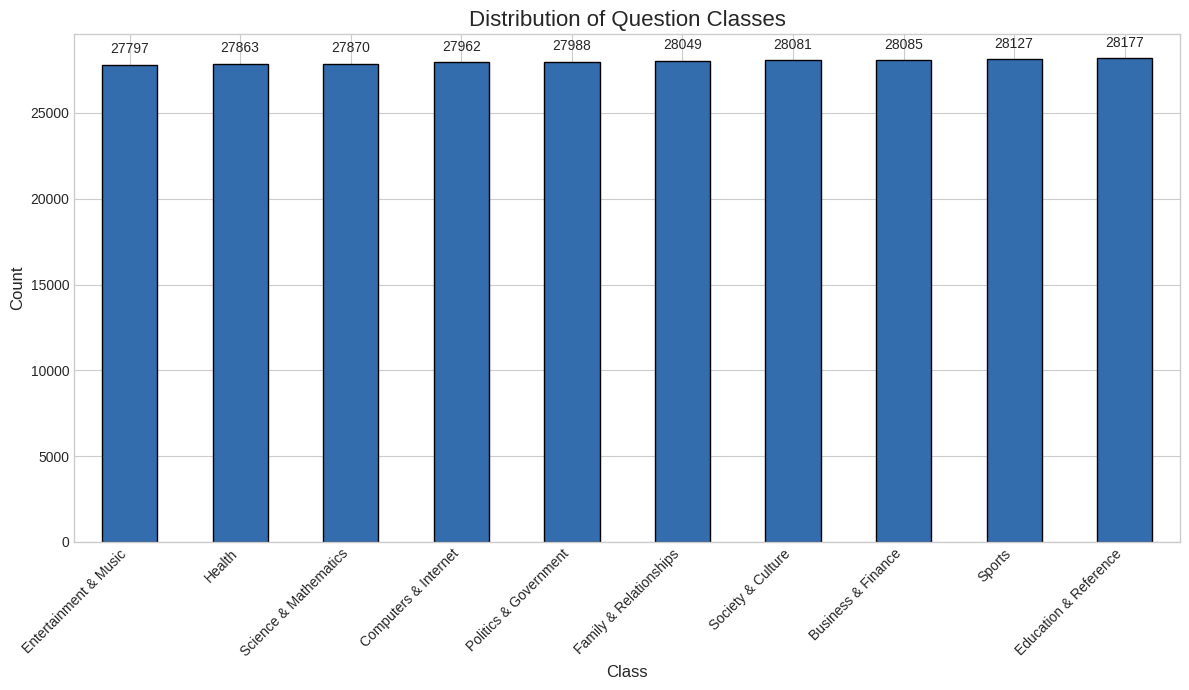

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a professional style
plt.style.use('seaborn-v0_8-whitegrid') # Using seaborn style for better aesthetics

class_counts = train_df['Class'].value_counts().sort_values(ascending=True) # Sort counts

plt.figure(figsize=(12, 7)) # Increased figure size for better readability
bars = class_counts.plot(kind='bar', color='#346DAE', edgecolor='black') # Using a single blue color

plt.title("Distribution of Question Classes", fontsize=16) # More descriptive title
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels and align to the right
plt.yticks(fontsize=10)


# Add the exact number on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, yval, ha='center', va='bottom', fontsize=10) # Adjusted vertical offset and font size

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# Calculate the length of 'QA Text' for each row
train_df['QA Text Length'] = train_df['QA Text'].apply(len)

# Calculate the average 'QA Text Length' for each 'Class'
average_text_length_by_class = train_df.groupby('Class')['QA Text Length'].mean().sort_values(ascending=True)

# Display the results
print("Average QA Text Length for Each Class:\n")
for class_name, avg_length in average_text_length_by_class.items():
    print(f"{class_name}: {avg_length:.2f} words")

Average QA Text Length for Each Class:

Entertainment & Music: 436.97 words
Sports: 447.85 words
Computers & Internet: 522.47 words
Business & Finance: 524.81 words
Education & Reference: 545.15 words
Family & Relationships: 586.89 words
Science & Mathematics: 629.62 words
Health: 652.14 words
Society & Culture: 667.43 words
Politics & Government: 668.56 words


# Bar Plot of Average QA Text Length by Each Class

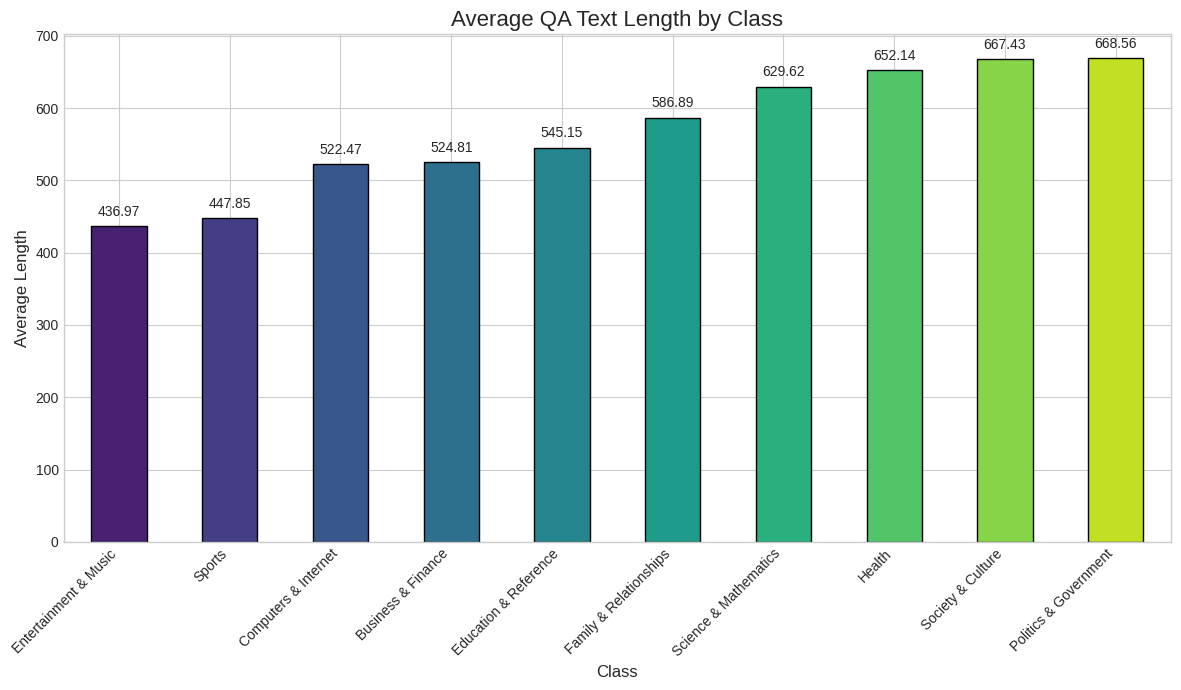

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a professional style
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 7))
bars = average_text_length_by_class.plot(kind='bar', color=sns.color_palette("viridis", len(average_text_length_by_class)), edgecolor='black')

plt.title("Average QA Text Length by Class", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Average Length", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)

# Add the exact number on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom', fontsize=10) # Display rounded average length

plt.tight_layout()
plt.show()

# WordCloud of QA Texts (Before Preprocessing)

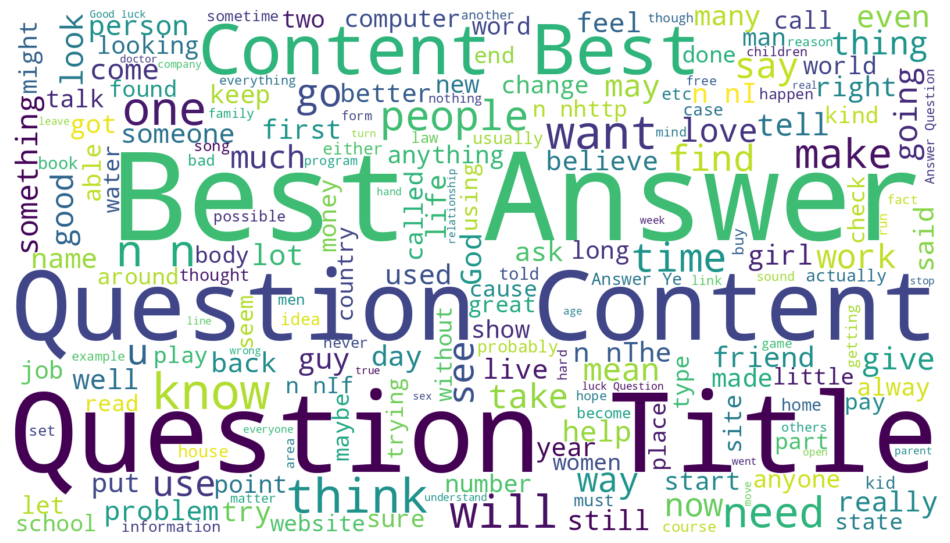

In [ ]:
from wordcloud import WordCloud

text = " ".join(train_df["QA Text"].astype(str))
wordcloud = WordCloud(width=1600, height=900, background_color='white').generate(text)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# **Pre-Processing**

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.0
    Uninstalling spacy-3.7.0:
      Successfully uninstalled spacy-3.7.0
  Attempting uninstall: en-core-web-sm
    Found existing installation: en_core_web_sm 3.8.0
    Uninstalling en_core_web_sm-3.8.0:
      Successfully uninstalled en_core_web_sm-3.8.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!pip install contractions spacy==3.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing in

In [ ]:
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
train_df.head(5)

,QA Text,Class
0,Question Title:\nWhat are the names of the 206...,Science & Mathematics
1,Question Title:\ncan you tell me the universit...,Education & Reference
2,Question Title:\nSuggestions or Advice on trac...,Politics & Government
3,Question Title:\nwhere can i find the system o...,Entertainment & Music
4,Question Title:\nwill the first tour match bet...,Sports


In [ ]:
check_df = train_df.head(20).copy()
check_df

,QA Text,Class
0,Question Title:\nWhat are the names of the 206...,Science & Mathematics
1,Question Title:\ncan you tell me the universit...,Education & Reference
2,Question Title:\nSuggestions or Advice on trac...,Politics & Government
3,Question Title:\nwhere can i find the system o...,Entertainment & Music
4,Question Title:\nwill the first tour match bet...,Sports
5,Question Title:\nWhy is the world in such a me...,Politics & Government
6,Question Title:\nwhat is thehistory of public ...,Politics & Government
7,Question Title:\nWhat qualities make one a goo...,Society & Culture
8,Question Title:\nWhy is there so little precip...,Science & Mathematics
9,Question Title:\nWhy do inmates appearing in c...,Politics & Government


In [ ]:
# ============================
# Preprocessing (Upgraded)
# ============================

import re, nltk, pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


TRAIN_CSV = "train.csv"
TEST_CSV  = "test.csv"
OUT_TRAIN = "train_cleaned.csv"
OUT_TEST  = "test_cleaned.csv"

TEXT_COL  = "QA Text"   # source text column
LABEL_COL = "Class"     # label column

# ---- Stopwords (keep negations) ----
stop_words = set(stopwords.words("english"))
neg_keep = {"no", "not", "nor", "never", "without", "cannot"}
stop_words = stop_words.difference(neg_keep)

lemm = WordNetLemmatizer()

# ---- Regexes ----
RE_BOILER = re.compile(r"(question\s*title:|question\s*content:|best\s*answer:)", re.I)
RE_URL    = re.compile(r"(https?://\S+|www\.\S+)", re.I)
RE_EMAIL  = re.compile(r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}")
RE_HTML   = re.compile(r"&(amp|quot|apos|lt|gt);")

# Dates (ISO 2025-01-10 | 10/01/2025 | 10.01.2025 | '10 January 2025' | 'January 10, 2025')
RE_DATE = re.compile(
    r"\b("                                   # begin group
    r"\d{4}-\d{2}-\d{2}"                     # 2025-01-10
    r"|\d{1,2}[./-]\d{1,2}[./-]\d{4}"        # 10.01.2025 / 10-01-2025 / 10/01/2025
    r"|\d{1,2}\s+[A-Za-z]{3,9}\s+\d{4}"      # 10 January 2025
    r"|[A-Za-z]{3,9}\s+\d{1,2},\s*\d{4}"     # January 10, 2025
    r")\b"
)

RE_YEAR = re.compile(r"\b(19|20)\d{2}\b")        # 4-digit years 1900–2099
RE_PCT  = re.compile(r"\b\d+([.,]\d+)?\s*%")     # 12.5% or 12%
RE_CURR = re.compile(r"[$€£₹]\s*\d+([.,]\d+)?")  # $12.50, €30, ₹100
RE_NUM  = re.compile(r"\b\d+([.,]\d+)?\b")       # generic numbers

# keep angle-bracket placeholders + letters + spaces
RE_KEEP = re.compile(r"[^a-z<> ]+")
RE_WS   = re.compile(r"\s+")

# ---- Safe contraction expansion (lightweight, no external deps) ----
_CONTRACTION_RULES = [
    (re.compile(r"\b(can)['’]t\b", re.I), "cannot"),
    (re.compile(r"\b(won)['’]t\b", re.I), "will not"),
    (re.compile(r"\b(shan)['’]t\b", re.I), "shall not"),
    (re.compile(r"n['’]t\b", re.I), " not"),
    (re.compile(r"['’]re\b", re.I), " are"),
    (re.compile(r"['’]ve\b", re.I), " have"),
    (re.compile(r"['’]ll\b", re.I), " will"),
    (re.compile(r"['’]d\b", re.I), " would"),
    (re.compile(r"['’]m\b", re.I), " am"),
    (re.compile(r"['’]s\b", re.I), " is"),
]
def expand_contractions_safe(text: str) -> str:
    s = text
    for pat, rep in _CONTRACTION_RULES:
        s = pat.sub(rep, s)
    return s

# ---- Number normalization (order matters: date -> year -> % -> money -> generic) ----
def normalize_numbers(text: str) -> str:
    s = RE_DATE.sub("<date>", text)
    s = RE_YEAR.sub("<year>", s)
    s = RE_PCT.sub("<percent>", s)
    s = RE_CURR.sub("<money>", s)
    s = RE_NUM.sub("<num>", s)
    return s

# ---- Main cleaner ----
def clean_text(text: str, for_nn: bool = False):
    """
    If for_nn=False → returns a CLEAN STRING for BoW/TF-IDF/MLP
    If for_nn=True  → returns a TOKEN LIST for embeddings/RNNs
    """
    if not isinstance(text, str):
        text = "" if text is None else str(text)

    # 1) remove dataset boilerplate + newlines
    s = RE_BOILER.sub(" ", text.replace("\\n", " ").replace("\n", " "))

    # 2) expand contractions (preserve negation signal)
    s = expand_contractions_safe(s)

    # 3) protect URLs/emails first (become placeholders), then numbers
    s = RE_URL.sub("<url>", s)
    s = RE_EMAIL.sub("<email>", s)
    s = normalize_numbers(s)

    # 4) lowercase + strip HTML entities
    s = s.lower()
    s = RE_HTML.sub(" ", s)

    # 5) keep only letters/placeholders/spaces → collapse whitespace
    s = RE_KEEP.sub(" ", s)
    s = RE_WS.sub(" ", s).strip()

    # 6) tokenization (whitespace)
    toks = [t for t in s.split() if t]

    # 7) stopword filter (keep placeholders), then lemmatize non-placeholders
    placeholders = {"<num>", "<url>", "<email>", "<money>", "<percent>", "<date>", "<year>"}
    toks = [t for t in toks if (t in placeholders) or (t not in stop_words and len(t) > 2)]
    toks = [t if t in placeholders else lemm.lemmatize(t) for t in toks]

    return toks if for_nn else " ".join(toks)

# ============================
# Apply to data
# ============================
train_df = pd.read_csv(TRAIN_CSV)
test_df  = pd.read_csv(TEST_CSV)

# (Optional) drop exact duplicates to reduce leakage
before = len(train_df)
train_df = train_df.drop_duplicates(subset=[TEXT_COL, LABEL_COL]).reset_index(drop=True)
after = len(train_df)
if after != before:
    print(f"Removed {before - after} duplicate rows from training set.")

# Produce both views
train_df["clean_text"] = train_df[TEXT_COL].apply(lambda x: clean_text(x, for_nn=False))
test_df["clean_text"]  = test_df[TEXT_COL].apply(lambda x: clean_text(x, for_nn=False))

train_df["tokens"] = train_df[TEXT_COL].apply(lambda x: clean_text(x, for_nn=True))
test_df["tokens"]  = test_df[TEXT_COL].apply(lambda x: clean_text(x, for_nn=True))

# Preview a few rows
for i in range(3):
    print(f"\n=== Sample {i+1} ===")
    print("Original:", str(train_df[TEXT_COL].iloc[i])[:220].replace("\n"," "), "...")
    print("Cleaned (ML str):", train_df["clean_text"].iloc[i][:220], "...")
    print("Cleaned (NN toks):", train_df["tokens"].iloc[i][:25], "...")

# Save cleaned CSVs
train_df.to_csv(OUT_TRAIN, index=False)
test_df.to_csv(OUT_TEST, index=False)
print(f"\nSaved cleaned files → {OUT_TRAIN}, {OUT_TEST}")



=== Sample 1 ===
Original: Question Title: What are the names of the 206 bones in the human body? Question Content:  Best Answer: 206 bones of the human body:\n\nSKULL - AXIAL SKELETON\nCranial Bones \n    2 parietal\n    2 temporal\n    1 frontal ...
Cleaned (ML str): name <num> bone human body <num> bone human body skull axial skeleton cranial bone <num> parietal <num> temporal <num> frontal <num> occipital <num> sphenoid <num> ethmoid facial bone <num> mandible <num> vomer <num> max ...
Cleaned (NN toks): ['name', '<num>', 'bone', 'human', 'body', '<num>', 'bone', 'human', 'body', 'skull', 'axial', 'skeleton', 'cranial', 'bone', '<num>', 'parietal', '<num>', 'temporal', '<num>', 'frontal', '<num>', 'occipital', '<num>', 'sphenoid', '<num>'] ...

=== Sample 2 ===
Original: Question Title: can you tell me the university name in which i can do distance mphil foods & nutrition .? Question Content:  Best Answer: Nutrition Graduate Programs in United Kingdom and Ireland \nEarn Your Gradu

In [ ]:
# Export the DataFrame to a CSV file
check_df.to_csv('cleaned_data.csv', index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


In [ ]:
from google.colab import files

files.download("train_cleaned.csv")
files.download("test_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train/Validation split (from training only)**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_all = le.fit_transform(train_df["Class"])
y_test = le.transform(test_df["Class"])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
idx_train, idx_val = next(sss.split(train_df, y_all))

tr_df, val_df = train_df.iloc[idx_train].reset_index(drop=True), train_df.iloc[idx_val].reset_index(drop=True)
y_tr, y_val   = y_all[idx_train], y_all[idx_val]

num_classes = len(le.classes_)
labels_names = list(le.classes_)
print("Classes:", list(le.classes_))
print(f"Split -> Train: {tr_df.shape}, Val: {val_df.shape}, Test: {test_df.shape}")


Classes: ['Business & Finance', 'Computers & Internet', 'Education & Reference', 'Entertainment & Music', 'Family & Relationships', 'Health', 'Politics & Government', 'Science & Mathematics', 'Society & Culture', 'Sports']
Split -> Train: (237999, 4), Val: (42000, 4), Test: (59999, 4)


## Helpers(metrics,logs,reports)

In [ ]:
import json, itertools, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def compute_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro")
    f1w = f1_score(y_true, y_pred, average="weighted")
    return acc, f1m, f1w

def show_report_and_cm(y_true, y_pred, labels, title=""):
    print("\n" + "="*80)
    print(title)
    print(classification_report(y_true, y_pred, target_names=labels, digits=3))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    plt.imshow(cm, interpolation="nearest")
    plt.title(title + " — Confusion Matrix")
    plt.colorbar()
    ticks = np.arange(len(labels))
    plt.xticks(ticks, ticks, rotation=45); plt.yticks(ticks, ticks)
    plt.tight_layout(); plt.xlabel("Predicted"); plt.ylabel("True")
    plt.show()

# Container to collect ONLY BoW experiment results in this section
bow_results = []
def log_bow(model_name, params, y_val_pred, y_test_pred):
    val_metrics  = compute_metrics(y_val,  y_val_pred)
    test_metrics = compute_metrics(y_test, y_test_pred)
    row = {
        "repr":"BoW", "model":model_name, "params":json.dumps(params),
        "val_acc":val_metrics[0], "val_f1_macro":val_metrics[1], "val_f1_weighted":val_metrics[2],
        "test_acc":test_metrics[0], "test_f1_macro":test_metrics[1], "test_f1_weighted":test_metrics[2],
    }
    bow_results.append(row)
    print(f"  {model_name} | best params: {params}")
    print(f"   Val F1(macro): {val_metrics[1]:.4f} | Test F1(macro): {test_metrics[1]:.4f}")


# **Bag of Words (BoW)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


BOW_MAX_FEATURES = 30000
BOW_NGRAM_RANGE  = (1,1)

bow_vec = CountVectorizer(
    min_df=3,
    max_df=0.9,
    max_features=BOW_MAX_FEATURES,
    ngram_range=BOW_NGRAM_RANGE
)

Xtr_bow  = bow_vec.fit_transform(tr_df["clean_text"])
Xval_bow = bow_vec.transform(val_df["clean_text"])
Xtest_bow= bow_vec.transform(test_df["clean_text"])

print(f"[BoW] vocabulary size = {len(bow_vec.vocabulary_):,}")
print("Shapes:", Xtr_bow.shape, Xval_bow.shape, Xtest_bow.shape)


[BoW] vocabulary size = 30,000
Shapes: (237999, 30000) (42000, 30000) (59999, 30000)


# Inspect BoW Samples

In [ ]:

vocab = np.array(bow_vec.get_feature_names_out())

# Top 25 most frequent tokens in the training split
term_freqs = np.asarray(Xtr_bow.sum(axis=0)).ravel()
top_idx = term_freqs.argsort()[::-1][:25]
print("Top 25 tokens:", vocab[top_idx].tolist())

# Show non-zero BoW tokens for a couple of val samples
def pretty_print_bow(ix):
    row = Xval_bow[ix]
    nz_idx = row.nonzero()[1]
    pairs = sorted([(vocab[j], row[0, j]) for j in nz_idx], key=lambda x: -x[1])
    print(f"\n— Val sample {ix} —")
    print("Text:", val_df['clean_text'].iloc[ix][:200], "...")
    print("Tokens(count):", pairs[:20])

pretty_print_bow(0)
pretty_print_bow(1)


Top 25 tokens: ['num', 'not', 'would', 'like', 'get', 'one', 'know', 'year', 'think', 'time', 'people', 'want', 'good', 'need', 'help', 'make', 'url', 'also', 'thing', 'way', 'say', 'really', 'find', 'work', 'see']

— Val sample 0 —
Text: interracial dateing wrong interracical relationship love boyfriend mean world little sister dateing boy mixed parent not like mom sayies well make happy dad hate right hime hate grandparent not wnat m ...
Tokens(count): [('not', np.int64(4)), ('happy', np.int64(3)), ('make', np.int64(3)), ('parent', np.int64(3)), ('becasue', np.int64(2)), ('believe', np.int64(2)), ('boyfriend', np.int64(2)), ('dateing', np.int64(2)), ('father', np.int64(2)), ('hate', np.int64(2)), ('think', np.int64(2)), ('wrong', np.int64(2)), ('wut', np.int64(2)), ('around', np.int64(1)), ('background', np.int64(1)), ('bella', np.int64(1)), ('best', np.int64(1)), ('boy', np.int64(1)), ('come', np.int64(1)), ('dad', np.int64(1))]

— Val sample 1 —
Text: animal human ape name baby yes

# Naive Bayes on BoW Samples


BoW + Naive Bayes (Val) | alpha=0.5
                        precision    recall  f1-score   support

    Business & Finance      0.571     0.508     0.538      4213
  Computers & Internet      0.799     0.871     0.834      4194
 Education & Reference      0.563     0.443     0.496      4227
 Entertainment & Music      0.611     0.701     0.653      4170
Family & Relationships      0.605     0.819     0.696      4207
                Health      0.753     0.772     0.762      4179
 Politics & Government      0.755     0.718     0.736      4198
 Science & Mathematics      0.721     0.700     0.710      4181
     Society & Culture      0.614     0.519     0.563      4212
                Sports      0.874     0.823     0.848      4219

              accuracy                          0.687     42000
             macro avg      0.687     0.688     0.684     42000
          weighted avg      0.687     0.687     0.683     42000



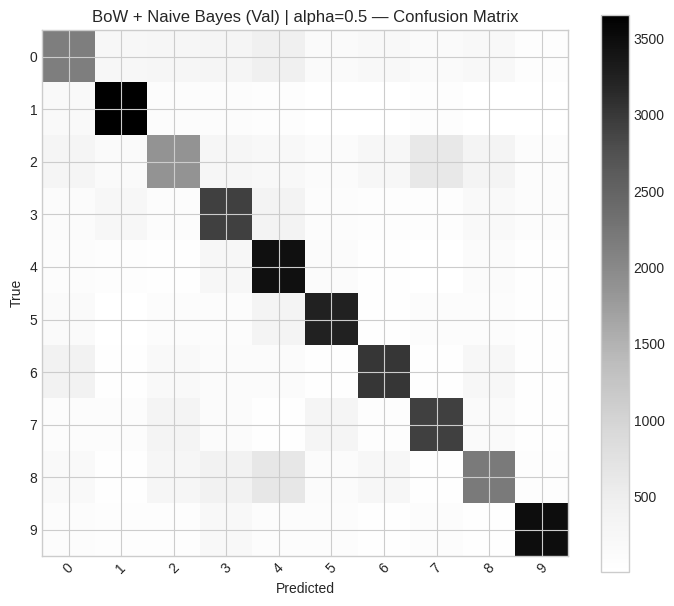


BoW + Naive Bayes (Val) | alpha=1.0
                        precision    recall  f1-score   support

    Business & Finance      0.571     0.509     0.538      4213
  Computers & Internet      0.796     0.871     0.832      4194
 Education & Reference      0.567     0.440     0.495      4227
 Entertainment & Music      0.615     0.699     0.654      4170
Family & Relationships      0.602     0.822     0.695      4207
                Health      0.751     0.773     0.762      4179
 Politics & Government      0.752     0.719     0.735      4198
 Science & Mathematics      0.722     0.702     0.712      4181
     Society & Culture      0.615     0.518     0.562      4212
                Sports      0.875     0.821     0.847      4219

              accuracy                          0.687     42000
             macro avg      0.687     0.687     0.683     42000
          weighted avg      0.687     0.687     0.683     42000



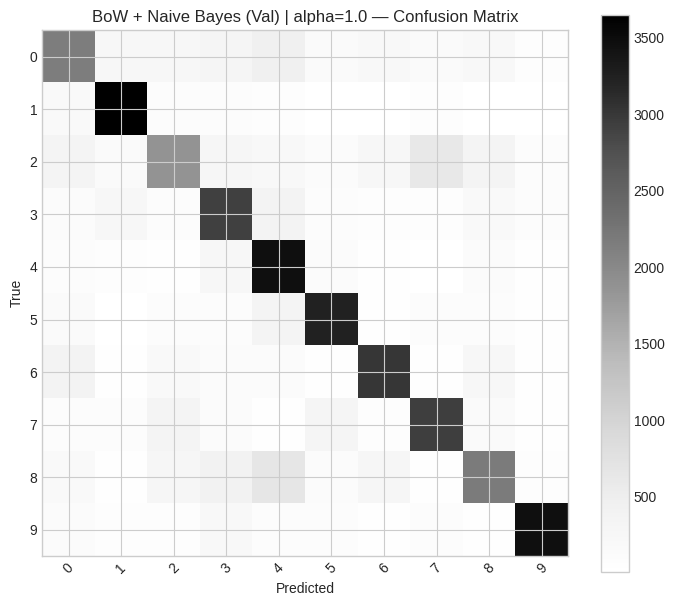


BoW + Naive Bayes (Val) | alpha=1.5
                        precision    recall  f1-score   support

    Business & Finance      0.569     0.508     0.537      4213
  Computers & Internet      0.791     0.871     0.829      4194
 Education & Reference      0.567     0.437     0.494      4227
 Entertainment & Music      0.619     0.698     0.656      4170
Family & Relationships      0.600     0.826     0.695      4207
                Health      0.749     0.773     0.761      4179
 Politics & Government      0.751     0.720     0.735      4198
 Science & Mathematics      0.722     0.701     0.712      4181
     Society & Culture      0.617     0.518     0.563      4212
                Sports      0.875     0.818     0.846      4219

              accuracy                          0.687     42000
             macro avg      0.686     0.687     0.683     42000
          weighted avg      0.686     0.687     0.682     42000



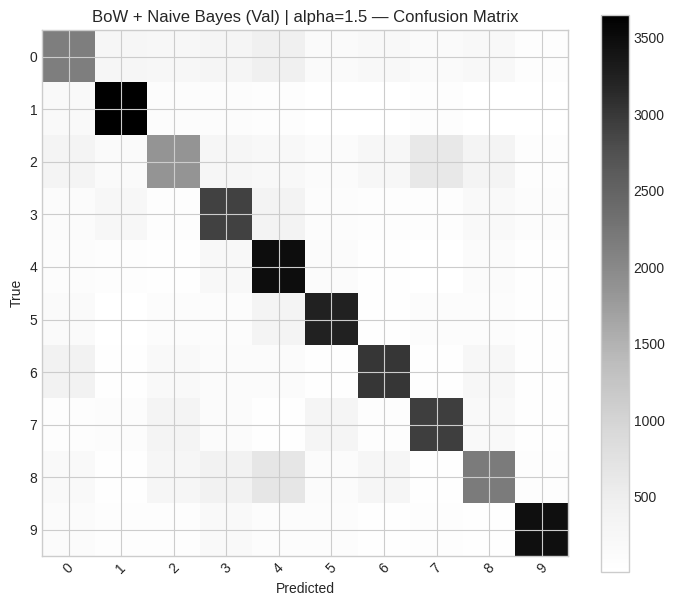

✅ Selected NB params (Val F1-macro=0.6836): alpha=0.5

BoW + Naive Bayes (Test)
                        precision    recall  f1-score   support

    Business & Finance      0.569     0.505     0.535      6000
  Computers & Internet      0.796     0.866     0.830      6000
 Education & Reference      0.572     0.443     0.499      6000
 Entertainment & Music      0.618     0.706     0.659      6000
Family & Relationships      0.598     0.803     0.686      5999
                Health      0.742     0.771     0.756      6000
 Politics & Government      0.759     0.733     0.746      6000
 Science & Mathematics      0.730     0.708     0.719      6000
     Society & Culture      0.613     0.517     0.561      6000
                Sports      0.874     0.826     0.849      6000

              accuracy                          0.688     59999
             macro avg      0.687     0.688     0.684     59999
          weighted avg      0.687     0.688     0.684     59999



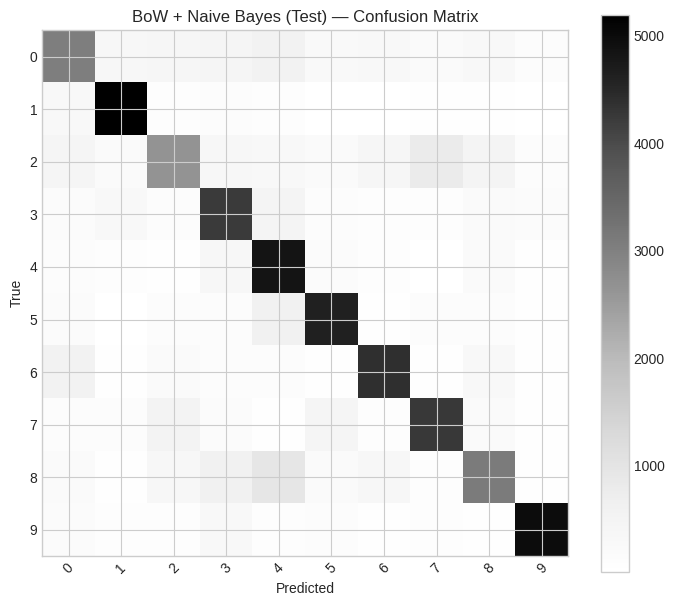

  MultinomialNB | best params: {'alpha': 0.5}
   Val F1(macro): 0.6836 | Test F1(macro): 0.6841


In [ ]:
# ===== Step 2: BoW + Naive Bayes =====
from sklearn.naive_bayes import MultinomialNB

# --- 1. Hyperparameter tuning on validation ---
alphas = [0.5, 1.0, 1.5]   # smoothing values to try
best_alpha, best_val_f1 = None, -1.0

for a in alphas:
    nb = MultinomialNB(alpha=a).fit(Xtr_bow, y_tr)
    y_val_pred = nb.predict(Xval_bow)

    # Show validation performance
    show_report_and_cm(y_val, y_val_pred, labels_names,
                       title=f"BoW + Naive Bayes (Val) | alpha={a}")

    # Track the best setting by F1-macro
    _, f1m, _ = compute_metrics(y_val, y_val_pred)
    if f1m > best_val_f1:
        best_val_f1, best_alpha = f1m, a

print(f"✅ Selected NB params (Val F1-macro={best_val_f1:.4f}): alpha={best_alpha}")

# --- 2. Retrain on (train+val) with best params ---
from sklearn.utils import shuffle
bow_vec_full = CountVectorizer(
    min_df=3, max_df=0.9, max_features=BOW_MAX_FEATURES, ngram_range=BOW_NGRAM_RANGE
)
Xfull_bow = bow_vec_full.fit_transform(
    pd.concat([tr_df["clean_text"], val_df["clean_text"]], axis=0)
)
y_full = np.concatenate([y_tr, y_val], axis=0)
Xtest_bow = bow_vec_full.transform(test_df["clean_text"])

nb_final = MultinomialNB(alpha=best_alpha).fit(Xfull_bow, y_full)
y_test_pred_nb = nb_final.predict(Xtest_bow)

# --- 3. Test evaluation (only once, as per project rules) ---
show_report_and_cm(y_test, y_test_pred_nb, labels_names,
                   title="BoW + Naive Bayes (Test)")

# --- 4. Log results for summary ---
nb_val = MultinomialNB(alpha=best_alpha).fit(Xtr_bow, y_tr)
y_val_pred_nb = nb_val.predict(Xval_bow)
log_bow("MultinomialNB", {"alpha": best_alpha}, y_val_pred_nb, y_test_pred_nb)


# Logistic Regression on BoW

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



BoW + Logistic Regression (Val) | C=0.5 (saga)
                        precision    recall  f1-score   support

    Business & Finance      0.587     0.451     0.510      4213
  Computers & Internet      0.730     0.822     0.773      4194
 Education & Reference      0.528     0.459     0.491      4227
 Entertainment & Music      0.594     0.618     0.605      4170
Family & Relationships      0.637     0.741     0.685      4207
                Health      0.699     0.737     0.718      4179
 Politics & Government      0.707     0.697     0.702      4198
 Science & Mathematics      0.649     0.685     0.666      4181
     Society & Culture      0.568     0.525     0.546      4212
                Sports      0.753     0.766     0.759      4219

              accuracy                          0.650     42000
             macro avg      0.645     0.650     0.646     42000
          weighted avg      0.645     0.650     0.645     42000



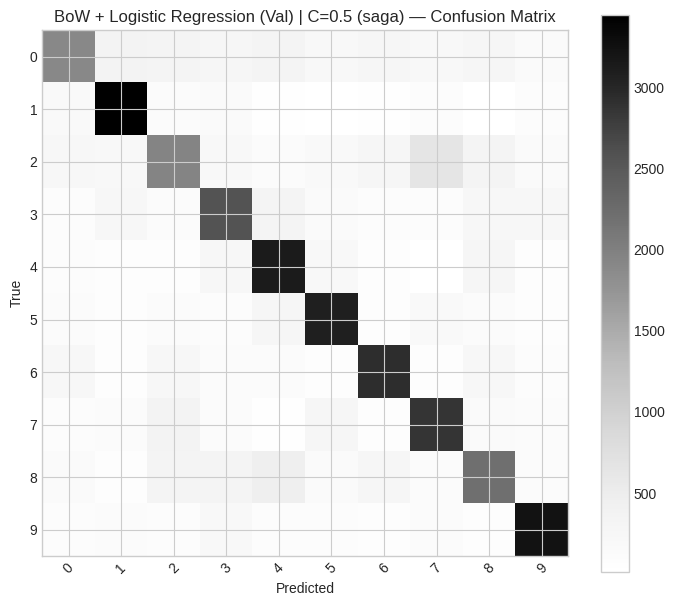

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



BoW + Logistic Regression (Val) | C=1.0 (saga)
                        precision    recall  f1-score   support

    Business & Finance      0.587     0.451     0.510      4213
  Computers & Internet      0.730     0.822     0.773      4194
 Education & Reference      0.528     0.459     0.491      4227
 Entertainment & Music      0.594     0.617     0.605      4170
Family & Relationships      0.637     0.741     0.685      4207
                Health      0.699     0.737     0.718      4179
 Politics & Government      0.707     0.697     0.702      4198
 Science & Mathematics      0.649     0.685     0.666      4181
     Society & Culture      0.568     0.525     0.546      4212
                Sports      0.753     0.766     0.759      4219

              accuracy                          0.650     42000
             macro avg      0.645     0.650     0.646     42000
          weighted avg      0.645     0.650     0.645     42000



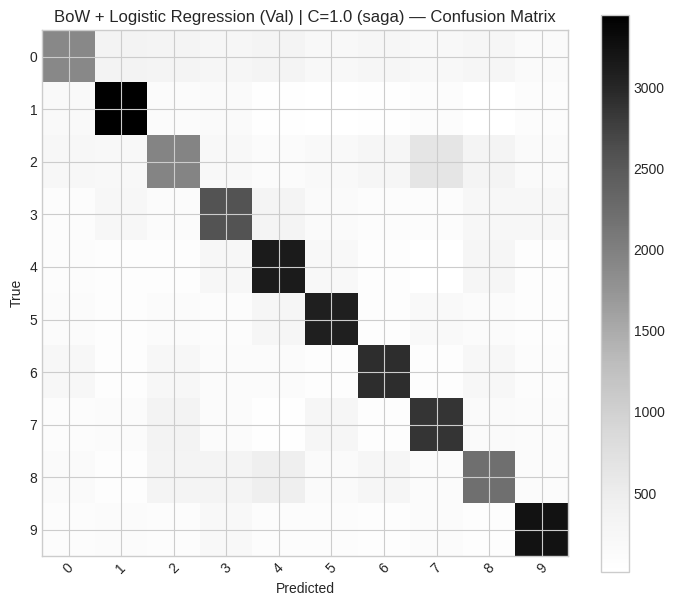

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



BoW + Logistic Regression (Val) | C=2.0 (saga)
                        precision    recall  f1-score   support

    Business & Finance      0.587     0.451     0.510      4213
  Computers & Internet      0.730     0.822     0.773      4194
 Education & Reference      0.528     0.459     0.491      4227
 Entertainment & Music      0.594     0.618     0.605      4170
Family & Relationships      0.637     0.741     0.685      4207
                Health      0.700     0.737     0.718      4179
 Politics & Government      0.707     0.697     0.702      4198
 Science & Mathematics      0.649     0.685     0.666      4181
     Society & Culture      0.568     0.525     0.546      4212
                Sports      0.753     0.766     0.759      4219

              accuracy                          0.650     42000
             macro avg      0.645     0.650     0.646     42000
          weighted avg      0.645     0.650     0.646     42000



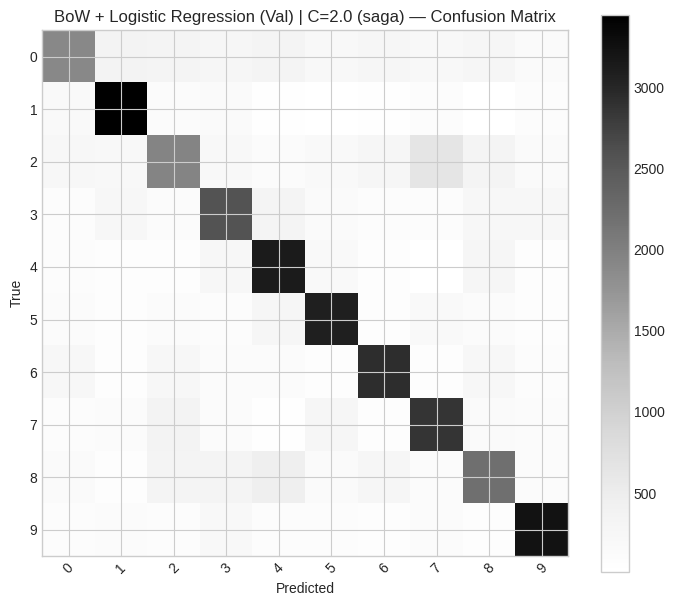

✅ Selected LR params (Val F1-macro=0.6457): {'C': 2.0, 'max_iter': 300, 'solver': 'saga', 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2'}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



BoW + Logistic Regression (Test)
                        precision    recall  f1-score   support

    Business & Finance      0.574     0.453     0.506      6000
  Computers & Internet      0.736     0.830     0.780      6000
 Education & Reference      0.520     0.452     0.484      6000
 Entertainment & Music      0.595     0.627     0.611      6000
Family & Relationships      0.643     0.731     0.684      5999
                Health      0.695     0.743     0.718      6000
 Politics & Government      0.708     0.706     0.707      6000
 Science & Mathematics      0.667     0.700     0.683      6000
     Society & Culture      0.567     0.512     0.538      6000
                Sports      0.774     0.776     0.775      6000

              accuracy                          0.653     59999
             macro avg      0.648     0.653     0.649     59999
          weighted avg      0.648     0.653     0.649     59999



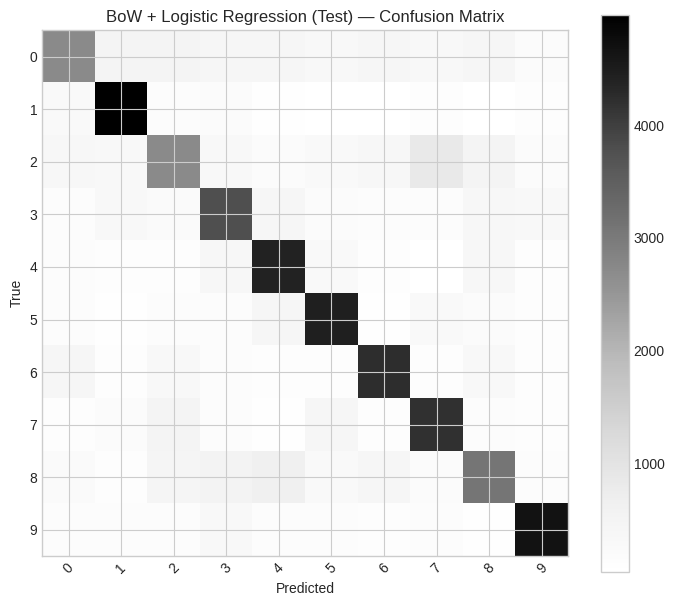

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  LogisticRegression | best params: {'C': 2.0, 'max_iter': 300, 'solver': 'saga', 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2'}
   Val F1(macro): 0.6456 | Test F1(macro): 0.6487


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# ===== BoW + Logistic Regression (sparse-safe, Colab-stable) =====
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1) Hyperparameter tuning on validation (use SAGA for sparse + multinomial)
C_values = [0.5, 1.0, 2.0]
best_params, best_val_f1 = None, -1.0

for C in C_values:
    lr = LogisticRegression(
        C=C,
        max_iter=300,
        solver="saga",
        multi_class="multinomial",
        n_jobs=None,
        penalty="l2"
    )
    lr.fit(Xtr_bow, y_tr)
    y_val_pred = lr.predict(Xval_bow)

    show_report_and_cm(y_val, y_val_pred, labels_names,
                       title=f"BoW + Logistic Regression (Val) | C={C} (saga)")
    _, f1m, _ = compute_metrics(y_val, y_val_pred)
    if f1m > best_val_f1:
        best_val_f1 = f1m
        best_params = {
            "C": C, "max_iter": 300, "solver": "saga",
            "multi_class": "multinomial", "n_jobs": None, "penalty": "l2"
        }

print(f"Selected LR params (Val F1-macro={best_val_f1:.4f}): {best_params}")

# 2) Retrain on (train+val) with the same BoW settings and evaluate on test
from sklearn.feature_extraction.text import CountVectorizer
bow_vec_full = CountVectorizer(
    min_df=3, max_df=0.9, max_features=BOW_MAX_FEATURES, ngram_range=BOW_NGRAM_RANGE
)
Xfull_bow = bow_vec_full.fit_transform(
    pd.concat([tr_df['clean_text'], val_df['clean_text']], axis=0)
)
y_full = np.concatenate([y_tr, y_val], axis=0)
Xtest_bow = bow_vec_full.transform(test_df['clean_text'])

lr_final = LogisticRegression(**best_params)
lr_final.fit(Xfull_bow, y_full)
y_test_pred_lr = lr_final.predict(Xtest_bow)

show_report_and_cm(y_test, y_test_pred_lr, labels_names,
                   title="BoW + Logistic Regression (Test)")

# 3) Log results (compute val preds with the original val matrices)
lr_val = LogisticRegression(**best_params).fit(Xtr_bow, y_tr)
y_val_pred_lr = lr_val.predict(Xval_bow)
log_bow("LogisticRegression", best_params, y_val_pred_lr, y_test_pred_lr)


# Random Forest on BoW


BoW(SVD 256) + RandomForest (Val) | depth=None
                        precision    recall  f1-score   support

    Business & Finance      0.432     0.380     0.405      4213
  Computers & Internet      0.661     0.723     0.691      4194
 Education & Reference      0.416     0.353     0.382      4227
 Entertainment & Music      0.438     0.457     0.447      4170
Family & Relationships      0.526     0.684     0.595      4207
                Health      0.557     0.620     0.586      4179
 Politics & Government      0.565     0.546     0.556      4198
 Science & Mathematics      0.555     0.579     0.567      4181
     Society & Culture      0.480     0.422     0.449      4212
                Sports      0.692     0.577     0.629      4219

              accuracy                          0.534     42000
             macro avg      0.532     0.534     0.531     42000
          weighted avg      0.532     0.534     0.531     42000



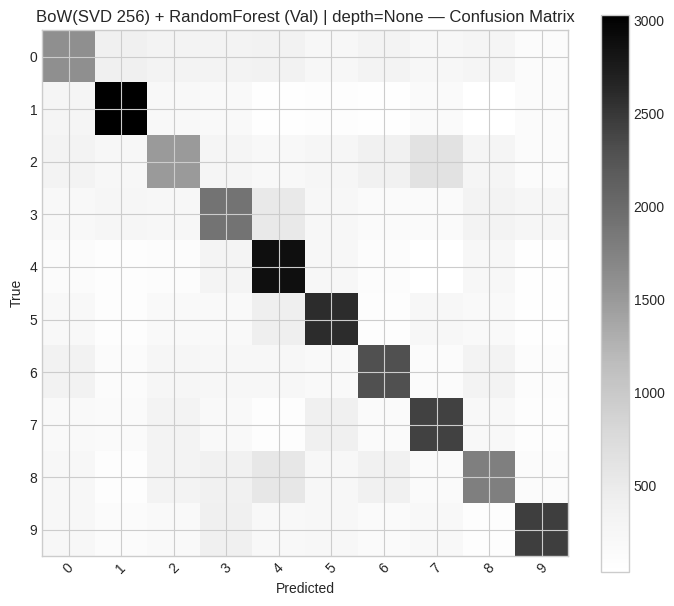


BoW(SVD 256) + RandomForest (Val) | depth=40
                        precision    recall  f1-score   support

    Business & Finance      0.439     0.383     0.409      4213
  Computers & Internet      0.662     0.723     0.691      4194
 Education & Reference      0.417     0.361     0.387      4227
 Entertainment & Music      0.446     0.462     0.454      4170
Family & Relationships      0.528     0.685     0.597      4207
                Health      0.553     0.624     0.586      4179
 Politics & Government      0.565     0.548     0.556      4198
 Science & Mathematics      0.562     0.580     0.571      4181
     Society & Culture      0.472     0.417     0.443      4212
                Sports      0.699     0.580     0.634      4219

              accuracy                          0.536     42000
             macro avg      0.534     0.536     0.533     42000
          weighted avg      0.534     0.536     0.533     42000



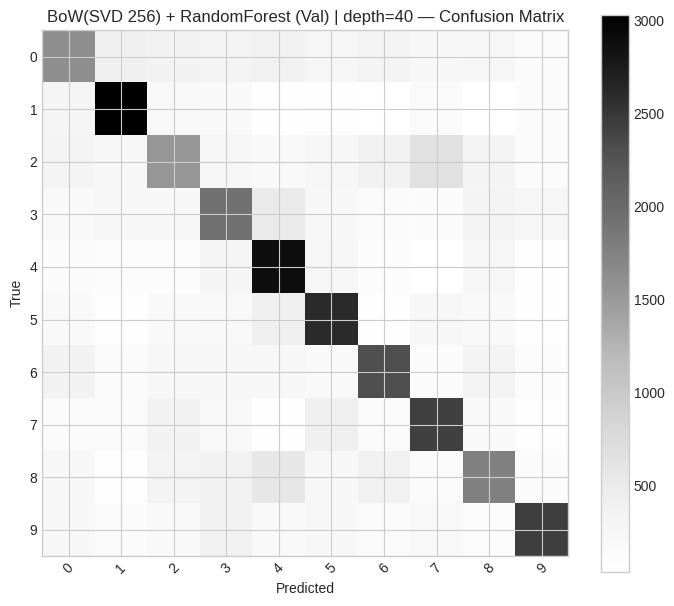


BoW(SVD 512) + RandomForest (Val) | depth=None
                        precision    recall  f1-score   support

    Business & Finance      0.437     0.384     0.409      4213
  Computers & Internet      0.665     0.727     0.695      4194
 Education & Reference      0.422     0.358     0.387      4227
 Entertainment & Music      0.434     0.470     0.452      4170
Family & Relationships      0.523     0.684     0.593      4207
                Health      0.554     0.611     0.581      4179
 Politics & Government      0.560     0.540     0.550      4198
 Science & Mathematics      0.562     0.584     0.573      4181
     Society & Culture      0.480     0.412     0.443      4212
                Sports      0.702     0.579     0.635      4219

              accuracy                          0.535     42000
             macro avg      0.534     0.535     0.532     42000
          weighted avg      0.534     0.535     0.532     42000



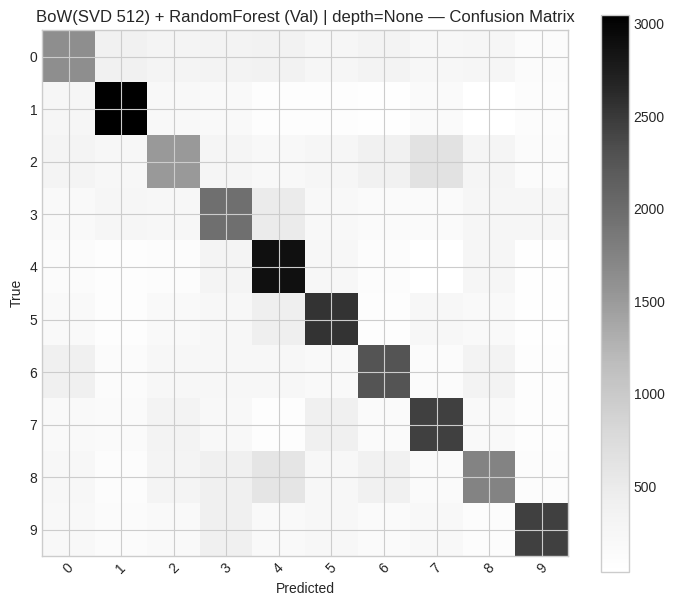


BoW(SVD 512) + RandomForest (Val) | depth=40
                        precision    recall  f1-score   support

    Business & Finance      0.429     0.384     0.405      4213
  Computers & Internet      0.659     0.721     0.689      4194
 Education & Reference      0.418     0.354     0.383      4227
 Entertainment & Music      0.434     0.469     0.451      4170
Family & Relationships      0.520     0.685     0.591      4207
                Health      0.557     0.611     0.583      4179
 Politics & Government      0.560     0.541     0.550      4198
 Science & Mathematics      0.562     0.582     0.572      4181
     Society & Culture      0.481     0.407     0.441      4212
                Sports      0.694     0.571     0.626      4219

              accuracy                          0.532     42000
             macro avg      0.531     0.532     0.529     42000
          weighted avg      0.531     0.532     0.529     42000



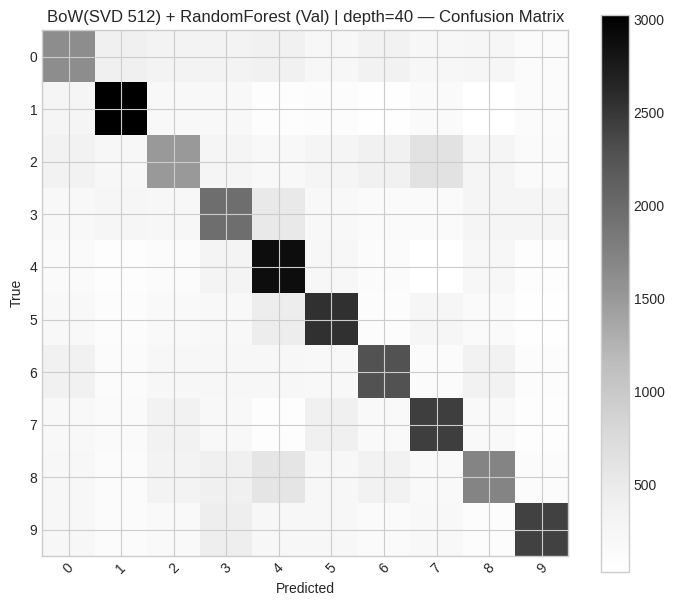

✅ Selected RF config (Val F1-macro=0.5328): {'svd_components': 256, 'n_estimators': 200, 'max_depth': 40}


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# --------------------------
# 1) Project sparse BoW -> small dense space (validation only)
# --------------------------
svd_components_grid = [256, 512]
best_cfg = None
best_val_f1 = -1.0
best_val_pred = None

for n_comp in svd_components_grid:
    # Fit SVD on TRAIN ONLY, then transform train/val
    svd = TruncatedSVD(n_components=n_comp, random_state=42)
    Xtr_proj  = svd.fit_transform(Xtr_bow)      # shape: (n_train, n_comp)
    Xval_proj = svd.transform(Xval_bow)

    # Standardize the projected features (trees don't require it, but it can help; optional)
    scaler = StandardScaler(with_mean=True)
    Xtr_proj  = scaler.fit_transform(Xtr_proj)
    Xval_proj = scaler.transform(Xval_proj)

    # --------------------------
    # 2) Hyperparameter tuning on validation
    # --------------------------
    grid_rf = {
        "n_estimators": [200],       # keep modest for Colab
        "max_depth":   [None, 40],   # small depth grid
        "random_state":[42]
    }

    for depth in grid_rf["max_depth"]:
        rf = RandomForestClassifier(
            n_estimators=grid_rf["n_estimators"][0],
            max_depth=depth,
            random_state=grid_rf["random_state"][0],
            n_jobs=-1
        )
        rf.fit(Xtr_proj, y_tr)
        y_val_pred = rf.predict(Xval_proj)

        show_report_and_cm(
            y_val, y_val_pred, labels_names,
            title=f"BoW(SVD {n_comp}) + RandomForest (Val) | depth={depth}"
        )

        _, f1m, _ = compute_metrics(y_val, y_val_pred)
        if f1m > best_val_f1:
            best_val_f1 = f1m
            best_cfg = {"svd_components": n_comp, "n_estimators": grid_rf["n_estimators"][0], "max_depth": depth}
            best_val_pred = y_val_pred

print(f"✅ Selected RF config (Val F1-macro={best_val_f1:.4f}): {best_cfg}")

# --------------------------
# 3) Retrain on (train+val) with refit BoW vocabulary + refit SVD, then evaluate on TEST once
# --------------------------
from sklearn.feature_extraction.text import CountVectorizer

# Refit BoW on (train+val) text so vocab is learned from all training data
bow_vec_full = CountVectorizer(
    min_df=3, max_df=0.9, max_features=BOW_MAX_FEATURES, ngram_range=BOW_NGRAM_RANGE
)
Xfull_bow = bow_vec_full.fit_transform(pd.concat([tr_df["clean_text"], val_df["clean_text"]], axis=0))
y_full    = np.concatenate([y_tr, y_val], axis=0)
Xtest_bow = bow_vec_full.transform(test_df["clean_text"])

# Refit SVD on full (train+val) BoW, transform full + test
svd_final    = TruncatedSVD(n_components=best_cfg["svd_components"], random_state=42)
Xfull_proj   = svd_final.fit_transform(Xfull_bow)
Xtest_proj   = svd_final.transform(Xtest_bow)

# (Optional) standardize again
scaler_final = StandardScaler(with_mean=True)
Xfull_proj   = scaler_final.fit_transform(Xfull_proj)
Xtest_proj   = scaler_final.transform(Xtest_proj)

# Train RF on full projected features, evaluate once on test
rf_final = RandomForestClassifier(
    n_estimators=best_cfg["n_estimators"],
    max_depth=best_cfg["max_depth"],
    random_state=42,
    n_jobs=-1
)
rf_final.fit(Xfull_proj, y_full)
y_test_pred_rf = rf_final.predict(Xtest_proj)

show_report_and_cm(y_test, y_test_pred_rf, labels_names, title="BoW(SVD) + RandomForest (Test)")

# --------------------------
# 4) Log best result using your logger
# --------------------------
log_bow("RandomForest(SVD)", best_cfg, best_val_pred, y_test_pred_rf)


BoW shapes: (279999, 20000) (59999, 20000)

BoW(SVD-256, float32) + RF(depth=40, n=150) – Test
                        precision    recall  f1-score   support

    Business & Finance      0.429     0.389     0.408      6000
  Computers & Internet      0.640     0.751     0.691      6000
 Education & Reference      0.403     0.350     0.374      6000
 Entertainment & Music      0.445     0.458     0.452      6000
Family & Relationships      0.516     0.669     0.583      5999
                Health      0.557     0.612     0.583      6000
 Politics & Government      0.576     0.545     0.560      6000
 Science & Mathematics      0.588     0.573     0.580      6000
     Society & Culture      0.470     0.414     0.440      6000
                Sports      0.698     0.576     0.631      6000

              accuracy                          0.534     59999
             macro avg      0.532     0.534     0.530     59999
          weighted avg      0.532     0.534     0.530     59999



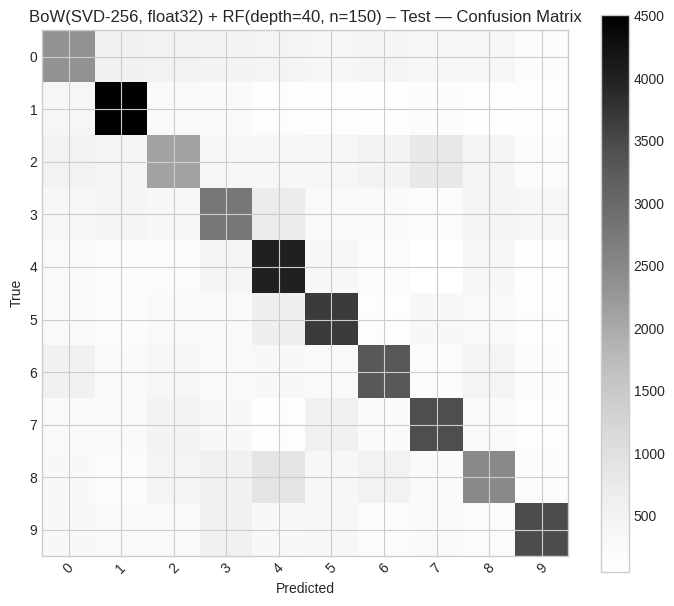

Log note: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got None instead.


In [ ]:
# ===== Safe final retrain+test: BoW(SVD) -> RandomForest =====
import numpy as np, gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

# Use tuned choices if available, else fallbacks
try:
    N_COMP = int(best_cfg.get("svd_components", 256))
    DEPTH  = best_cfg.get("max_depth", 40)
    N_EST  = int(best_cfg.get("n_estimators", 200))
except NameError:
    N_COMP, DEPTH, N_EST = 256, 40, 200  # sensible defaults

# Keep BoW bounded for stability
BOW_MAX_FEATURES = 20000
BOW_NGRAM_RANGE  = (1,1)

# 1) Refit BoW on (train+val)
bow_vec_full = CountVectorizer(min_df=3, max_df=0.9,
                               max_features=BOW_MAX_FEATURES,
                               ngram_range=BOW_NGRAM_RANGE)
Xfull_bow = bow_vec_full.fit_transform(
    pd.concat([tr_df["clean_text"], val_df["clean_text"]], axis=0)
)
y_full    = np.concatenate([y_tr, y_val], axis=0)
Xtest_bow = bow_vec_full.transform(test_df["clean_text"])
print("BoW shapes:", Xfull_bow.shape, Xtest_bow.shape)

# 2) SVD -> dense (float32), no scaler (trees don't need it)
svd_final  = TruncatedSVD(n_components=N_COMP, random_state=42)
Xfull_proj = svd_final.fit_transform(Xfull_bow).astype(np.float32)
Xtest_proj = svd_final.transform(Xtest_bow).astype(np.float32)

# Free sparse BoW to lower peak RAM
del Xfull_bow, Xtest_bow
gc.collect()

# 3) Train RF (modest size)
rf_final = RandomForestClassifier(
    n_estimators=min(N_EST, 150),  # trim a bit for safety
    max_depth=DEPTH,
    random_state=42,
    n_jobs=-1
)
rf_final.fit(Xfull_proj, y_full)
y_test_pred_rf = rf_final.predict(Xtest_proj)

# 4) Evaluate & (optionally) log
show_report_and_cm(y_test, y_test_pred_rf, labels_names,
                   title=f'BoW(SVD-{N_COMP}, float32) + RF(depth={DEPTH}, n={min(N_EST,150)}) – Test')
try:
    log_bow("RandomForest(SVD)", {"svd_components": N_COMP, "n_estimators": min(N_EST,150), "max_depth": DEPTH},
            None, y_test_pred_rf)
except Exception as e:
    print("Log note:", e)


In [ ]:
# Patch: make log_bow robust to None
def log_bow(model_name, params, y_val_pred, y_test_pred):
    # val metrics (allow None)
    if y_val_pred is not None:
        v_acc, v_f1m, v_f1w = compute_metrics(y_val, y_val_pred)
    else:
        v_acc = v_f1m = v_f1w = float("nan")  # or 0.0

    # test metrics (must exist)
    t_acc, t_f1m, t_f1w = compute_metrics(y_test, y_test_pred)

    row = {
        "repr":"BoW", "model":model_name, "params":json.dumps(params),
        "val_acc":v_acc, "val_f1_macro":v_f1m, "val_f1_weighted":v_f1w,
        "test_acc":t_acc, "test_f1_macro":t_f1m, "test_f1_weighted":t_f1w,
    }
    bow_results.append(row)
    print(f"  {model_name} | best params: {params}")
    print(f"   Val F1(macro): {v_f1m} | Test F1(macro): {t_f1m:.4f}")

log_bow("RandomForest(SVD)", {"svd_components": N_COMP, "n_estimators": min(N_EST,150), "max_depth": DEPTH},
        None, y_test_pred_rf)


  RandomForest(SVD) | best params: {'svd_components': 256, 'n_estimators': 150, 'max_depth': 40}
   Val F1(macro): nan | Test F1(macro): 0.5303


In [ ]:
# Quick recompute of validation preds for RF (so bow_results has val scores too)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
import numpy as np

BOW_MAX_FEATURES = 20000
BOW_NGRAM_RANGE  = (1,1)
N_COMP, DEPTH, N_EST = 256, 40, 150

bow_val = CountVectorizer(min_df=3, max_df=0.9, max_features=BOW_MAX_FEATURES, ngram_range=BOW_NGRAM_RANGE)
Xtr_bow  = bow_val.fit_transform(tr_df["clean_text"])
Xval_bow = bow_val.transform(val_df["clean_text"])

svd_val  = TruncatedSVD(n_components=N_COMP, random_state=42)
Xtr_proj = svd_val.fit_transform(Xtr_bow).astype(np.float32)
Xval_proj= svd_val.transform(Xval_bow).astype(np.float32)

rf_val = RandomForestClassifier(n_estimators=N_EST, max_depth=DEPTH, random_state=42, n_jobs=-1)
rf_val.fit(Xtr_proj, y_tr)
y_val_pred_rf = rf_val.predict(Xval_proj)

# Re-log (overwrites nothing; it just appends another row — that’s fine)
log_bow("RandomForest(SVD)", {"svd_components": N_COMP, "n_estimators": N_EST, "max_depth": DEPTH},
        y_val_pred_rf, y_test_pred_rf)


  RandomForest(SVD) | best params: {'svd_components': 256, 'n_estimators': 150, 'max_depth': 40}
   Val F1(macro): 0.5272386637228521 | Test F1(macro): 0.5303


# DNN (Dense) on BoW

Epoch 1/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.4635 - loss: 1.6643 - val_accuracy: 0.6129 - val_loss: 1.2069 - learning_rate: 0.0010
Epoch 2/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5976 - loss: 1.2701 - val_accuracy: 0.6221 - val_loss: 1.1656 - learning_rate: 0.0010
Epoch 3/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.6111 - loss: 1.2154 - val_accuracy: 0.6258 - val_loss: 1.1486 - learning_rate: 0.0010
Epoch 4/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6175 - loss: 1.1919 - val_accuracy: 0.6278 - val_loss: 1.1386 - learning_rate: 0.0010
Epoch 5/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6219 - loss: 1.1748 - val_accuracy: 0.6297 - val_loss: 1.1323 - learning_rate: 0.0010
Epoch 6/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6243 - loss: 1.1603 - val_accuracy: 0.6313 - val_loss: 1.1266 - learning_rate: 0.0010
Epoch 7/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6274 - 

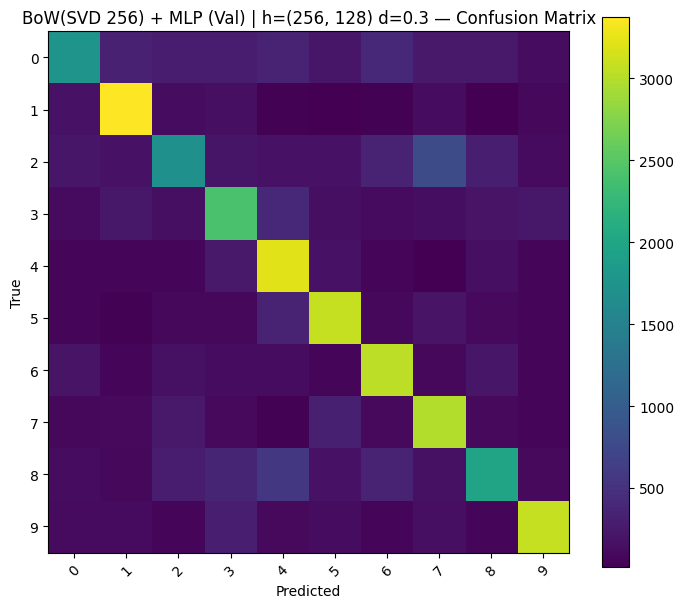

Epoch 1/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.4773 - loss: 1.6344 - val_accuracy: 0.6111 - val_loss: 1.2058 - learning_rate: 0.0010
Epoch 2/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - accuracy: 0.5976 - loss: 1.2649 - val_accuracy: 0.6217 - val_loss: 1.1697 - learning_rate: 0.0010
Epoch 3/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.6083 - loss: 1.2214 - val_accuracy: 0.6235 - val_loss: 1.1586 - learning_rate: 0.0010
Epoch 4/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.6149 - loss: 1.1985 - val_accuracy: 0.6281 - val_loss: 1.1433 - learning_rate: 0.0010
Epoch 5/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6207 - loss: 1.1784 - val_accuracy: 0.6294 - val_loss: 1.1368 - learning_rate: 0.0010
Epoch 6/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.6216 - loss: 1.1709 - val_accuracy: 0.6332 - val_loss: 1.1335 - learning_rate: 0.0010
Epoch 7/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6

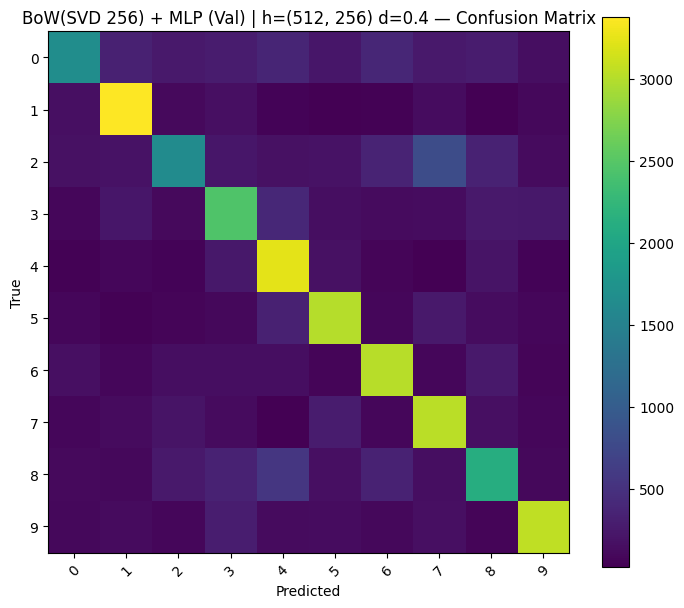

Epoch 1/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.4516 - loss: 1.7052 - val_accuracy: 0.6333 - val_loss: 1.1601 - learning_rate: 0.0010
Epoch 2/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.6161 - loss: 1.2220 - val_accuracy: 0.6400 - val_loss: 1.1176 - learning_rate: 0.0010
Epoch 3/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.6298 - loss: 1.1645 - val_accuracy: 0.6454 - val_loss: 1.0985 - learning_rate: 0.0010
Epoch 4/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6377 - loss: 1.1307 - val_accuracy: 0.6459 - val_loss: 1.0907 - learning_rate: 0.0010
Epoch 5/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6417 - loss: 1.1102 - val_accuracy: 0.6494 - val_loss: 1.0869 - learning_rate: 0.0010
Epoch 6/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.6448 - loss: 1.0948 - val_accuracy: 0.6509 - val_loss: 1.0823 - learning_rate: 0.0010
Epoch 7/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.64

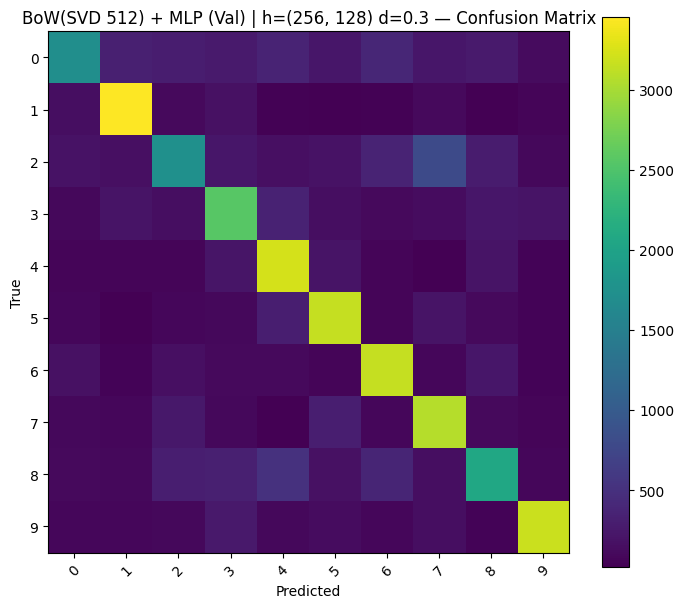

Epoch 1/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.4658 - loss: 1.6710 - val_accuracy: 0.6331 - val_loss: 1.1607 - learning_rate: 0.0010
Epoch 2/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.6129 - loss: 1.2264 - val_accuracy: 0.6393 - val_loss: 1.1223 - learning_rate: 0.0010
Epoch 3/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.6275 - loss: 1.1714 - val_accuracy: 0.6450 - val_loss: 1.1038 - learning_rate: 0.0010
Epoch 4/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.6326 - loss: 1.1438 - val_accuracy: 0.6460 - val_loss: 1.0978 - learning_rate: 0.0010
Epoch 5/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.6381 - loss: 1.1185 - val_accuracy: 0.6469 - val_loss: 1.0933 - learning_rate: 0.0010
Epoch 6/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.6425 - loss: 1.1040 - val_accuracy: 0.6475 - val_loss: 1.0895 - learning_rate: 0.0010
Epoch 7/8
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.6

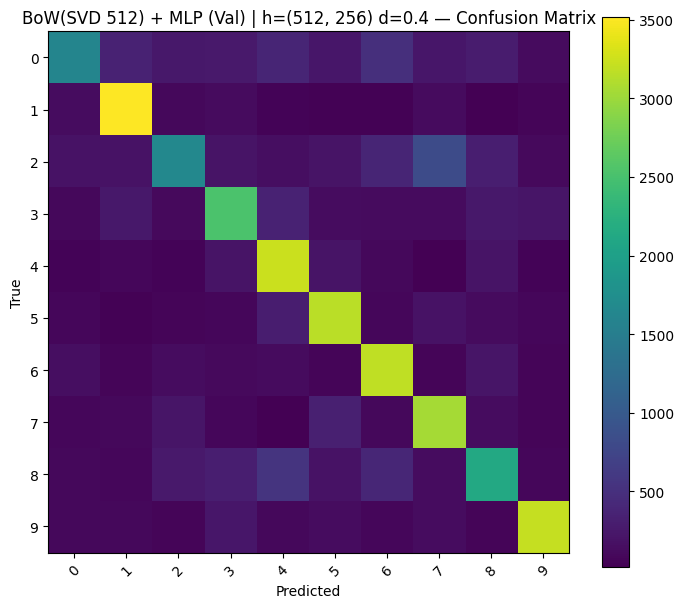

Selected MLP config (Val F1-macro=0.6438): {'svd_components': 512, 'hidden': (256, 128), 'dropout': 0.3, 'batch_size': 128, 'epochs': 8}
Epoch 1/7
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4672 - loss: 1.6666
Epoch 2/7
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6205 - loss: 1.2082
Epoch 3/7
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.6327 - loss: 1.1555
Epoch 4/7
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.6397 - loss: 1.1278
Epoch 5/7
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.6442 - loss: 1.1074
Epoch 6/7
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.6464 - loss: 1.0944
Epoch 7/7
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.6500 - loss: 1.0844

BoW(SVD) + MLP (Test)
                        precision    recall  f1-score   support

    Business & Finance      0.629     0.415     0.500      6000
  Computers & Internet      0.737     0.848     0.788      6000
 Education & Reference     

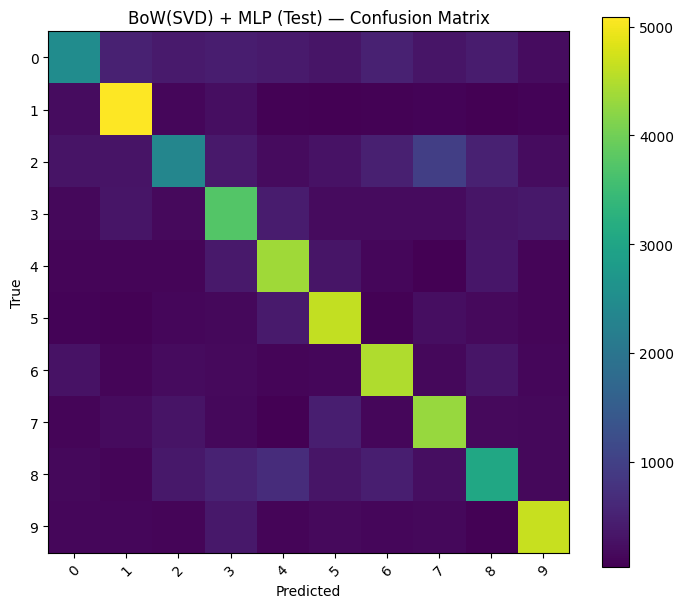

  MLP(SVD) | best params: {'svd_components': 512, 'hidden': (256, 128), 'dropout': 0.3, 'batch_size': 128, 'epochs': 8}
   Val F1(macro): 0.6438 | Test F1(macro): 0.6449


In [ ]:
# ===== BoW(SVD) + MLP (DNN): tune on val -> final test =====
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np, tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Make sure num_classes is defined
num_classes = len(labels_names)

# 1) Build BoW (unigrams; bounded)
BOW_MAX_FEATURES = 20000
BOW_NGRAM_RANGE  = (1,1)
bow_vec = CountVectorizer(min_df=3, max_df=0.9,
                          max_features=BOW_MAX_FEATURES,
                          ngram_range=BOW_NGRAM_RANGE)
Xtr_bow  = bow_vec.fit_transform(tr_df["clean_text"])
Xval_bow = bow_vec.transform(val_df["clean_text"])
Xtest_bow= bow_vec.transform(test_df["clean_text"])

def build_mlp(input_dim, hidden=(256,128), dropout=0.30, num_classes=None):
    m = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(hidden[0], activation="relu"),
        layers.Dropout(dropout),
        layers.Dense(hidden[1], activation="relu"),
        layers.Dropout(dropout),
        layers.Dense(num_classes, activation="softmax"),
    ])
    m.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
    return m

# 2) Small grid over SVD size + MLP shape
svd_components_grid = [256, 512]
mlp_grids = [
    {"hidden": (256,128), "dropout": 0.30, "batch_size": 128, "epochs": 8},
    {"hidden": (512,256), "dropout": 0.40, "batch_size": 128, "epochs": 8},
]

best_cfg, best_val_f1, best_val_pred = None, -1.0, None

for n_comp in svd_components_grid:
    # Train-only SVD, then transform val
    svd = TruncatedSVD(n_components=n_comp, random_state=42)
    Xtr_proj  = svd.fit_transform(Xtr_bow).astype("float32")   # cast to float32
    Xval_proj = svd.transform(Xval_bow).astype("float32")

    # Standardize dense features for MLP
    scaler = StandardScaler(with_mean=True)
    Xtr_proj  = scaler.fit_transform(Xtr_proj).astype("float32")
    Xval_proj = scaler.transform(Xval_proj).astype("float32")

    for cfg in mlp_grids:
        mlp = build_mlp(n_comp, hidden=cfg["hidden"], dropout=cfg["dropout"], num_classes=num_classes)
        es  = callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)
        rl  = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1, verbose=0)

        mlp.fit(Xtr_proj, y_tr,
                validation_data=(Xval_proj, y_val),
                epochs=cfg["epochs"], batch_size=cfg["batch_size"], verbose=1,
                callbacks=[es, rl])

        y_val_pred = mlp.predict(Xval_proj, batch_size=256, verbose=0).argmax(axis=1)
        show_report_and_cm(y_val, y_val_pred, labels_names,
                           title=f"BoW(SVD {n_comp}) + MLP (Val) | h={cfg['hidden']} d={cfg['dropout']}")
        _, f1m, _ = compute_metrics(y_val, y_val_pred)
        if f1m > best_val_f1:
            best_val_f1 = f1m
            best_cfg = {"svd_components": n_comp, **cfg}
            best_val_pred = y_val_pred

print(f"Selected MLP config (Val F1-macro={best_val_f1:.4f}): {best_cfg}")

# 3) Final train on (train+val) and test once
bow_vec_full = CountVectorizer(min_df=3, max_df=0.9,
                               max_features=BOW_MAX_FEATURES,
                               ngram_range=BOW_NGRAM_RANGE)
Xfull_bow = bow_vec_full.fit_transform(pd.concat([tr_df["clean_text"], val_df["clean_text"]], axis=0))
y_full    = np.concatenate([y_tr, y_val], axis=0)
Xtest_bow = bow_vec_full.transform(test_df["clean_text"])

svd_final    = TruncatedSVD(n_components=best_cfg["svd_components"], random_state=42)
scaler_final = StandardScaler(with_mean=True)

Xfull_proj = svd_final.fit_transform(Xfull_bow).astype("float32")
Xfull_proj = scaler_final.fit_transform(Xfull_proj).astype("float32")
Xtest_proj = svd_final.transform(Xtest_bow).astype("float32")
Xtest_proj = scaler_final.transform(Xtest_proj).astype("float32")

mlp_final = build_mlp(best_cfg["svd_components"],
                      hidden=best_cfg["hidden"],
                      dropout=best_cfg["dropout"],
                      num_classes=num_classes)

final_epochs = max(6, best_cfg["epochs"] - 1)  # a bit fewer since we tuned already
mlp_final.fit(Xfull_proj, y_full, epochs=final_epochs,
              batch_size=best_cfg["batch_size"], verbose=1)

y_test_pred_mlp = mlp_final.predict(Xtest_proj, batch_size=256, verbose=0).argmax(axis=1)
show_report_and_cm(y_test, y_test_pred_mlp, labels_names, title="BoW(SVD) + MLP (Test)")

# 4) Log
log_bow("MLP(SVD)", best_cfg, best_val_pred, y_test_pred_mlp)


GPUs: []
Epoch 1/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5261 - loss: 1.5388 - val_accuracy: 0.6133 - val_loss: 1.2428 - learning_rate: 0.0010
Epoch 2/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6110 - loss: 1.2301 - val_accuracy: 0.6201 - val_loss: 1.1913 - learning_rate: 0.0010
Epoch 3/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6217 - loss: 1.1773 - val_accuracy: 0.6242 - val_loss: 1.1752 - learning_rate: 0.0010
Epoch 4/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6290 - loss: 1.1477 - val_accuracy: 0.6259 - val_loss: 1.1686 - learning_rate: 0.0010
Epoch 5/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6347 - loss: 1.1274 - val_accuracy: 0.6285 - val_loss: 1.1651 - learning_rate: 0.0010
Epoch 6/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6395 - loss: 1.1120 - val_accuracy: 0.6296 - val_loss: 1.1604 - learning_rate: 0.0010
Epoch 7/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accu

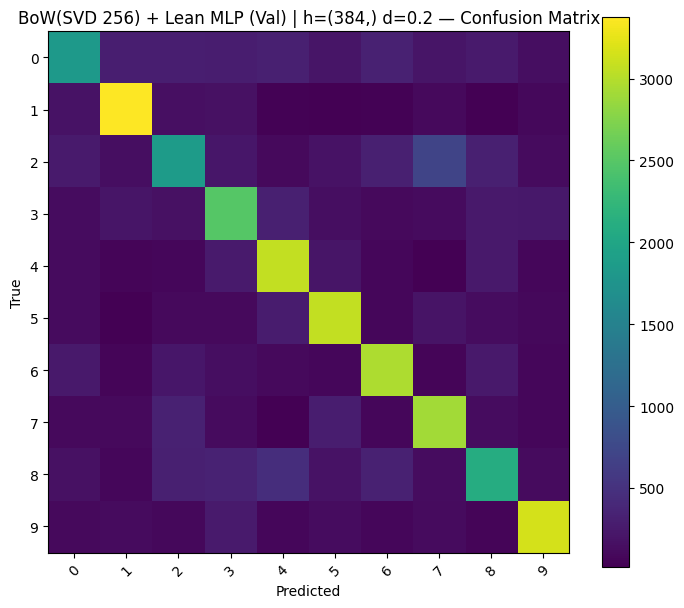

Epoch 1/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.5183 - loss: 1.5236 - val_accuracy: 0.6144 - val_loss: 1.1908 - learning_rate: 0.0010
Epoch 2/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.6102 - loss: 1.2140 - val_accuracy: 0.6225 - val_loss: 1.1584 - learning_rate: 0.0010
Epoch 3/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.6214 - loss: 1.1677 - val_accuracy: 0.6256 - val_loss: 1.1458 - learning_rate: 0.0010
Epoch 4/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.6286 - loss: 1.1426 - val_accuracy: 0.6302 - val_loss: 1.1374 - learning_rate: 0.0010
Epoch 5/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.6351 - loss: 1.1240 - val_accuracy: 0.6322 - val_loss: 1.1339 - learning_rate: 0.0010
Epoch 6/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.6373 - loss: 1.1088 - val_accuracy: 0.6324 - val_loss: 1.1353 - learning_rate: 0.0010
Epoch 7/15
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accura

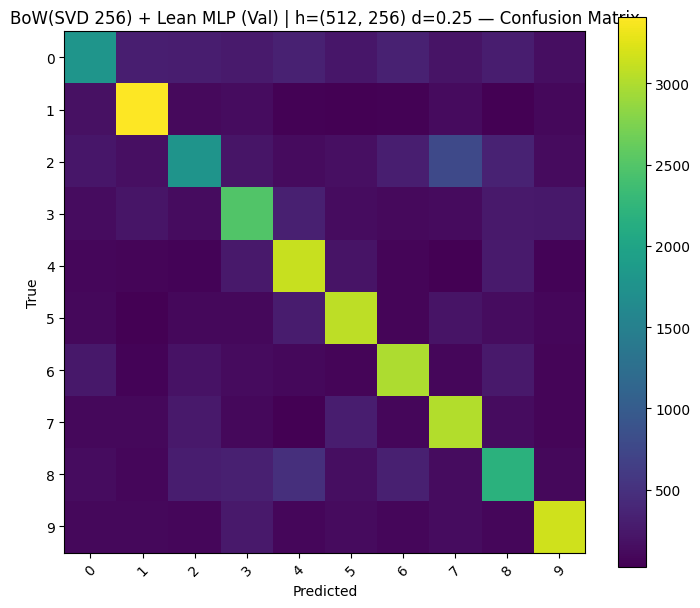

Selected Lean-MLP (Val F1-macro=0.6376): {'svd_components': 256, 'hidden': (512, 256), 'dropout': 0.25, 'batch_size': 128, 'epochs': 15}
Epoch 1/13
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.5221 - loss: 1.5138
Epoch 2/13
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - accuracy: 0.6107 - loss: 1.2128
Epoch 3/13
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.6235 - loss: 1.1684
Epoch 4/13
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.6289 - loss: 1.1467
Epoch 5/13
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.6348 - loss: 1.1258
Epoch 6/13
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.6374 - loss: 1.1119
Epoch 7/13
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.6410 - loss: 1.0996
Epoch 8/13
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.6445 - loss: 1.0878
Epoch 9/13
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.6466 - loss: 1.0784
Epoch 10/13
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/s

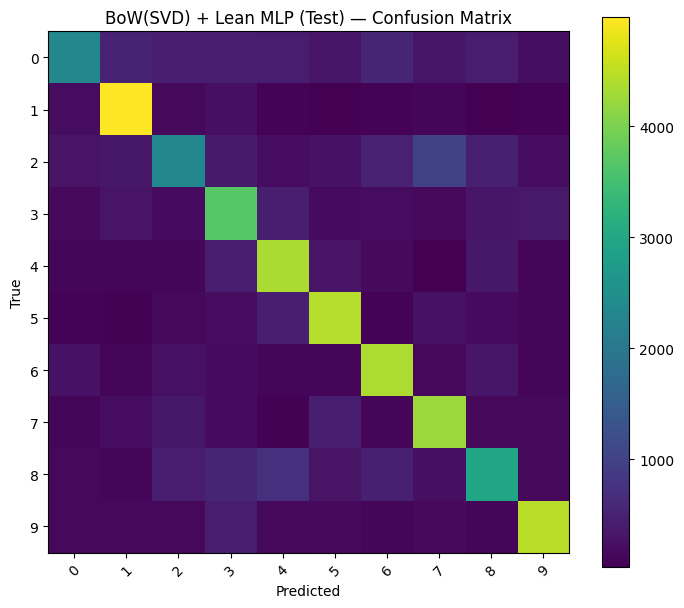

  MLP(SVD-lean) | best params: {'svd_components': 256, 'hidden': (512, 256), 'dropout': 0.25, 'batch_size': 128, 'epochs': 15}
   Val F1(macro): 0.6376 | Test F1(macro): 0.6289


In [ ]:
# ==== Lean BoW(SVD) -> MLP ====
import numpy as np, tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

num_classes = len(labels_names)

# ---- Reproducibility + GPU
tf.random.set_seed(42)
np.random.seed(42)
print("GPUs:", tf.config.list_physical_devices("GPU"))

# ---- Small, stable BoW
BOW_MAX_FEATURES = 20000
BOW_NGRAM_RANGE  = (1,1)
bow_vec = CountVectorizer(min_df=3, max_df=0.9,
                          max_features=BOW_MAX_FEATURES,
                          ngram_range=BOW_NGRAM_RANGE)
Xtr_bow  = bow_vec.fit_transform(tr_df["clean_text"])
Xval_bow = bow_vec.transform(val_df["clean_text"])
Xtest_bow= bow_vec.transform(test_df["clean_text"])

# ---- Single SVD size for speed
SVD_DIM = 256

# ---- Two compact MLP variants (fast)
MLP_CANDIDATES = [
    {"hidden": (384,),    "dropout": 0.20, "batch_size": 128, "epochs": 15},
    {"hidden": (512,256), "dropout": 0.25, "batch_size": 128, "epochs": 15},
]

def build_mlp(input_dim, hidden=(384,), dropout=0.2, n_classes=10):
    m = models.Sequential([layers.Input(shape=(input_dim,))])
    for h in hidden:
        m.add(layers.Dense(h, activation="relu"))
        m.add(layers.Dropout(dropout))
    m.add(layers.Dense(n_classes, activation="softmax"))
    m.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
    return m

# ---- Train-only SVD, then transform val (float32 to save RAM)
svd = TruncatedSVD(n_components=SVD_DIM, random_state=42)
Xtr_proj  = svd.fit_transform(Xtr_bow).astype("float32")
Xval_proj = svd.transform(Xval_bow).astype("float32")

# ---- Standardize for MLP (helps a lot)
scaler = StandardScaler(with_mean=True)
Xtr_proj  = scaler.fit_transform(Xtr_proj).astype("float32")
Xval_proj = scaler.transform(Xval_proj).astype("float32")

# ---- (Optional) class weights if you want to help weaker classes
USE_CLASS_WEIGHTS = False
if USE_CLASS_WEIGHTS:
    from sklearn.utils.class_weight import compute_class_weight
    class_w = compute_class_weight("balanced", classes=np.arange(num_classes), y=y_tr)
    class_w = {i: w for i, w in enumerate(class_w)}
else:
    class_w = None

# ---- Quick tuning on val
best_cfg, best_val_f1, best_val_pred = None, -1.0, None
for cfg in MLP_CANDIDATES:
    mlp = build_mlp(SVD_DIM, hidden=cfg["hidden"], dropout=cfg["dropout"], n_classes=num_classes)
    es  = callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)
    rl  = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1, verbose=0)
    mlp.fit(Xtr_proj, y_tr,
            validation_data=(Xval_proj, y_val),
            epochs=cfg["epochs"], batch_size=cfg["batch_size"], verbose=1,
            callbacks=[es, rl], class_weight=class_w)

    y_val_pred = mlp.predict(Xval_proj, batch_size=256, verbose=0).argmax(axis=1)
    show_report_and_cm(y_val, y_val_pred, labels_names,
                       title=f"BoW(SVD {SVD_DIM}) + Lean MLP (Val) | h={cfg['hidden']} d={cfg['dropout']}")
    _, f1m, _ = compute_metrics(y_val, y_val_pred)
    if f1m > best_val_f1:
        best_val_f1, best_cfg, best_val_pred = f1m, {"svd_components": SVD_DIM, **cfg}, y_val_pred

print(f"Selected Lean-MLP (Val F1-macro={best_val_f1:.4f}): {best_cfg}")

# ---- Final (train+val) -> test
bow_vec_full = CountVectorizer(min_df=3, max_df=0.9,
                               max_features=BOW_MAX_FEATURES,
                               ngram_range=BOW_NGRAM_RANGE)
Xfull_bow = bow_vec_full.fit_transform(pd.concat([tr_df["clean_text"], val_df["clean_text"]], axis=0))
y_full    = np.concatenate([y_tr, y_val], axis=0)
Xtest_bow = bow_vec_full.transform(test_df["clean_text"])

svd_final    = TruncatedSVD(n_components=best_cfg["svd_components"], random_state=42)
Xfull_proj   = svd_final.fit_transform(Xfull_bow).astype("float32")
Xtest_proj   = svd_final.transform(Xtest_bow).astype("float32")

scaler_final = StandardScaler(with_mean=True)
Xfull_proj   = scaler_final.fit_transform(Xfull_proj).astype("float32")
Xtest_proj   = scaler_final.transform(Xtest_proj).astype("float32")

mlp_final = build_mlp(best_cfg["svd_components"],
                      hidden=best_cfg["hidden"],
                      dropout=best_cfg["dropout"],
                      n_classes=num_classes)

final_epochs = max(6, best_cfg["epochs"] - 2)  # train a bit less on full data
mlp_final.fit(Xfull_proj, y_full, epochs=final_epochs,
              batch_size=best_cfg["batch_size"], verbose=1, class_weight=class_w)

y_test_pred_mlp = mlp_final.predict(Xtest_proj, batch_size=256, verbose=0).argmax(axis=1)
show_report_and_cm(y_test, y_test_pred_mlp, labels_names, title="BoW(SVD) + Lean MLP (Test)")

# ---- Log
log_bow("MLP(SVD-lean)", best_cfg, best_val_pred, y_test_pred_mlp)


## **TF-IDF**

In [ ]:
try:
    compute_metrics, show_report_and_cm
except NameError:
    import numpy as np, matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

    def compute_metrics(y_true, y_pred):
        acc = accuracy_score(y_true, y_pred)
        f1m = f1_score(y_true, y_pred, average="macro")
        f1w = f1_score(y_true, y_pred, average="weighted")
        return acc, f1m, f1w

    def show_report_and_cm(y_true, y_pred, labels, title=""):
        print("\n" + "="*80); print(title)
        print(classification_report(y_true, y_pred, target_names=labels, digits=3, zero_division=0))
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(7,6))
        plt.imshow(cm, interpolation="nearest")
        plt.title(title + " — Confusion Matrix")
        plt.colorbar()
        ticks = np.arange(len(labels))
        plt.xticks(ticks, ticks, rotation=45); plt.yticks(ticks, ticks)
        plt.xlabel("Predicted"); plt.ylabel("True")
        plt.tight_layout(); plt.show()

# Fresh container for TF-IDF experiments
tfidf_results = []

def log_tfidf(model_name, params, y_val_pred, y_test_pred):
    """Log results; y_val_pred may be None if you only retrained/tested."""
    import json, numpy as np
    v_acc = v_f1m = v_f1w = float("nan")
    if y_val_pred is not None:
        v_acc, v_f1m, v_f1w = compute_metrics(y_val, y_val_pred)
    t_acc, t_f1m, t_f1w = compute_metrics(y_test, y_test_pred)
    tfidf_results.append({
        "repr":"TF-IDF", "model":model_name, "params":json.dumps(params),
        "val_acc":v_acc, "val_f1_macro":v_f1m, "val_f1_weighted":v_f1w,
        "test_acc":t_acc, "test_f1_macro":t_f1m, "test_f1_weighted":t_f1w,
    })
    print(f"{model_name} | best params: {params}")
    print(f" Val F1(macro): {v_f1m} | Test F1(macro): {t_f1m:.4f}")


# **TF-IDF Features**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_MAX_FEATURES = 30000
TFIDF_NGRAM_RANGE  = (1,1)   # start with unigrams; try (1,2) later on LR only

tfidf_vec = TfidfVectorizer(
    min_df=3, max_df=0.9,
    max_features=TFIDF_MAX_FEATURES,
    ngram_range=TFIDF_NGRAM_RANGE,
    sublinear_tf=True, norm="l2"
)

Xtr_tf   = tfidf_vec.fit_transform(tr_df["clean_text"])
Xval_tf  = tfidf_vec.transform(val_df["clean_text"])
Xtest_tf = tfidf_vec.transform(test_df["clean_text"])

print(f"[TF-IDF] vocab={len(tfidf_vec.vocabulary_):,} | shapes:", Xtr_tf.shape, Xval_tf.shape, Xtest_tf.shape)


[TF-IDF] vocab=30,000 | shapes: (237999, 30000) (42000, 30000) (59999, 30000)


## **TF-IDF + Naive Bayes**


TF-IDF + NB (Val) | alpha=0.5
                        precision    recall  f1-score   support

    Business & Finance      0.567     0.510     0.537      4213
  Computers & Internet      0.813     0.871     0.841      4194
 Education & Reference      0.579     0.445     0.503      4227
 Entertainment & Music      0.657     0.678     0.667      4170
Family & Relationships      0.604     0.818     0.695      4207
                Health      0.741     0.781     0.760      4179
 Politics & Government      0.745     0.731     0.738      4198
 Science & Mathematics      0.716     0.726     0.721      4181
     Society & Culture      0.609     0.538     0.571      4212
                Sports      0.879     0.826     0.852      4219

              accuracy                          0.692     42000
             macro avg      0.691     0.692     0.688     42000
          weighted avg      0.691     0.692     0.688     42000



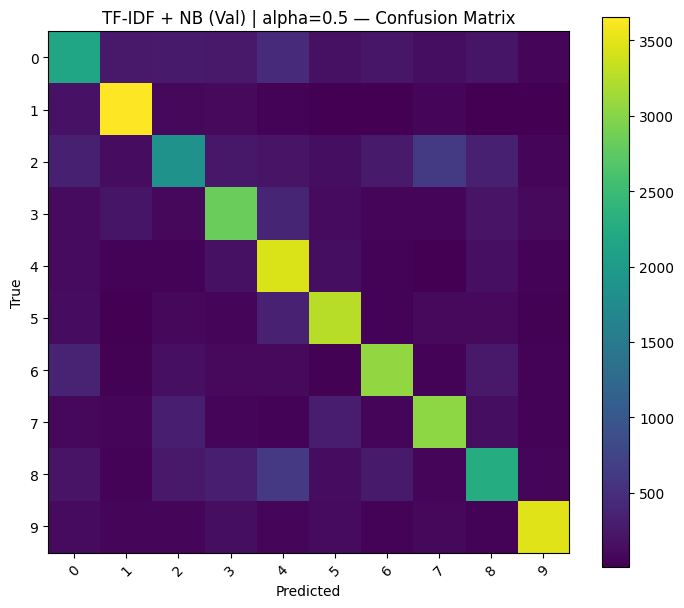

   [VAL METRICS] Acc=0.6921 | F1-macro=0.6884 | F1-weighted=0.6882

TF-IDF + NB (Val) | alpha=1.0
                        precision    recall  f1-score   support

    Business & Finance      0.570     0.511     0.539      4213
  Computers & Internet      0.803     0.875     0.837      4194
 Education & Reference      0.586     0.436     0.500      4227
 Entertainment & Music      0.672     0.666     0.669      4170
Family & Relationships      0.589     0.828     0.688      4207
                Health      0.736     0.784     0.759      4179
 Politics & Government      0.742     0.735     0.738      4198
 Science & Mathematics      0.718     0.724     0.721      4181
     Society & Culture      0.608     0.535     0.569      4212
                Sports      0.881     0.822     0.850      4219

              accuracy                          0.691     42000
             macro avg      0.690     0.691     0.687     42000
          weighted avg      0.690     0.691     0.687     42000



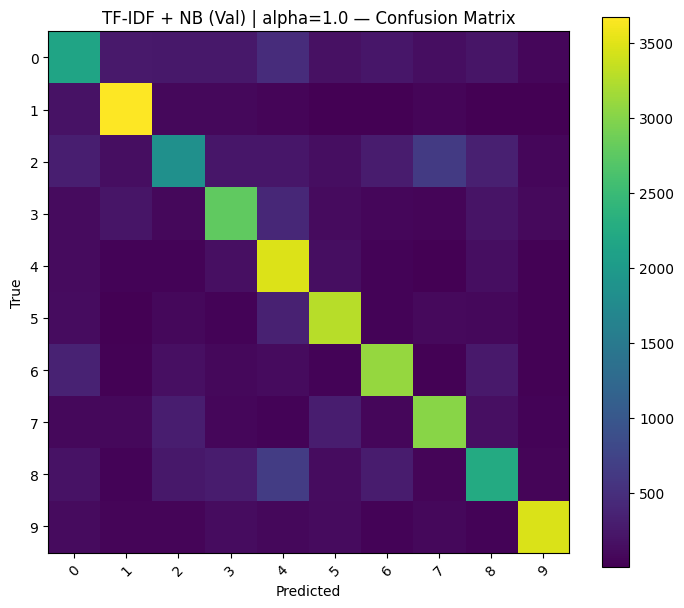

   [VAL METRICS] Acc=0.6911 | F1-macro=0.6871 | F1-weighted=0.6869

TF-IDF + NB (Val) | alpha=1.5
                        precision    recall  f1-score   support

    Business & Finance      0.571     0.510     0.539      4213
  Computers & Internet      0.796     0.876     0.834      4194
 Education & Reference      0.593     0.433     0.500      4227
 Entertainment & Music      0.681     0.656     0.668      4170
Family & Relationships      0.580     0.833     0.684      4207
                Health      0.731     0.785     0.757      4179
 Politics & Government      0.739     0.741     0.740      4198
 Science & Mathematics      0.718     0.718     0.718      4181
     Society & Culture      0.608     0.534     0.569      4212
                Sports      0.881     0.816     0.847      4219

              accuracy                          0.690     42000
             macro avg      0.690     0.690     0.686     42000
          weighted avg      0.690     0.690     0.685     42000



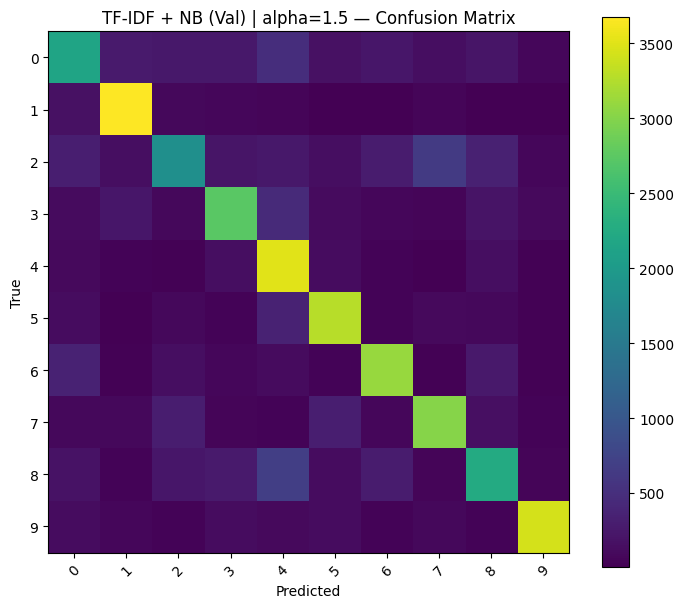

   [VAL METRICS] Acc=0.6898 | F1-macro=0.6856 | F1-weighted=0.6854
Selected NB alpha (Val best by F1-macro=0.6884): 0.5

TF-IDF + NB (Test)
                        precision    recall  f1-score   support

    Business & Finance      0.569     0.513     0.540      6000
  Computers & Internet      0.804     0.870     0.836      6000
 Education & Reference      0.591     0.448     0.510      6000
 Entertainment & Music      0.665     0.683     0.674      6000
Family & Relationships      0.604     0.801     0.688      5999
                Health      0.735     0.793     0.762      6000
 Politics & Government      0.751     0.749     0.750      6000
 Science & Mathematics      0.726     0.731     0.728      6000
     Society & Culture      0.605     0.530     0.565      6000
                Sports      0.880     0.831     0.854      6000

              accuracy                          0.695     59999
             macro avg      0.693     0.695     0.691     59999
          weighted avg    

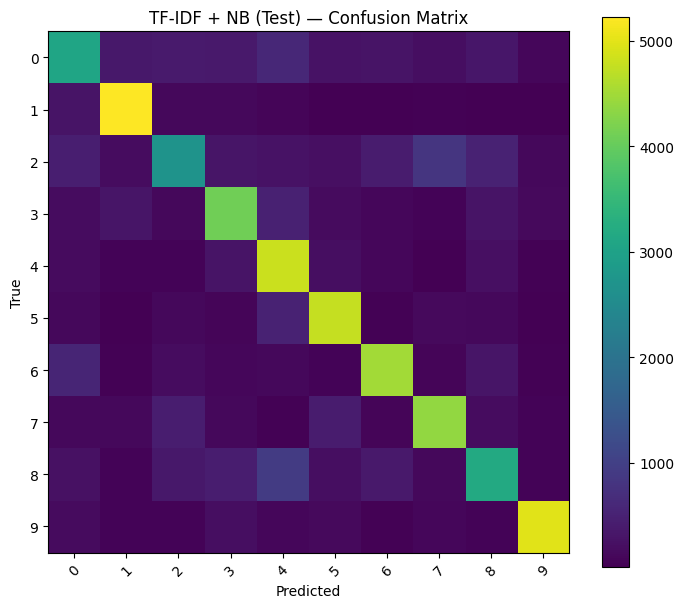

MultinomialNB | best params: {'alpha': 0.5}
 Val F1(macro): 0.6884264116567301 | Test F1(macro): 0.6908


In [ ]:
from sklearn.naive_bayes import MultinomialNB

best_alpha, best_val_pred, best_val_f1 = None, None, -1.0

for a in [0.5, 1.0, 1.5]:
    nb = MultinomialNB(alpha=a).fit(Xtr_tf, y_tr)
    yv = nb.predict(Xval_tf)

    # Full report (as before)
    show_report_and_cm(y_val, yv, labels_names, f"TF-IDF + NB (Val) | alpha={a}")

    # NEW: log all validation metrics
    acc, f1m, f1w = compute_metrics(y_val, yv)
    print(f"   [VAL METRICS] Acc={acc:.4f} | F1-macro={f1m:.4f} | F1-weighted={f1w:.4f}")

    # Select by F1-macro (fair for class imbalance)
    if f1m > best_val_f1:
        best_val_f1, best_alpha, best_val_pred = f1m, a, yv

print(f"Selected NB alpha (Val best by F1-macro={best_val_f1:.4f}): {best_alpha}")

# ---- Final refit on (train+val) and single test evaluation ----
tfidf_vec_full = TfidfVectorizer(
    min_df=3, max_df=0.9,
    max_features=TFIDF_MAX_FEATURES,
    ngram_range=TFIDF_NGRAM_RANGE,
    sublinear_tf=True, norm="l2"
)
Xfull_tf = tfidf_vec_full.fit_transform(pd.concat([tr_df['clean_text'], val_df['clean_text']], axis=0))
y_full   = np.concatenate([y_tr, y_val], axis=0)
Xtest_tf = tfidf_vec_full.transform(test_df['clean_text'])

nb_final = MultinomialNB(alpha=best_alpha).fit(Xfull_tf, y_full)
yt = nb_final.predict(Xtest_tf)

show_report_and_cm(y_test, yt, labels_names, "TF-IDF + NB (Test)")
log_tfidf("MultinomialNB", {"alpha": best_alpha}, best_val_pred, yt)


# **TF-IDF + Logistic Regression**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



TF-IDF + LR (Val) | C=0.5, class_weight=balanced
                        precision    recall  f1-score   support

    Business & Finance      0.580     0.506     0.541      4213
  Computers & Internet      0.826     0.851     0.838      4194
 Education & Reference      0.550     0.506     0.527      4227
 Entertainment & Music      0.676     0.707     0.691      4170
Family & Relationships      0.703     0.763     0.732      4207
                Health      0.754     0.775     0.764      4179
 Politics & Government      0.761     0.739     0.750      4198
 Science & Mathematics      0.684     0.747     0.714      4181
     Society & Culture      0.601     0.575     0.588      4212
                Sports      0.855     0.855     0.855      4219

              accuracy                          0.702     42000
             macro avg      0.699     0.702     0.700     42000
          weighted avg      0.699     0.702     0.700     42000



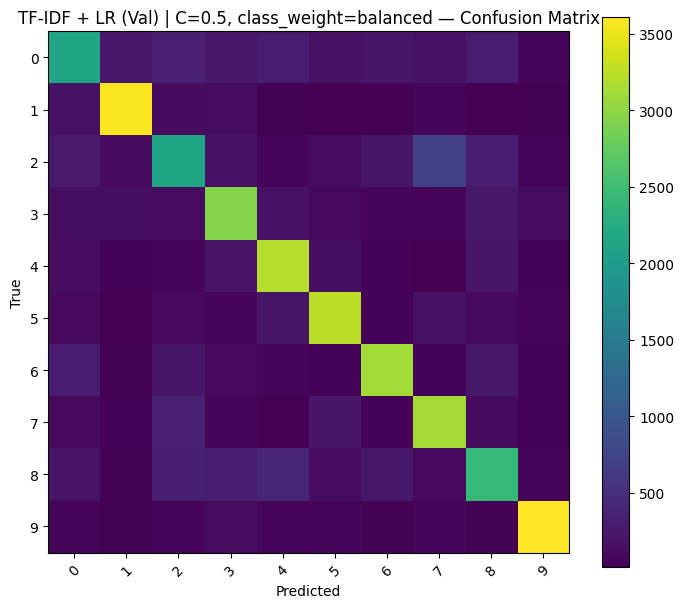

   [VAL METRICS] Acc=0.7021 | F1-macro=0.6999 | F1-weighted=0.6997


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



TF-IDF + LR (Val) | C=1.0, class_weight=balanced
                        precision    recall  f1-score   support

    Business & Finance      0.572     0.507     0.537      4213
  Computers & Internet      0.830     0.851     0.840      4194
 Education & Reference      0.553     0.508     0.530      4227
 Entertainment & Music      0.682     0.705     0.693      4170
Family & Relationships      0.704     0.763     0.732      4207
                Health      0.757     0.777     0.767      4179
 Politics & Government      0.761     0.742     0.751      4198
 Science & Mathematics      0.686     0.742     0.713      4181
     Society & Culture      0.597     0.579     0.588      4212
                Sports      0.860     0.861     0.861      4219

              accuracy                          0.703     42000
             macro avg      0.700     0.704     0.701     42000
          weighted avg      0.700     0.703     0.701     42000



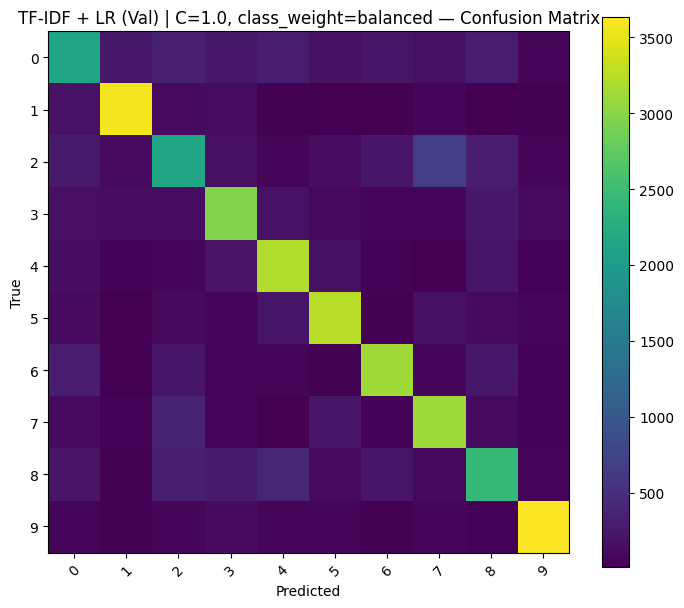

   [VAL METRICS] Acc=0.7033 | F1-macro=0.7013 | F1-weighted=0.7011


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



TF-IDF + LR (Val) | C=2.0, class_weight=balanced
                        precision    recall  f1-score   support

    Business & Finance      0.558     0.506     0.531      4213
  Computers & Internet      0.837     0.852     0.845      4194
 Education & Reference      0.548     0.507     0.526      4227
 Entertainment & Music      0.684     0.704     0.694      4170
Family & Relationships      0.700     0.759     0.728      4207
                Health      0.758     0.775     0.766      4179
 Politics & Government      0.753     0.740     0.746      4198
 Science & Mathematics      0.685     0.731     0.707      4181
     Society & Culture      0.587     0.570     0.579      4212
                Sports      0.867     0.862     0.864      4219

              accuracy                          0.700     42000
             macro avg      0.698     0.701     0.699     42000
          weighted avg      0.697     0.700     0.698     42000



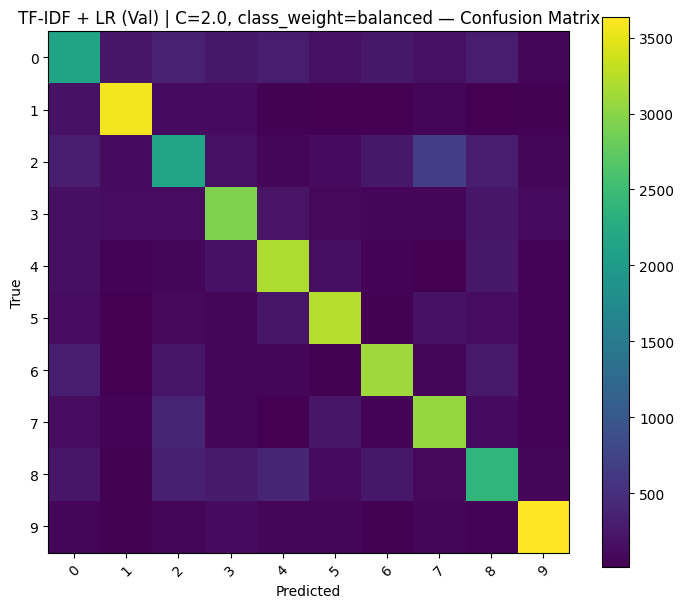

   [VAL METRICS] Acc=0.7003 | F1-macro=0.6986 | F1-weighted=0.6984
Selected LR params (Val best by F1-macro=0.7013): {'C': 1.0, 'max_iter': 300, 'tol': 0.0001, 'solver': 'saga', 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'class_weight': 'balanced'}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



TF-IDF + Logistic Regression (Test)
                        precision    recall  f1-score   support

    Business & Finance      0.580     0.512     0.544      6000
  Computers & Internet      0.831     0.861     0.846      6000
 Education & Reference      0.552     0.506     0.528      6000
 Entertainment & Music      0.680     0.706     0.693      6000
Family & Relationships      0.704     0.753     0.728      5999
                Health      0.755     0.785     0.770      6000
 Politics & Government      0.759     0.756     0.758      6000
 Science & Mathematics      0.701     0.756     0.728      6000
     Society & Culture      0.597     0.563     0.580      6000
                Sports      0.872     0.868     0.870      6000

              accuracy                          0.707     59999
             macro avg      0.703     0.707     0.704     59999
          weighted avg      0.703     0.707     0.704     59999



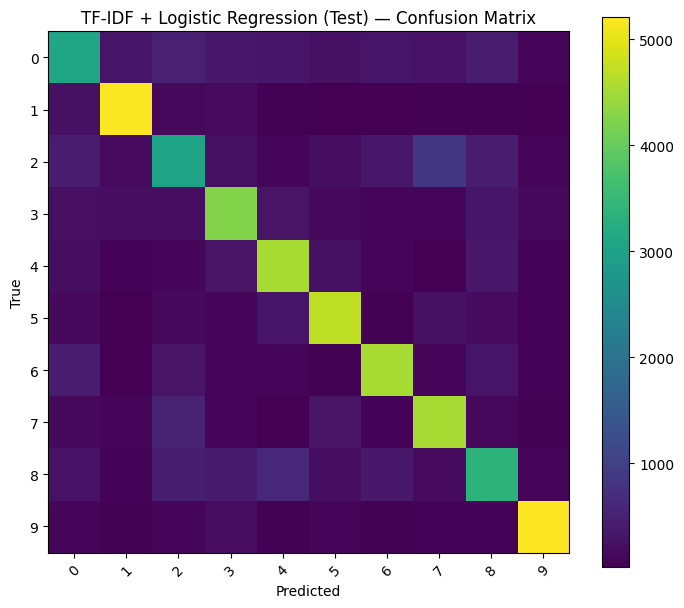

LogisticRegression (balanced) | best params: {'C': 1.0, 'max_iter': 300, 'tol': 0.0001, 'solver': 'saga', 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'class_weight': 'balanced'}
 Val F1(macro): 0.7013088546425873 | Test F1(macro): 0.7043


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np, pandas as pd

best_params, best_val_pred, best_val_f1 = None, None, -1.0

for C in [0.5, 1.0, 2.0]:
    lr = LogisticRegression(
        C=C, max_iter=300, tol=1e-4,
        solver="saga", multi_class="multinomial",
        n_jobs=None, penalty="l2",
        class_weight= None
    )
    lr.fit(Xtr_tf, y_tr)
    yv = lr.predict(Xval_tf)

    title = f"TF-IDF + LR (Val) | C={C}, class_weight=balanced"
    show_report_and_cm(y_val, yv, labels_names, title)

    # Log ALL validation metrics
    acc, f1m, f1w = compute_metrics(y_val, yv)
    print(f"   [VAL METRICS] Acc={acc:.4f} | F1-macro={f1m:.4f} | F1-weighted={f1w:.4f}")

    # Select by macro F1
    if f1m > best_val_f1:
        best_val_f1, best_params, best_val_pred = f1m, {
            "C": C, "max_iter": 300, "tol": 1e-4,
            "solver": "saga", "multi_class": "multinomial",
            "n_jobs": None, "penalty": "l2", "class_weight": "balanced"
        }, yv

print("Selected LR params (Val best by F1-macro="
      f"{best_val_f1:.4f}): {best_params}")

# ---- Final refit on (train+val) and single test evaluation ----
tfidf_vec_full = TfidfVectorizer(
    min_df=3, max_df=0.9,
    max_features=TFIDF_MAX_FEATURES,
    ngram_range=TFIDF_NGRAM_RANGE,
    sublinear_tf=True, norm="l2"
)
Xfull_tf = tfidf_vec_full.fit_transform(
    pd.concat([tr_df["clean_text"], val_df["clean_text"]], axis=0)
)
y_full   = np.concatenate([y_tr, y_val], axis=0)
Xtest_tf = tfidf_vec_full.transform(test_df["clean_text"])

lr_final = LogisticRegression(**best_params).fit(Xfull_tf, y_full)
yt = lr_final.predict(Xtest_tf)

show_report_and_cm(y_test, yt, labels_names, "TF-IDF + Logistic Regression (Test)")
log_tfidf("LogisticRegression (balanced)", best_params, best_val_pred, yt)


# **TF + Logistic Regression (class weight = balanced)**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



TF-IDF + LR (Val) | C=0.5, class_weight=balanced
                        precision    recall  f1-score   support

    Business & Finance      0.581     0.505     0.540      4213
  Computers & Internet      0.826     0.851     0.838      4194
 Education & Reference      0.552     0.505     0.527      4227
 Entertainment & Music      0.674     0.708     0.690      4170
Family & Relationships      0.703     0.764     0.732      4207
                Health      0.754     0.775     0.764      4179
 Politics & Government      0.760     0.739     0.749      4198
 Science & Mathematics      0.683     0.747     0.713      4181
     Society & Culture      0.601     0.575     0.588      4212
                Sports      0.856     0.855     0.855      4219

              accuracy                          0.702     42000
             macro avg      0.699     0.702     0.700     42000
          weighted avg      0.699     0.702     0.700     42000



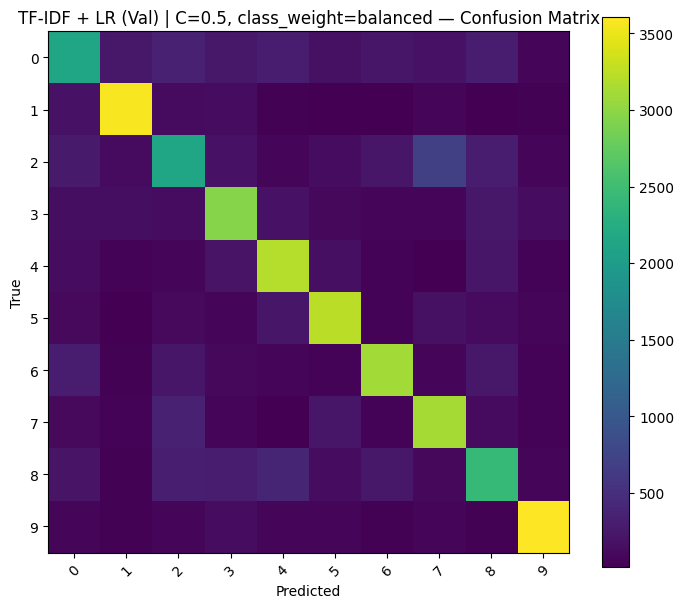

   [VAL METRICS] Acc=0.7020 | F1-macro=0.6998 | F1-weighted=0.6996


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



TF-IDF + LR (Val) | C=1.0, class_weight=balanced
                        precision    recall  f1-score   support

    Business & Finance      0.573     0.506     0.537      4213
  Computers & Internet      0.830     0.851     0.840      4194
 Education & Reference      0.554     0.507     0.529      4227
 Entertainment & Music      0.680     0.707     0.693      4170
Family & Relationships      0.704     0.763     0.732      4207
                Health      0.756     0.778     0.767      4179
 Politics & Government      0.761     0.742     0.752      4198
 Science & Mathematics      0.686     0.744     0.714      4181
     Society & Culture      0.598     0.577     0.587      4212
                Sports      0.861     0.860     0.860      4219

              accuracy                          0.703     42000
             macro avg      0.700     0.703     0.701     42000
          weighted avg      0.700     0.703     0.701     42000



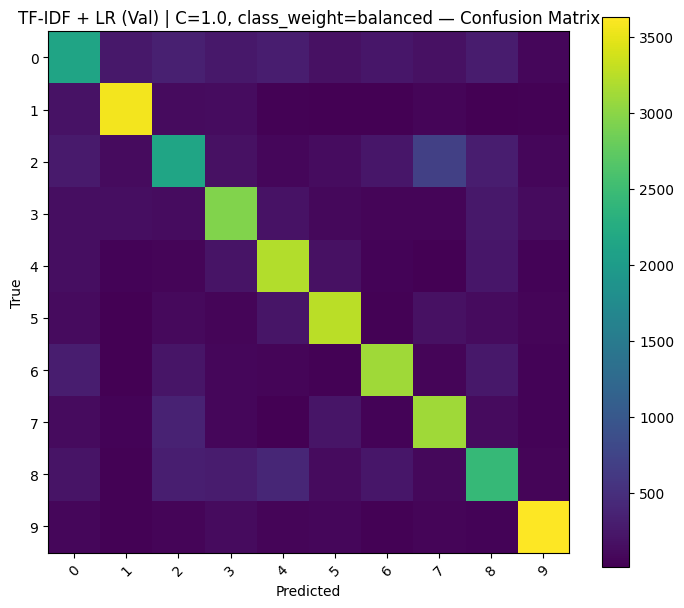

   [VAL METRICS] Acc=0.7033 | F1-macro=0.7012 | F1-weighted=0.7010


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



TF-IDF + LR (Val) | C=2.0, class_weight=balanced
                        precision    recall  f1-score   support

    Business & Finance      0.559     0.506     0.531      4213
  Computers & Internet      0.837     0.852     0.845      4194
 Education & Reference      0.549     0.505     0.526      4227
 Entertainment & Music      0.682     0.706     0.694      4170
Family & Relationships      0.700     0.758     0.728      4207
                Health      0.757     0.775     0.766      4179
 Politics & Government      0.753     0.740     0.746      4198
 Science & Mathematics      0.684     0.732     0.708      4181
     Society & Culture      0.587     0.570     0.578      4212
                Sports      0.867     0.861     0.864      4219

              accuracy                          0.700     42000
             macro avg      0.698     0.701     0.699     42000
          weighted avg      0.697     0.700     0.698     42000



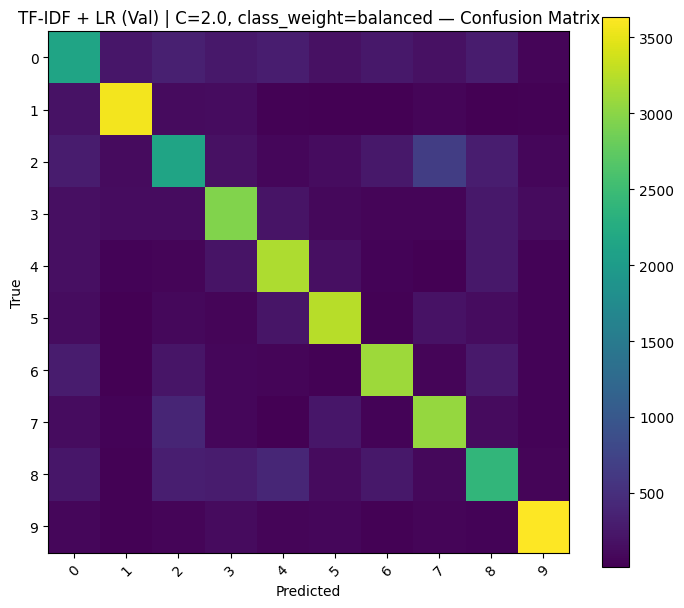

   [VAL METRICS] Acc=0.7003 | F1-macro=0.6986 | F1-weighted=0.6984
Selected LR params (Val best by F1-macro=0.7012): {'C': 1.0, 'max_iter': 300, 'tol': 0.0001, 'solver': 'saga', 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'class_weight': 'balanced'}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



TF-IDF + Logistic Regression (Test)
                        precision    recall  f1-score   support

    Business & Finance      0.580     0.512     0.544      6000
  Computers & Internet      0.831     0.861     0.846      6000
 Education & Reference      0.552     0.506     0.528      6000
 Entertainment & Music      0.680     0.706     0.693      6000
Family & Relationships      0.704     0.753     0.728      5999
                Health      0.755     0.785     0.770      6000
 Politics & Government      0.759     0.756     0.758      6000
 Science & Mathematics      0.701     0.756     0.728      6000
     Society & Culture      0.597     0.563     0.580      6000
                Sports      0.872     0.868     0.870      6000

              accuracy                          0.707     59999
             macro avg      0.703     0.707     0.704     59999
          weighted avg      0.703     0.707     0.704     59999



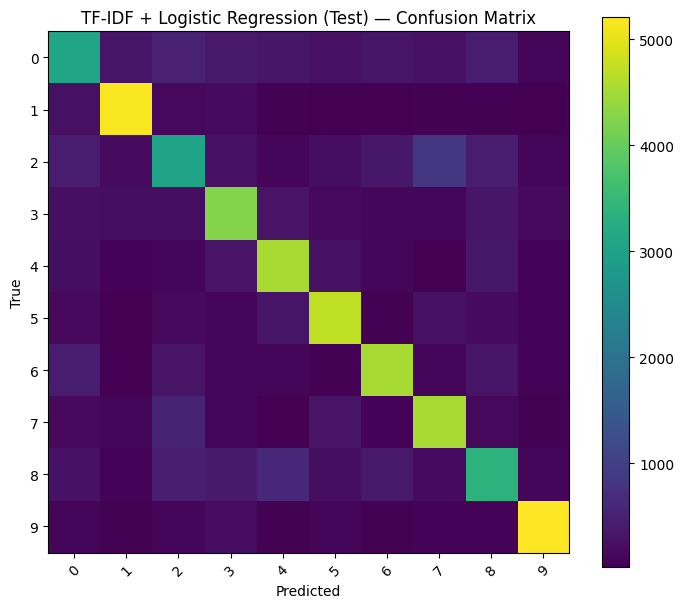

LogisticRegression (balanced) | best params: {'C': 1.0, 'max_iter': 300, 'tol': 0.0001, 'solver': 'saga', 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'class_weight': 'balanced'}
 Val F1(macro): 0.7011782998718444 | Test F1(macro): 0.7044


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np, pandas as pd

best_params, best_val_pred, best_val_f1 = None, None, -1.0

for C in [0.5, 1.0, 2.0]:
    lr = LogisticRegression(
        C=C, max_iter=300, tol=1e-4,
        solver="saga", multi_class="multinomial",
        n_jobs=None, penalty="l2",
        class_weight="balanced"   # THIS run uses balanced weights
    )
    lr.fit(Xtr_tf, y_tr)
    yv = lr.predict(Xval_tf)

    title = f"TF-IDF + LR (Val) | C={C}, class_weight=balanced"
    show_report_and_cm(y_val, yv, labels_names, title)

    # Log ALL validation metrics
    acc, f1m, f1w = compute_metrics(y_val, yv)
    print(f"   [VAL METRICS] Acc={acc:.4f} | F1-macro={f1m:.4f} | F1-weighted={f1w:.4f}")

    # Select by macro F1
    if f1m > best_val_f1:
        best_val_f1, best_params, best_val_pred = f1m, {
            "C": C, "max_iter": 300, "tol": 1e-4,
            "solver": "saga", "multi_class": "multinomial",
            "n_jobs": None, "penalty": "l2", "class_weight": "balanced"
        }, yv

print("Selected LR params (Val best by F1-macro="
      f"{best_val_f1:.4f}): {best_params}")

# ---- Final refit on (train+val) and single test evaluation ----
tfidf_vec_full = TfidfVectorizer(
    min_df=3, max_df=0.9,
    max_features=TFIDF_MAX_FEATURES,
    ngram_range=TFIDF_NGRAM_RANGE,
    sublinear_tf=True, norm="l2"
)
Xfull_tf = tfidf_vec_full.fit_transform(
    pd.concat([tr_df["clean_text"], val_df["clean_text"]], axis=0)
)
y_full   = np.concatenate([y_tr, y_val], axis=0)
Xtest_tf = tfidf_vec_full.transform(test_df["clean_text"])

lr_final = LogisticRegression(**best_params).fit(Xfull_tf, y_full)
yt = lr_final.predict(Xtest_tf)

show_report_and_cm(y_test, yt, labels_names, "TF-IDF + Logistic Regression (Test)")
log_tfidf("LogisticRegression (balanced)", best_params, best_val_pred, yt)


# **TF-IDF + Random Forest**


TF-IDF(SVD 256) + RF (Val) | depth=None
                        precision    recall  f1-score   support

    Business & Finance      0.499     0.440     0.468      4213
  Computers & Internet      0.679     0.796     0.733      4194
 Education & Reference      0.460     0.401     0.428      4227
 Entertainment & Music      0.534     0.529     0.531      4170
Family & Relationships      0.605     0.736     0.664      4207
                Health      0.618     0.663     0.640      4179
 Politics & Government      0.631     0.621     0.626      4198
 Science & Mathematics      0.589     0.638     0.612      4181
     Society & Culture      0.531     0.451     0.487      4212
                Sports      0.737     0.648     0.690      4219

              accuracy                          0.592     42000
             macro avg      0.588     0.592     0.588     42000
          weighted avg      0.588     0.592     0.588     42000



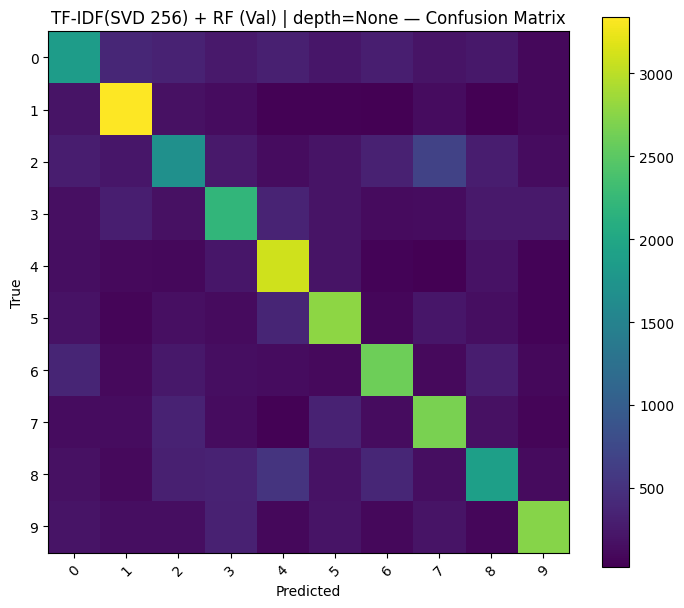

   [VAL METRICS] Acc=0.5921 | F1-macro=0.5880 | F1-weighted=0.5879

TF-IDF(SVD 256) + RF (Val) | depth=40
                        precision    recall  f1-score   support

    Business & Finance      0.498     0.435     0.464      4213
  Computers & Internet      0.687     0.796     0.738      4194
 Education & Reference      0.462     0.406     0.432      4227
 Entertainment & Music      0.537     0.531     0.534      4170
Family & Relationships      0.602     0.735     0.662      4207
                Health      0.627     0.665     0.645      4179
 Politics & Government      0.624     0.625     0.624      4198
 Science & Mathematics      0.587     0.641     0.613      4181
     Society & Culture      0.529     0.453     0.488      4212
                Sports      0.742     0.648     0.692      4219

              accuracy                          0.593     42000
             macro avg      0.590     0.594     0.589     42000
          weighted avg      0.590     0.593     0.589     42

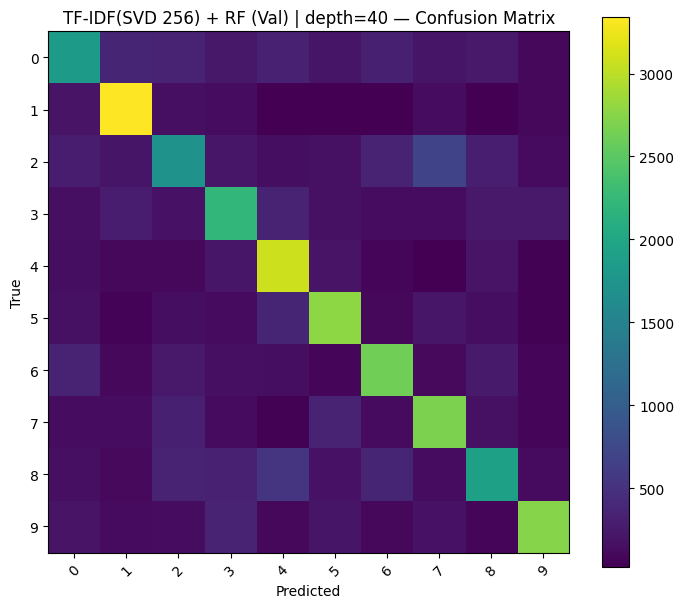

   [VAL METRICS] Acc=0.5933 | F1-macro=0.5893 | F1-weighted=0.5892

TF-IDF(SVD 512) + RF (Val) | depth=None
                        precision    recall  f1-score   support

    Business & Finance      0.499     0.441     0.468      4213
  Computers & Internet      0.682     0.802     0.737      4194
 Education & Reference      0.472     0.402     0.434      4227
 Entertainment & Music      0.538     0.527     0.532      4170
Family & Relationships      0.594     0.741     0.659      4207
                Health      0.620     0.672     0.645      4179
 Politics & Government      0.634     0.623     0.628      4198
 Science & Mathematics      0.589     0.641     0.614      4181
     Society & Culture      0.547     0.455     0.497      4212
                Sports      0.747     0.653     0.697      4219

              accuracy                          0.596     42000
             macro avg      0.592     0.596     0.591     42000
          weighted avg      0.592     0.596     0.591     

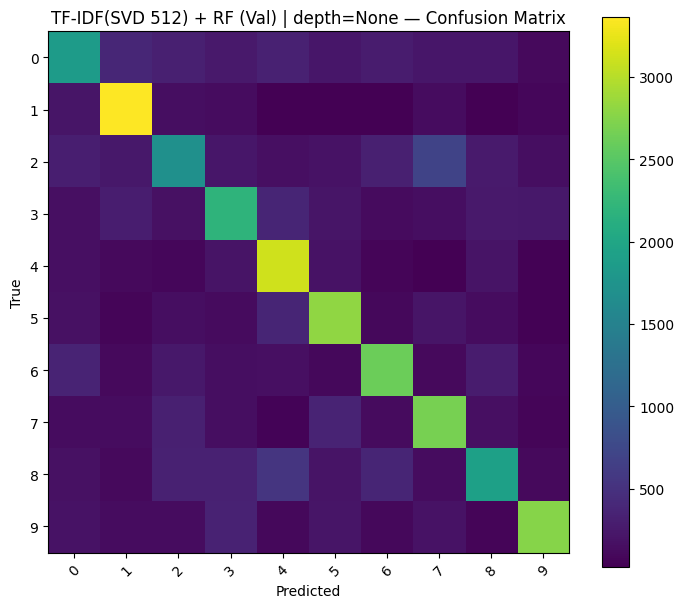

   [VAL METRICS] Acc=0.5956 | F1-macro=0.5912 | F1-weighted=0.5911

TF-IDF(SVD 512) + RF (Val) | depth=40
                        precision    recall  f1-score   support

    Business & Finance      0.493     0.432     0.461      4213
  Computers & Internet      0.684     0.798     0.737      4194
 Education & Reference      0.462     0.396     0.426      4227
 Entertainment & Music      0.536     0.518     0.527      4170
Family & Relationships      0.597     0.743     0.662      4207
                Health      0.626     0.667     0.646      4179
 Politics & Government      0.626     0.626     0.626      4198
 Science & Mathematics      0.578     0.640     0.607      4181
     Society & Culture      0.533     0.448     0.487      4212
                Sports      0.737     0.650     0.691      4219

              accuracy                          0.591     42000
             macro avg      0.587     0.592     0.587     42000
          weighted avg      0.587     0.591     0.587     42

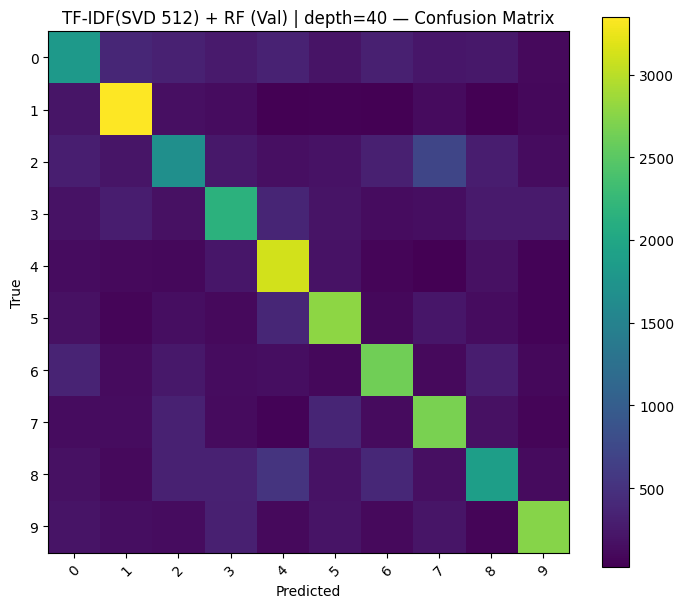

   [VAL METRICS] Acc=0.5914 | F1-macro=0.5869 | F1-weighted=0.5867
Selected RF params (Val best by F1-macro=0.5912): {'svd_components': 512, 'n_estimators': 200, 'max_depth': None}


In [ ]:
# Trees don't like huge sparse TF-IDF; we compress with TruncatedSVD
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
import numpy as np, gc

best_cfg, best_val_pred, best_val_f1 = None, None, -1.0

for n_comp in [256, 512]:
    svd = TruncatedSVD(n_components=n_comp, random_state=42)
    Xtr_proj  = svd.fit_transform(Xtr_tf).astype("float32")
    Xval_proj = svd.transform(Xval_tf).astype("float32")

    for depth in [None, 40]:
        rf = RandomForestClassifier(
            n_estimators=200,  # you can lower to 150 if RAM/time is tight
            max_depth=depth, random_state=42, n_jobs=-1
        )
        rf.fit(Xtr_proj, y_tr)
        yv = rf.predict(Xval_proj)

        title = f"TF-IDF(SVD {n_comp}) + RF (Val) | depth={depth}"
        show_report_and_cm(y_val, yv, labels_names, title)

        # NEW: log all validation metrics
        acc, f1m, f1w = compute_metrics(y_val, yv)
        print(f"   [VAL METRICS] Acc={acc:.4f} | F1-macro={f1m:.4f} | F1-weighted={f1w:.4f}")

        # Select by macro F1 (fairer for class imbalance)
        if f1m > best_val_f1:
            best_val_f1  = f1m
            best_cfg     = {"svd_components": n_comp, "n_estimators": 200, "max_depth": depth}
            best_val_pred= yv

print("Selected RF params (Val best by F1-macro="
      f"{best_val_f1:.4f}): {best_cfg}")

# ===== Final retrain on (train+val) and single test evaluation =====
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec_full = TfidfVectorizer(
    min_df=3, max_df=0.9,
    max_features=TFIDF_MAX_FEATURES,
    ngram_range=TFIDF_NGRAM_RANGE,
    sublinear_tf=True, norm="l2"
)
Xfull_tf = tfidf_vec_full.fit_transform(pd.concat([tr_df["clean_text"], val_df["clean_text"]], axis=0))
y_full   = np.concatenate([y_tr, y_val], axis=0)
Xtest_tf = tfidf_vec_full.transform(test_df["clean_text"])

svd_final  = TruncatedSVD(n_components=best_cfg["svd_components"], random_state=42)
Xfull_proj = svd_final.fit_transform(Xfull_tf).astype("float32")
Xtest_proj = svd_final.transform(Xtest_tf).astype("float32")

# free sparse to lower peak RAM
del Xfull_tf, Xtest_tf; gc.collect()

rf_final = RandomForestClassifier(
    n_estimators=best_cfg["n_estimators"],
    max_depth=best_cfg["max_depth"],
    random_state=42, n_jobs=-1
)
rf_final.fit(Xfull_proj, y_full)
yt = rf_final.predict(Xtest_proj)

show_report_and_cm(y_test, yt, labels_names, "TF-IDF(SVD) + Random Forest (Test)")
log_tfidf("RandomForest(SVD)", best_cfg, best_val_pred, yt)



TF-IDF(SVD-512) + RandomForest(depth=None, n=200) — Test
                        precision    recall  f1-score   support

    Business & Finance      0.492     0.436     0.462      6000
  Computers & Internet      0.682     0.811     0.741      6000
 Education & Reference      0.459     0.387     0.420      6000
 Entertainment & Music      0.539     0.530     0.535      6000
Family & Relationships      0.582     0.730     0.648      5999
                Health      0.627     0.675     0.650      6000
 Politics & Government      0.631     0.620     0.626      6000
 Science & Mathematics      0.587     0.643     0.614      6000
     Society & Culture      0.533     0.440     0.482      6000
                Sports      0.757     0.654     0.702      6000

              accuracy                          0.593     59999
             macro avg      0.589     0.593     0.588     59999
          weighted avg      0.589     0.593     0.588     59999



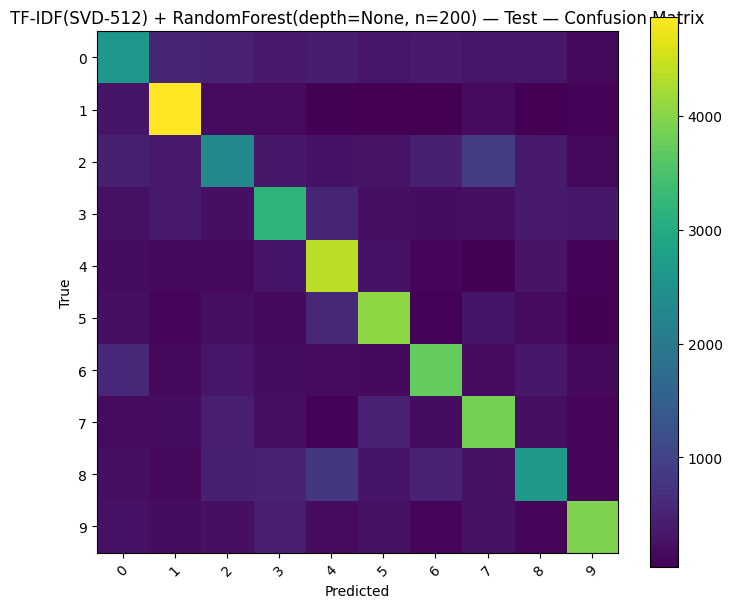

RandomForest(SVD) | best params: {'svd_components': 512, 'n_estimators': 200, 'max_depth': None}
 Val F1(macro): nan | Test F1(macro): 0.5879


In [ ]:
# ===== Resume: TF-IDF(SVD) -> RandomForest (final retrain + test) =====
import numpy as np, gc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

# Use tuned choices if present; else fallback to what you selected previously
try:
    N_COMP = int(best_cfg.get("svd_components", 512))
    DEPTH  = best_cfg.get("max_depth", None)
    N_EST  = int(best_cfg.get("n_estimators", 200))
except NameError:
    N_COMP, DEPTH, N_EST = 512, None, 200

# Keep TF-IDF consistent with earlier settings
TFIDF_MAX_FEATURES = TFIDF_MAX_FEATURES if "TFIDF_MAX_FEATURES" in globals() else 30000
TFIDF_NGRAM_RANGE  = TFIDF_NGRAM_RANGE  if "TFIDF_NGRAM_RANGE"  in globals() else (1,1)

# 1) Refit TF-IDF on (train+val)
tfidf_vec_full = TfidfVectorizer(
    min_df=3, max_df=0.9,
    max_features=TFIDF_MAX_FEATURES,
    ngram_range=TFIDF_NGRAM_RANGE,
    sublinear_tf=True, norm="l2"
)
Xfull_tf = tfidf_vec_full.fit_transform(pd.concat([tr_df["clean_text"], val_df["clean_text"]], axis=0))
y_full   = np.concatenate([y_tr, y_val], axis=0)
Xtest_tf = tfidf_vec_full.transform(test_df["clean_text"])

# 2) SVD -> dense float32 (trees OK with dense arrays)
svd_final  = TruncatedSVD(n_components=N_COMP, random_state=42)
Xfull_proj = svd_final.fit_transform(Xfull_tf).astype("float32")
Xtest_proj = svd_final.transform(Xtest_tf).astype("float32")

# Free big sparse matrices to lower RAM
del Xfull_tf, Xtest_tf
gc.collect()

# 3) Train RF once on (train+val), then test
rf_final = RandomForestClassifier(
    n_estimators=N_EST, max_depth=DEPTH,
    random_state=42, n_jobs=-1
)
rf_final.fit(Xfull_proj, y_full)
y_test_pred_rf = rf_final.predict(Xtest_proj)

show_report_and_cm(
    y_test, y_test_pred_rf, labels_names,
    title=f"TF-IDF(SVD-{N_COMP}) + RandomForest(depth={DEPTH}, n={N_EST}) — Test"
)

# Log (val preds may be missing after crash; we pass None safely)
try:
    log_tfidf("RandomForest(SVD)", {"svd_components": N_COMP, "n_estimators": N_EST, "max_depth": DEPTH},
              None, y_test_pred_rf)
except Exception as e:
    print("Log note:", e)


# TF-IDF + DNN

Epoch 1/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5190 - loss: 1.5021 - val_accuracy: 0.6455 - val_loss: 1.1119 - learning_rate: 0.0010
Epoch 2/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6328 - loss: 1.1625 - val_accuracy: 0.6495 - val_loss: 1.0832 - learning_rate: 0.0010
Epoch 3/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6409 - loss: 1.1257 - val_accuracy: 0.6516 - val_loss: 1.0707 - learning_rate: 0.0010
Epoch 4/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6466 - loss: 1.1041 - val_accuracy: 0.6541 - val_loss: 1.0618 - learning_rate: 0.0010
Epoch 5/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6495 - loss: 1.0910 - val_accuracy: 0.6562 - val_loss: 1.0570 - learning_rate: 0.0010
Epoch 6/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6529 - loss: 1.0796 - val_accuracy: 0.6571 - val_loss: 1.0524 - learning_rate: 0.0010
Epoch 7/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.

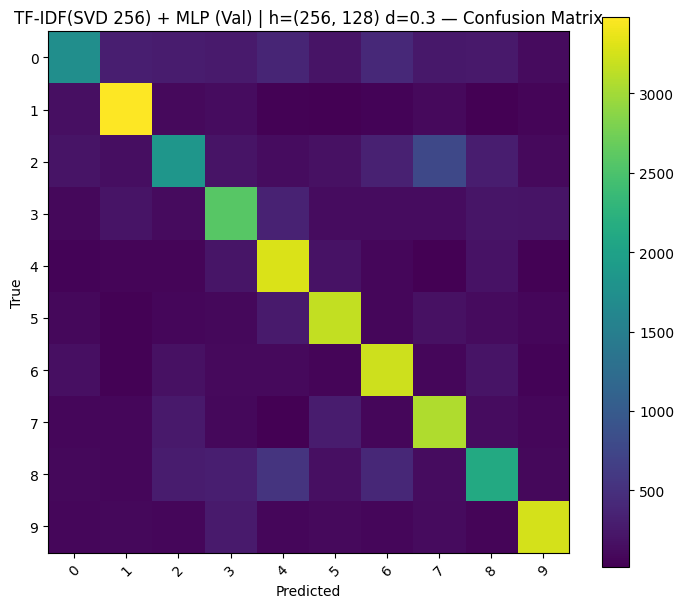

   [VAL METRICS] Acc=0.6599 | F1-macro=0.6530 | F1-weighted=0.6528
Epoch 1/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.5312 - loss: 1.4563 - val_accuracy: 0.6423 - val_loss: 1.1146 - learning_rate: 0.0010
Epoch 2/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.6311 - loss: 1.1641 - val_accuracy: 0.6476 - val_loss: 1.0872 - learning_rate: 0.0010
Epoch 3/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.6400 - loss: 1.1314 - val_accuracy: 0.6535 - val_loss: 1.0730 - learning_rate: 0.0010
Epoch 4/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.6433 - loss: 1.1138 - val_accuracy: 0.6535 - val_loss: 1.0668 - learning_rate: 0.0010
Epoch 5/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.6474 - loss: 1.0979 - val_accuracy: 0.6554 - val_loss: 1.0616 - learning_rate: 0.0010
Epoch 6/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6511 - loss: 1.0861 - val_accuracy: 0.6565 - val_loss: 1.0580 - learning_rate: 0.00

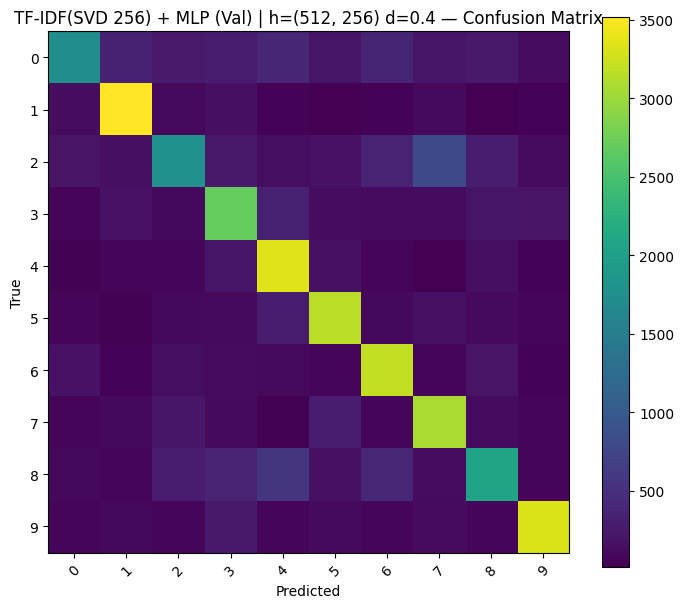

   [VAL METRICS] Acc=0.6627 | F1-macro=0.6547 | F1-weighted=0.6546
Epoch 1/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.4987 - loss: 1.5481 - val_accuracy: 0.6553 - val_loss: 1.0763 - learning_rate: 0.0010
Epoch 2/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6442 - loss: 1.1294 - val_accuracy: 0.6619 - val_loss: 1.0492 - learning_rate: 0.0010
Epoch 3/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6551 - loss: 1.0863 - val_accuracy: 0.6645 - val_loss: 1.0385 - learning_rate: 0.0010
Epoch 4/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6606 - loss: 1.0610 - val_accuracy: 0.6659 - val_loss: 1.0314 - learning_rate: 0.0010
Epoch 5/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6647 - loss: 1.0426 - val_accuracy: 0.6670 - val_loss: 1.0270 - learning_rate: 0.0010
Epoch 6/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6686 - loss: 1.0298 - val_accuracy: 0.6681 - val_loss: 1.0256 - learning_rate: 0.0010
Epo

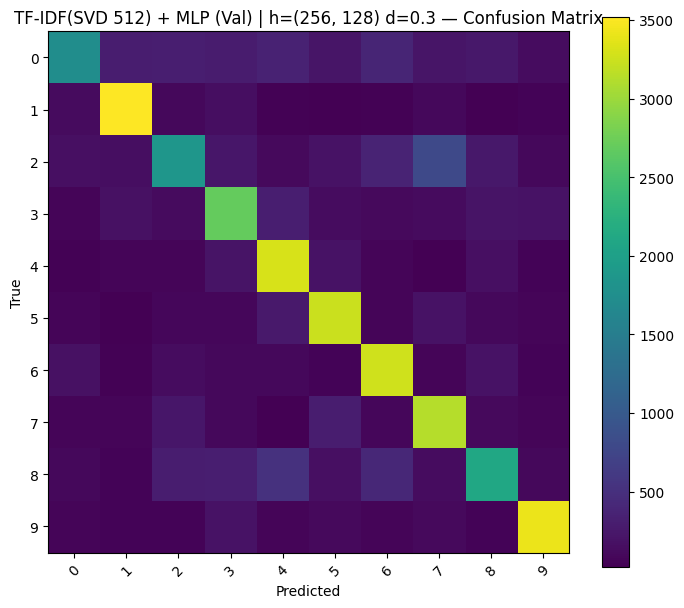

   [VAL METRICS] Acc=0.6729 | F1-macro=0.6652 | F1-weighted=0.6650
Epoch 1/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.5151 - loss: 1.5068 - val_accuracy: 0.6533 - val_loss: 1.0809 - learning_rate: 0.0010
Epoch 2/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.6416 - loss: 1.1347 - val_accuracy: 0.6592 - val_loss: 1.0520 - learning_rate: 0.0010
Epoch 3/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.6525 - loss: 1.0956 - val_accuracy: 0.6621 - val_loss: 1.0447 - learning_rate: 0.0010
Epoch 4/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.6574 - loss: 1.0715 - val_accuracy: 0.6645 - val_loss: 1.0372 - learning_rate: 0.0010
Epoch 5/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.6606 - loss: 1.0551 - val_accuracy: 0.6632 - val_loss: 1.0369 - learning_rate: 0.0010
Epoch 6/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6637 - loss: 1.0381 - val_accuracy: 0.6658 - val_loss: 1.0346 - learning_rate: 0.00

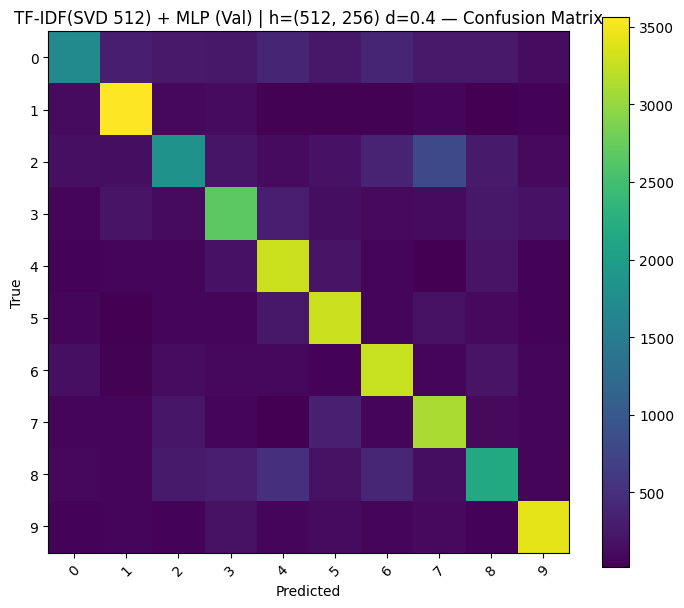

   [VAL METRICS] Acc=0.6737 | F1-macro=0.6656 | F1-weighted=0.6655
Selected MLP: {'svd_components': 512, 'hidden': (512, 256), 'dropout': 0.4, 'batch_size': 128, 'epochs': 10}  (Val F1-macro= 0.6656 )


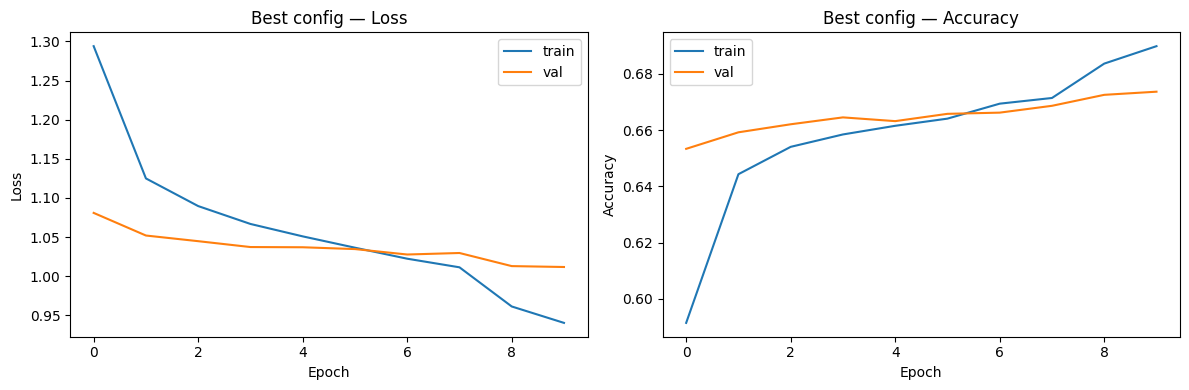

Epoch 1/8
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.5313 - loss: 1.4638
Epoch 2/8
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.6453 - loss: 1.1256
Epoch 3/8
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.6537 - loss: 1.0935
Epoch 4/8
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.6590 - loss: 1.0703
Epoch 5/8
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.6618 - loss: 1.0530
Epoch 6/8
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.6651 - loss: 1.0419
Epoch 7/8
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.6676 - loss: 1.0275
Epoch 8/8
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.6716 - loss: 1.0186


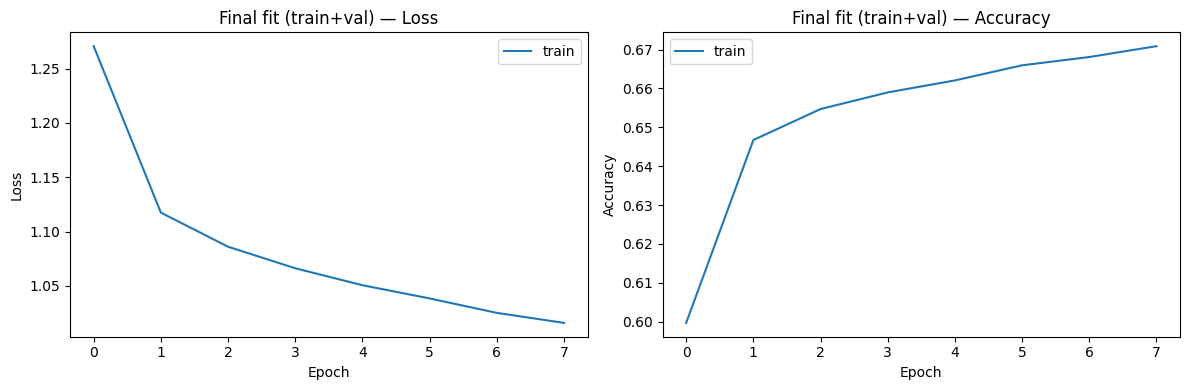


TF-IDF(SVD) + MLP (Test)
                        precision    recall  f1-score   support

    Business & Finance      0.662     0.415     0.510      6000
  Computers & Internet      0.748     0.864     0.802      6000
 Education & Reference      0.578     0.424     0.489      6000
 Entertainment & Music      0.621     0.646     0.634      6000
Family & Relationships      0.648     0.765     0.702      5999
                Health      0.694     0.785     0.737      6000
 Politics & Government      0.676     0.776     0.723      6000
 Science & Mathematics      0.669     0.731     0.698      6000
     Society & Culture      0.575     0.515     0.543      6000
                Sports      0.804     0.802     0.803      6000

              accuracy                          0.672     59999
             macro avg      0.668     0.672     0.664     59999
          weighted avg      0.668     0.672     0.664     59999



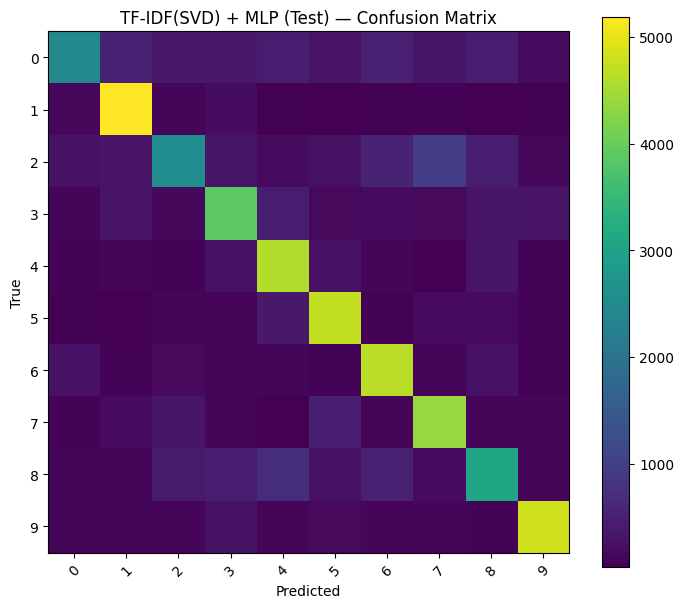

MLP(SVD) | best params: {'svd_components': 512, 'hidden': (512, 256), 'dropout': 0.4, 'batch_size': 128, 'epochs': 10}
 Val F1(macro): 0.6656177186381806 | Test F1(macro): 0.6641


In [ ]:
# DNN on dense features: TF-IDF -> SVD (dense) -> small MLP
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

tf.random.set_seed(42); np.random.seed(42)
num_classes = len(labels_names)

def build_mlp(input_dim, hidden=(256,128), dropout=0.3, n_classes=10):
    m = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(hidden[0], activation="relu"),
        layers.Dropout(dropout),
        layers.Dense(hidden[1], activation="relu"),
        layers.Dropout(dropout),
        layers.Dense(n_classes, activation="softmax"),
    ])
    m.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return m

best_cfg, best_val_pred, best_val_f1 = None, None, -1.0
best_hist = None  # keep history of the best validation run for plotting

for n_comp in [256, 512]:
    svd = TruncatedSVD(n_components=n_comp, random_state=42)
    Xtr_proj  = svd.fit_transform(Xtr_tf).astype("float32")
    Xval_proj = svd.transform(Xval_tf).astype("float32")

    scaler = StandardScaler(with_mean=True)
    Xtr_proj  = scaler.fit_transform(Xtr_proj).astype("float32")
    Xval_proj = scaler.transform(Xval_proj).astype("float32")

    for cfg in [
        {"hidden": (256,128), "dropout": 0.30, "batch_size": 128, "epochs": 10},
        {"hidden": (512,256), "dropout": 0.40, "batch_size": 128, "epochs": 10},
    ]:
        mlp = build_mlp(n_comp, hidden=cfg["hidden"], dropout=cfg["dropout"], n_classes=num_classes)
        es  = callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)
        rl  = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1, verbose=0)

        hist = mlp.fit(
            Xtr_proj, y_tr,
            validation_data=(Xval_proj, y_val),
            epochs=cfg["epochs"], batch_size=cfg["batch_size"],
            verbose=1, callbacks=[es, rl]
        )

        # Validation predictions + metrics
        yv = mlp.predict(Xval_proj, batch_size=256, verbose=0).argmax(axis=1)
        show_report_and_cm(y_val, yv, labels_names,
                           f"TF-IDF(SVD {n_comp}) + MLP (Val) | h={cfg['hidden']} d={cfg['dropout']}")
        acc, f1m, f1w = compute_metrics(y_val, yv)
        print(f"   [VAL METRICS] Acc={acc:.4f} | F1-macro={f1m:.4f} | F1-weighted={f1w:.4f}")

        # Keep best by F1-macro
        if f1m > best_val_f1:
            best_val_f1  = f1m
            best_cfg     = {"svd_components": n_comp, **cfg}
            best_val_pred= yv
            best_hist    = hist.history  # save curves for the best config

print("Selected MLP:", best_cfg, " (Val F1-macro=", round(best_val_f1,4), ")")

# ---- Plot training curves for the best validation run ----
if best_hist is not None:
    plt.figure(figsize=(12,4))
    # Loss
    plt.subplot(1,2,1)
    plt.plot(best_hist["loss"], label="train")
    plt.plot(best_hist["val_loss"], label="val")
    plt.title("Best config — Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(best_hist["accuracy"], label="train")
    plt.plot(best_hist["val_accuracy"], label="val")
    plt.title("Best config — Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()
    plt.tight_layout(); plt.show()

# ===== Final retrain on (train+val) and test once =====
tfidf_vec_full = TfidfVectorizer(min_df=3, max_df=0.9,
                                 max_features=TFIDF_MAX_FEATURES,
                                 ngram_range=TFIDF_NGRAM_RANGE,
                                 sublinear_tf=True, norm="l2")
Xfull_tf = tfidf_vec_full.fit_transform(pd.concat([tr_df["clean_text"], val_df["clean_text"]]))
y_full   = np.concatenate([y_tr, y_val])
Xtest_tf = tfidf_vec_full.transform(test_df["clean_text"])

svd_final    = TruncatedSVD(n_components=best_cfg["svd_components"], random_state=42)
scaler_final = StandardScaler(with_mean=True)
Xfull_proj   = scaler_final.fit_transform(svd_final.fit_transform(Xfull_tf)).astype("float32")
Xtest_proj   = scaler_final.transform(svd_final.transform(Xtest_tf)).astype("float32")

mlp_final = build_mlp(best_cfg["svd_components"],
                      hidden=best_cfg["hidden"],
                      dropout=best_cfg["dropout"],
                      n_classes=num_classes)

final_epochs = max(6, best_cfg["epochs"] - 2)
final_hist = mlp_final.fit(
    Xfull_proj, y_full,
    epochs=final_epochs, batch_size=best_cfg["batch_size"], verbose=1
).history

# Plot curves for the final train (train+val)
plt.figure(figsize=(12,4))
# Loss (no val here because we trained on full data)
plt.subplot(1,2,1)
plt.plot(final_hist["loss"], label="train")
plt.title("Final fit (train+val) — Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
# Accuracy
plt.subplot(1,2,2)
plt.plot(final_hist["accuracy"], label="train")
plt.title("Final fit (train+val) — Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()
plt.tight_layout(); plt.show()

# Test once
yt = mlp_final.predict(Xtest_proj, batch_size=256, verbose=0).argmax(axis=1)
show_report_and_cm(y_test, yt, labels_names, "TF-IDF(SVD) + MLP (Test)")
log_tfidf("MLP(SVD)", best_cfg, best_val_pred, yt)


Epoch 1/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.5149 - loss: 1.5076 - val_accuracy: 0.6409 - val_loss: 1.1153 - learning_rate: 0.0010
Epoch 2/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6315 - loss: 1.1621 - val_accuracy: 0.6489 - val_loss: 1.0847 - learning_rate: 0.0010
Epoch 3/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6399 - loss: 1.1245 - val_accuracy: 0.6514 - val_loss: 1.0721 - learning_rate: 0.0010
Epoch 4/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6471 - loss: 1.1030 - val_accuracy: 0.6551 - val_loss: 1.0633 - learning_rate: 0.0010
Epoch 5/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6499 - loss: 1.0911 - val_accuracy: 0.6551 - val_loss: 1.0587 - learning_rate: 0.0010
Epoch 6/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6527 - loss: 1.0797 - val_accuracy: 0.6565 - val_loss: 1.0550 - learning_rate: 0.0010
Epoch 7/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6

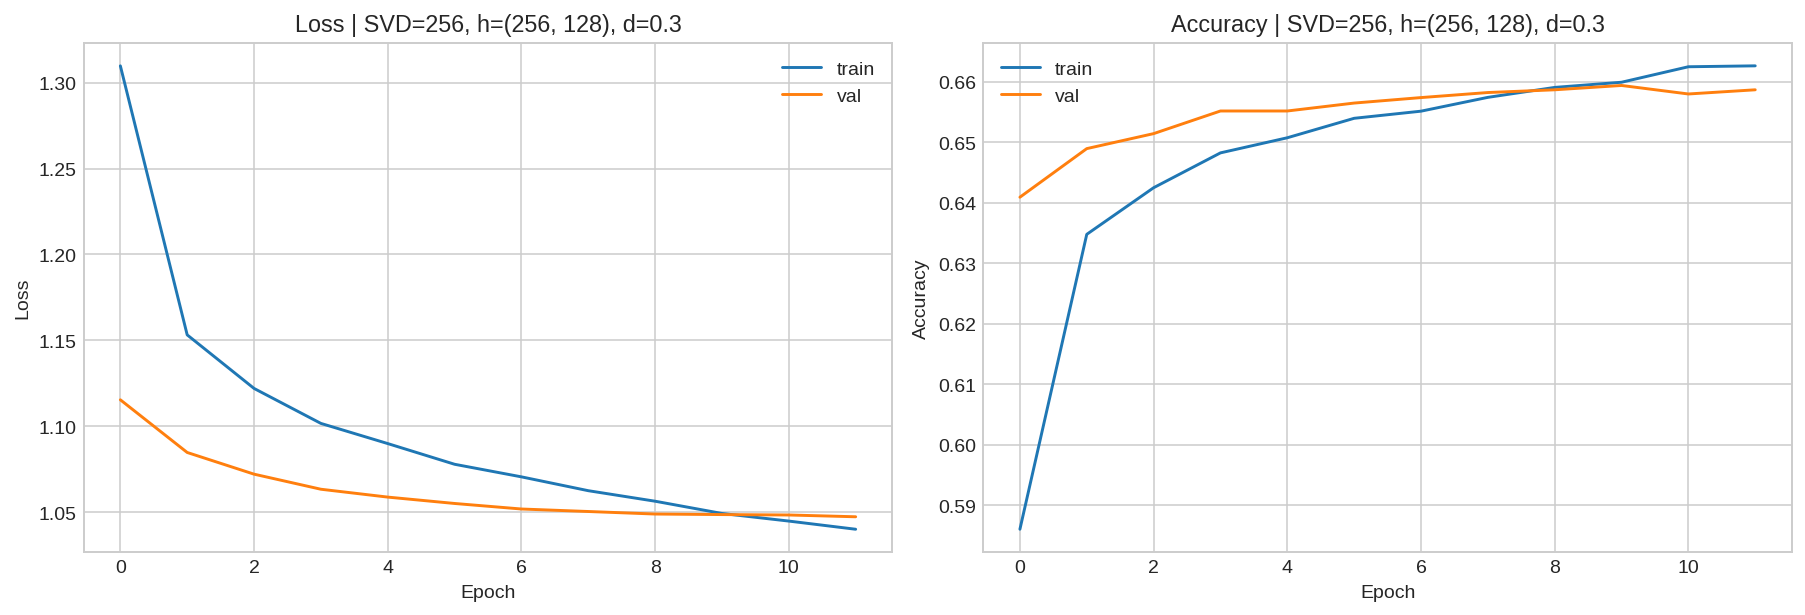


TF-IDF(SVD 256) + MLP (Val) | h=(256, 128) d=0.3
                        precision    recall  f1-score   support

    Business & Finance      0.635     0.412     0.500      4213
  Computers & Internet      0.760     0.836     0.796      4194
 Education & Reference      0.575     0.414     0.481      4227
 Entertainment & Music      0.595     0.630     0.612      4170
Family & Relationships      0.625     0.780     0.694      4207
                Health      0.699     0.756     0.727      4179
 Politics & Government      0.661     0.761     0.708      4198
 Science & Mathematics      0.622     0.741     0.676      4181
     Society & Culture      0.591     0.497     0.540      4212
                Sports      0.796     0.770     0.783      4219

              accuracy                          0.659     42000
             macro avg      0.656     0.660     0.652     42000
          weighted avg      0.656     0.659     0.651     42000



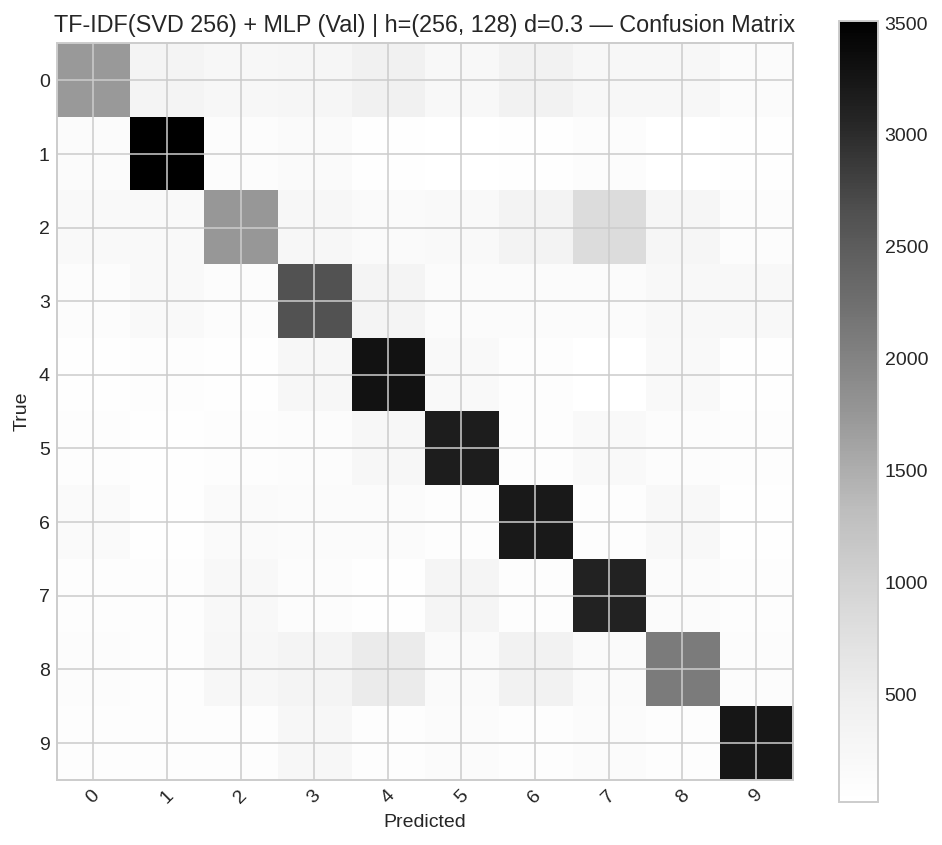

   [VAL METRICS] Acc=0.6594 | F1-macro=0.6516 | F1-weighted=0.6515
Epoch 1/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.5311 - loss: 1.4595 - val_accuracy: 0.6438 - val_loss: 1.1124 - learning_rate: 0.0010
Epoch 2/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.6297 - loss: 1.1654 - val_accuracy: 0.6471 - val_loss: 1.0873 - learning_rate: 0.0010
Epoch 3/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6380 - loss: 1.1313 - val_accuracy: 0.6513 - val_loss: 1.0728 - learning_rate: 0.0010
Epoch 4/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6433 - loss: 1.1111 - val_accuracy: 0.6528 - val_loss: 1.0699 - learning_rate: 0.0010
Epoch 5/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.6471 - loss: 1.0968 - val_accuracy: 0.6515 - val_loss: 1.0670 - learning_rate: 0.0010
Epoch 6/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.6503 - loss: 1.0866 - val_accuracy: 0.6530 - val_loss: 1.0622 - learning_rate: 0.00

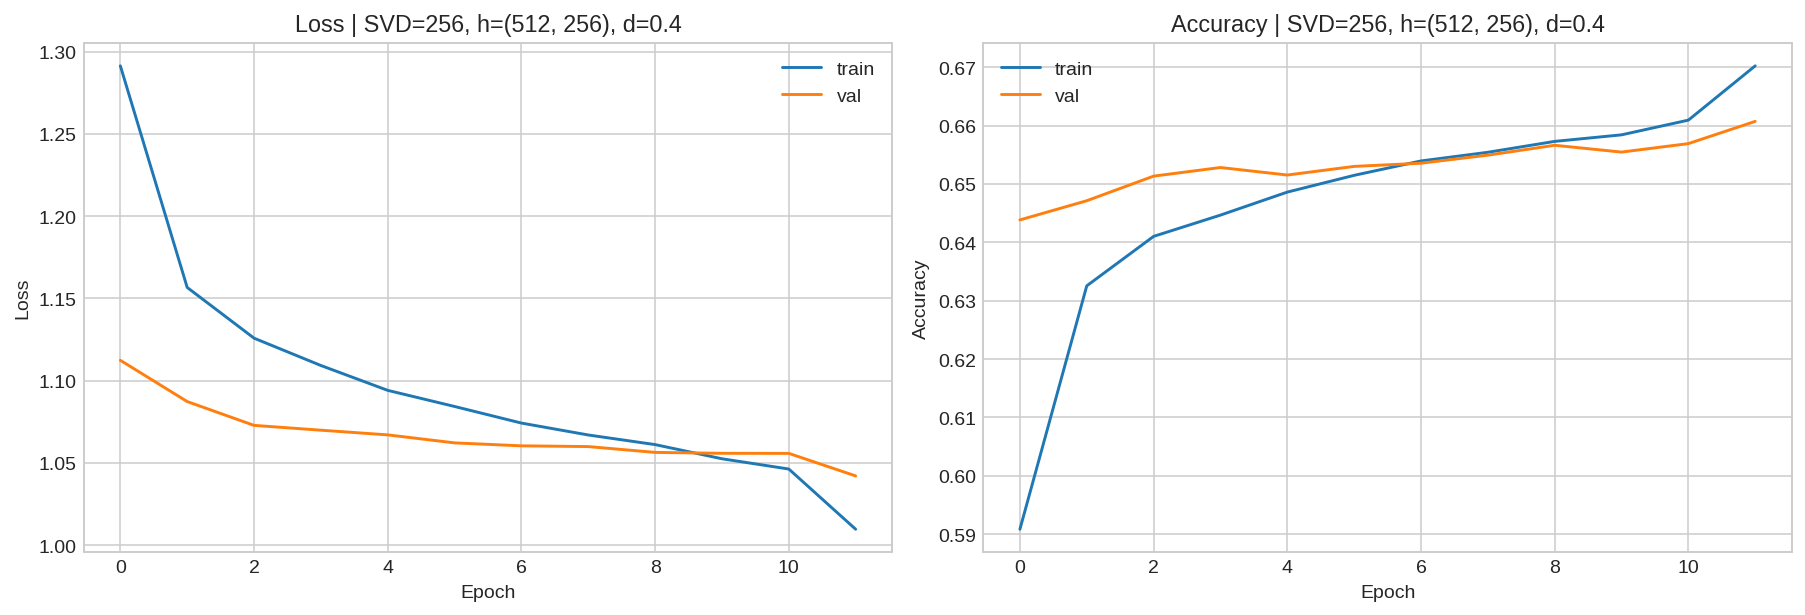


TF-IDF(SVD 256) + MLP (Val) | h=(512, 256) d=0.4
                        precision    recall  f1-score   support

    Business & Finance      0.644     0.408     0.500      4213
  Computers & Internet      0.757     0.837     0.795      4194
 Education & Reference      0.561     0.423     0.482      4227
 Entertainment & Music      0.618     0.623     0.620      4170
Family & Relationships      0.616     0.794     0.694      4207
                Health      0.700     0.757     0.727      4179
 Politics & Government      0.675     0.747     0.709      4198
 Science & Mathematics      0.627     0.743     0.680      4181
     Society & Culture      0.581     0.495     0.535      4212
                Sports      0.793     0.783     0.788      4219

              accuracy                          0.661     42000
             macro avg      0.657     0.661     0.653     42000
          weighted avg      0.657     0.661     0.653     42000



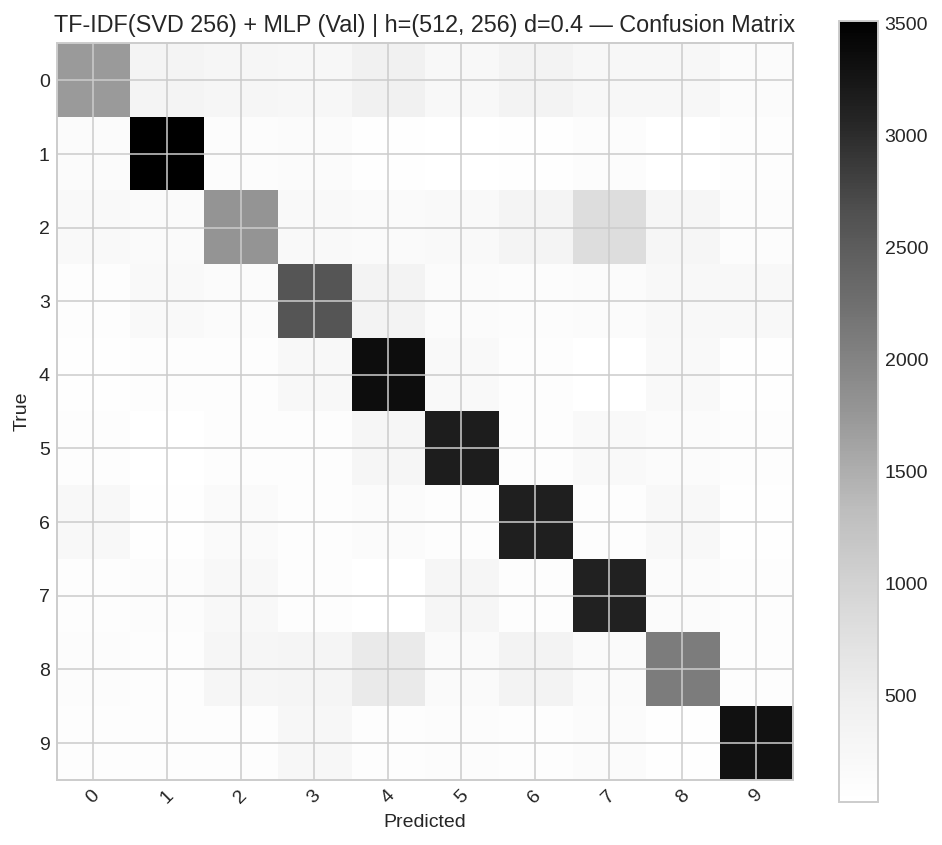

   [VAL METRICS] Acc=0.6607 | F1-macro=0.6530 | F1-weighted=0.6528
Epoch 1/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.4993 - loss: 1.5460 - val_accuracy: 0.6561 - val_loss: 1.0761 - learning_rate: 0.0010
Epoch 2/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6442 - loss: 1.1277 - val_accuracy: 0.6608 - val_loss: 1.0505 - learning_rate: 0.0010
Epoch 3/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6538 - loss: 1.0856 - val_accuracy: 0.6636 - val_loss: 1.0382 - learning_rate: 0.0010
Epoch 4/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6618 - loss: 1.0608 - val_accuracy: 0.6659 - val_loss: 1.0309 - learning_rate: 0.0010
Epoch 5/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6649 - loss: 1.0447 - val_accuracy: 0.6666 - val_loss: 1.0303 - learning_rate: 0.0010
Epoch 6/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6690 - loss: 1.0279 - val_accuracy: 0.6673 - val_loss: 1.0268 - learning_rate: 0.0010
Ep

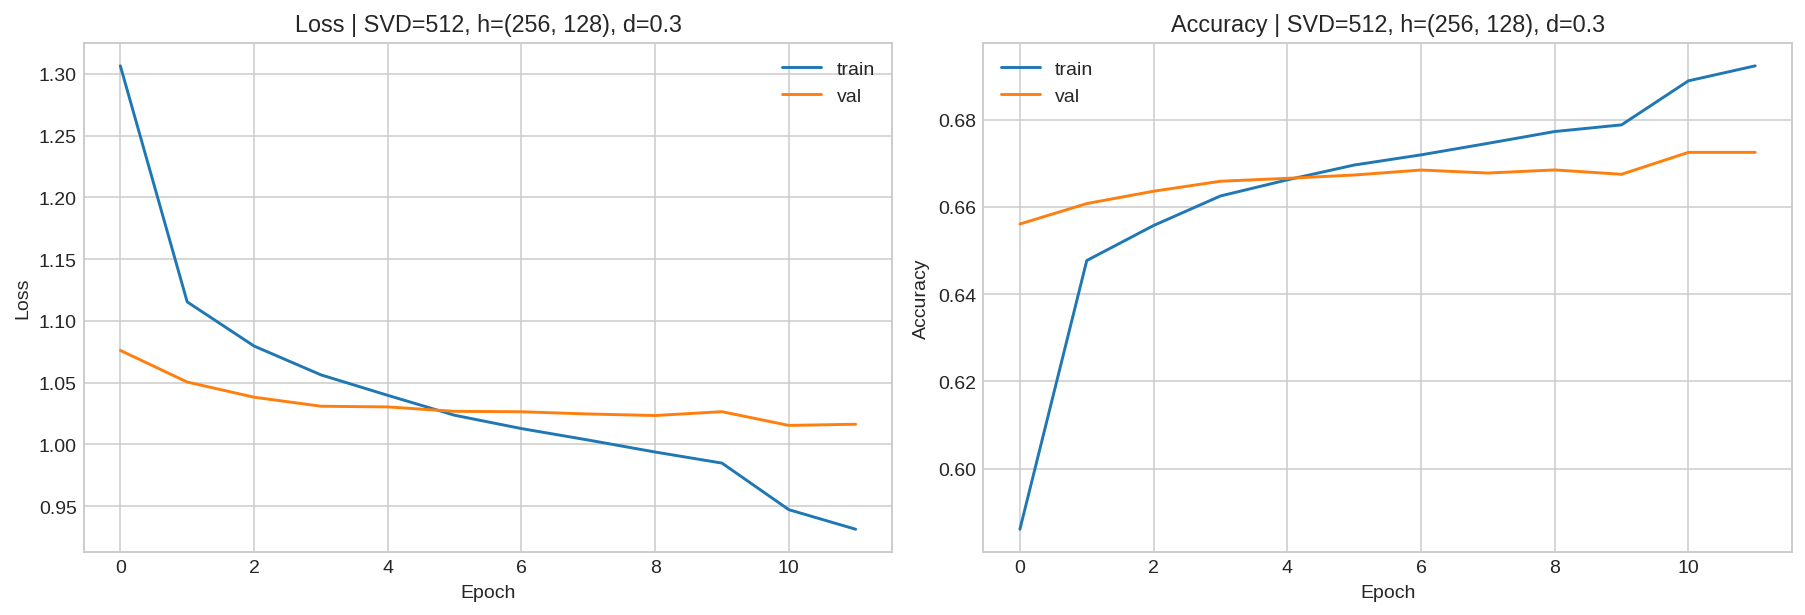


TF-IDF(SVD 512) + MLP (Val) | h=(256, 128) d=0.3
                        precision    recall  f1-score   support

    Business & Finance      0.645     0.428     0.515      4213
  Computers & Internet      0.787     0.837     0.811      4194
 Education & Reference      0.564     0.436     0.492      4227
 Entertainment & Music      0.618     0.658     0.637      4170
Family & Relationships      0.652     0.776     0.708      4207
                Health      0.691     0.771     0.729      4179
 Politics & Government      0.670     0.774     0.718      4198
 Science & Mathematics      0.655     0.735     0.693      4181
     Society & Culture      0.593     0.508     0.547      4212
                Sports      0.806     0.807     0.806      4219

              accuracy                          0.673     42000
             macro avg      0.668     0.673     0.666     42000
          weighted avg      0.668     0.673     0.665     42000



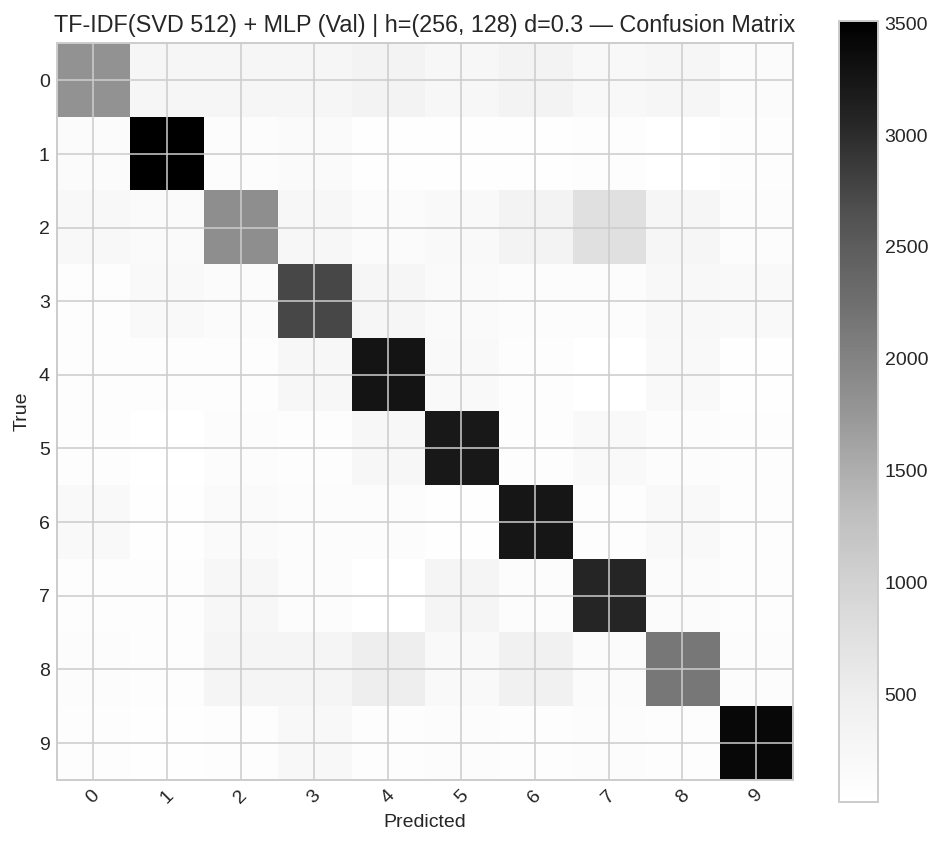

   [VAL METRICS] Acc=0.6725 | F1-macro=0.6656 | F1-weighted=0.6654
Epoch 1/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.5161 - loss: 1.5033 - val_accuracy: 0.6550 - val_loss: 1.0801 - learning_rate: 0.0010
Epoch 2/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.6426 - loss: 1.1326 - val_accuracy: 0.6595 - val_loss: 1.0547 - learning_rate: 0.0010
Epoch 3/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.6513 - loss: 1.0923 - val_accuracy: 0.6629 - val_loss: 1.0437 - learning_rate: 0.0010
Epoch 4/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.6580 - loss: 1.0715 - val_accuracy: 0.6630 - val_loss: 1.0388 - learning_rate: 0.0010
Epoch 5/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.6621 - loss: 1.0518 - val_accuracy: 0.6641 - val_loss: 1.0372 - learning_rate: 0.0010
Epoch 6/12
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.6645 - loss: 1.0367 - val_accuracy: 0.6663 - val_loss: 1.0349 - learning_rate: 0.00

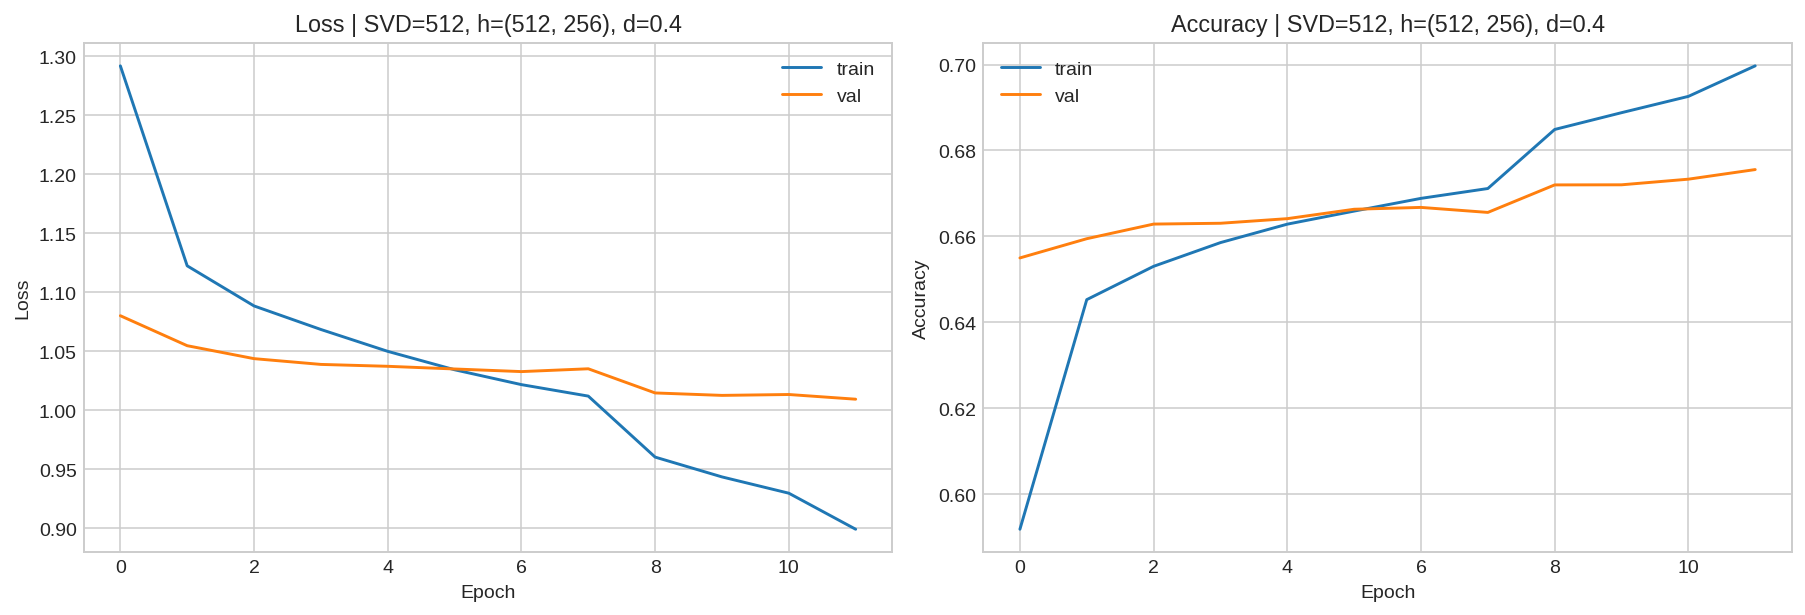


TF-IDF(SVD 512) + MLP (Val) | h=(512, 256) d=0.4
                        precision    recall  f1-score   support

    Business & Finance      0.668     0.412     0.509      4213
  Computers & Internet      0.776     0.847     0.810      4194
 Education & Reference      0.587     0.416     0.487      4227
 Entertainment & Music      0.615     0.663     0.638      4170
Family & Relationships      0.653     0.779     0.710      4207
                Health      0.700     0.770     0.733      4179
 Politics & Government      0.683     0.771     0.724      4198
 Science & Mathematics      0.632     0.764     0.692      4181
     Society & Culture      0.591     0.527     0.557      4212
                Sports      0.820     0.810     0.815      4219

              accuracy                          0.676     42000
             macro avg      0.672     0.676     0.668     42000
          weighted avg      0.673     0.676     0.667     42000



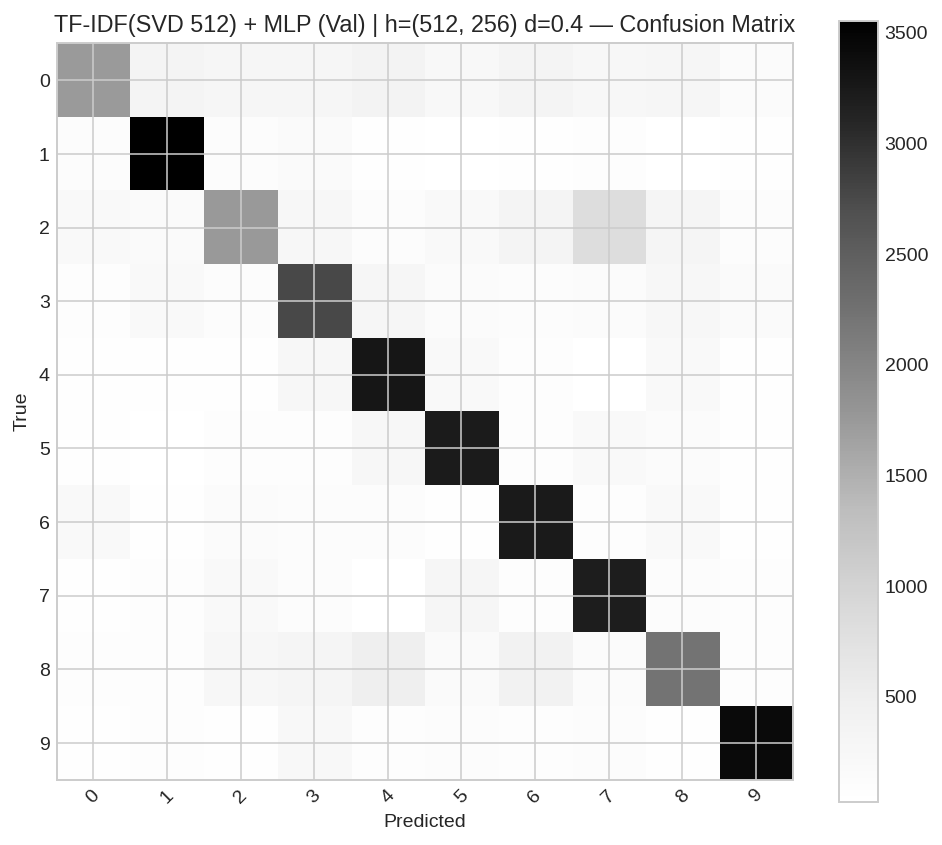

   [VAL METRICS] Acc=0.6755 | F1-macro=0.6676 | F1-weighted=0.6675
Selected MLP: {'svd_components': 512, 'hidden': (512, 256), 'dropout': 0.4, 'batch_size': 128, 'epochs': 12}  (Val F1-macro= 0.6676 )
Epoch 1/12
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.5310 - loss: 1.4604
Epoch 2/12
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.6443 - loss: 1.1273
Epoch 3/12
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.6546 - loss: 1.0928
Epoch 4/12
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.6589 - loss: 1.0709
Epoch 5/12
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.6626 - loss: 1.0548
Epoch 6/12
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.6661 - loss: 1.0390
Epoch 7/12
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.6688 - loss: 1.0300
Epoch 8/12
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - accuracy: 0.6711 - loss: 1.0160
Epoch 9/12
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.6729 - lo

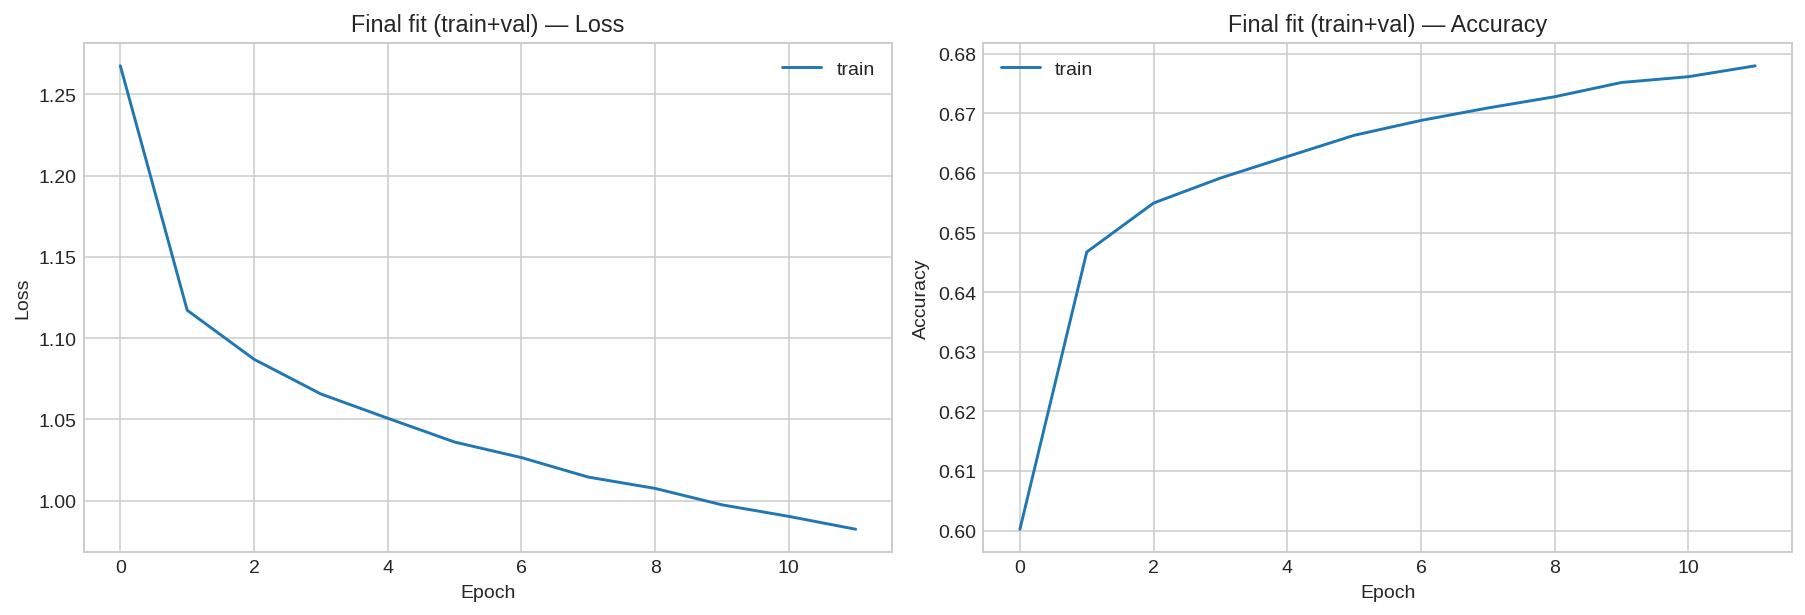


TF-IDF(SVD) + MLP (Test)
                        precision    recall  f1-score   support

    Business & Finance      0.666     0.409     0.507      6000
  Computers & Internet      0.749     0.864     0.802      6000
 Education & Reference      0.582     0.409     0.480      6000
 Entertainment & Music      0.624     0.645     0.634      6000
Family & Relationships      0.654     0.758     0.702      5999
                Health      0.697     0.778     0.735      6000
 Politics & Government      0.682     0.768     0.723      6000
 Science & Mathematics      0.663     0.733     0.696      6000
     Society & Culture      0.547     0.540     0.543      6000
                Sports      0.804     0.807     0.806      6000

              accuracy                          0.671     59999
             macro avg      0.667     0.671     0.663     59999
          weighted avg      0.667     0.671     0.663     59999



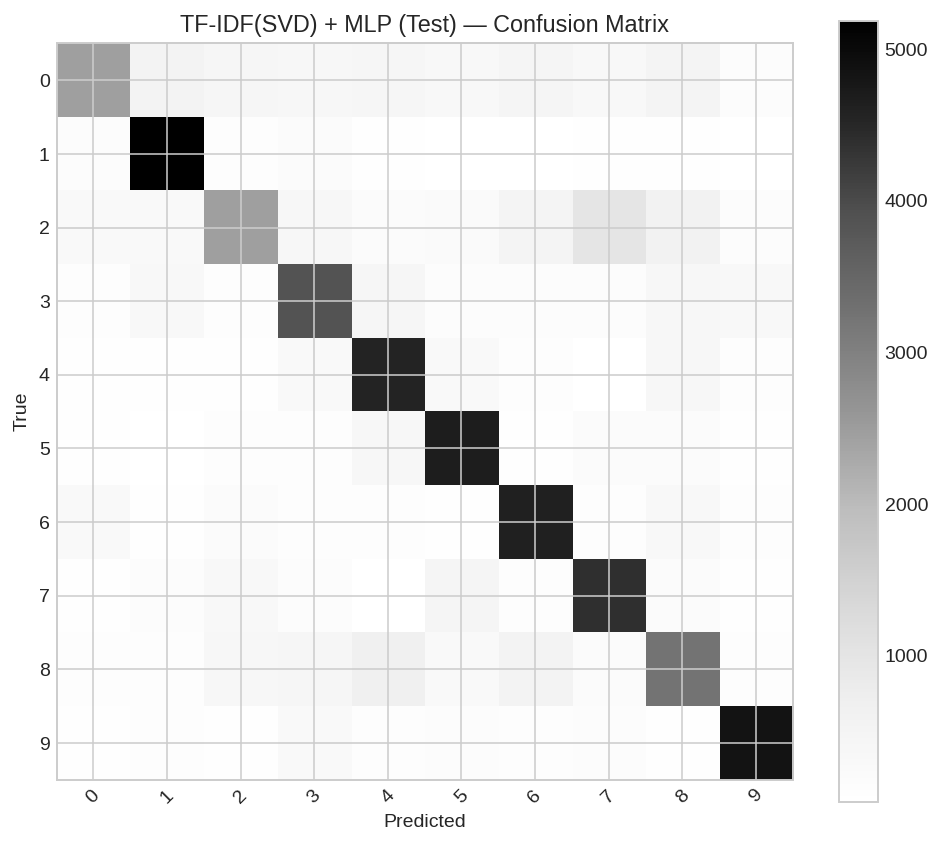

MLP(SVD) | best params: {'svd_components': 512, 'hidden': (512, 256), 'dropout': 0.4, 'batch_size': 128, 'epochs': 12}
 Val F1(macro): 0.6676328338092582 | Test F1(macro): 0.6630


In [ ]:
# DNN on dense features: TF-IDF -> SVD (dense) -> small MLP
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# Plotting style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.dpi"] = 140

tf.random.set_seed(42); np.random.seed(42)
num_classes = len(labels_names)

def build_mlp(input_dim, hidden=(256,128), dropout=0.3, n_classes=10):
    m = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(hidden[0], activation="relu"),
        layers.Dropout(dropout),
        layers.Dense(hidden[1], activation="relu"),
        layers.Dropout(dropout),
        layers.Dense(n_classes, activation="softmax"),
    ])
    m.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return m

best_cfg, best_val_pred, best_val_f1 = None, None, -1.0

for n_comp in [256, 512]:
    svd = TruncatedSVD(n_components=n_comp, random_state=42)
    Xtr_proj  = svd.fit_transform(Xtr_tf).astype("float32")
    Xval_proj = svd.transform(Xval_tf).astype("float32")

    scaler = StandardScaler(with_mean=True)
    Xtr_proj  = scaler.fit_transform(Xtr_proj).astype("float32")
    Xval_proj = scaler.transform(Xval_proj).astype("float32")

    search_grid = [
        {"hidden": (256,128), "dropout": 0.30, "batch_size": 128, "epochs": 15},
        {"hidden": (512,256), "dropout": 0.40, "batch_size": 128, "epochs": 15},
    ]
    for cfg in search_grid:
        mlp = build_mlp(n_comp, hidden=cfg["hidden"], dropout=cfg["dropout"], n_classes=num_classes)
        es  = callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
        rl  = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1, verbose=0)

        hist = mlp.fit(
            Xtr_proj, y_tr,
            validation_data=(Xval_proj, y_val),
            epochs=cfg["epochs"], batch_size=cfg["batch_size"],
            verbose=1, callbacks=[es, rl]
        ).history

        # ---- Plot curves for this run ----
        fig = plt.figure(figsize=(13,4.5))
        # Loss
        plt.subplot(1,2,1)
        plt.plot(hist["loss"], label="train")
        plt.plot(hist["val_loss"], label="val")
        plt.title(f"Loss | SVD={n_comp}, h={cfg['hidden']}, d={cfg['dropout']}")
        plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
        # Accuracy
        plt.subplot(1,2,2)
        plt.plot(hist["accuracy"], label="train")
        plt.plot(hist["val_accuracy"], label="val")
        plt.title(f"Accuracy | SVD={n_comp}, h={cfg['hidden']}, d={cfg['dropout']}")
        plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()
        plt.tight_layout(); plt.show()

        # Validation predictions + metrics
        yv = mlp.predict(Xval_proj, batch_size=256, verbose=0).argmax(axis=1)
        show_report_and_cm(y_val, yv, labels_names,
                           f"TF-IDF(SVD {n_comp}) + MLP (Val) | h={cfg['hidden']} d={cfg['dropout']}")
        acc, f1m, f1w = compute_metrics(y_val, yv)
        print(f"   [VAL METRICS] Acc={acc:.4f} | F1-macro={f1m:.4f} | F1-weighted={f1w:.4f}")

        # Track best config
        if f1m > best_val_f1:
            best_val_f1  = f1m
            best_cfg     = {"svd_components": n_comp, **cfg}
            best_val_pred= yv

print("Selected MLP:", best_cfg, " (Val F1-macro=", round(best_val_f1,4), ")")

# ===== Final retrain on (train+val) and test =====
tfidf_vec_full = TfidfVectorizer(min_df=3, max_df=0.9,
                                 max_features=TFIDF_MAX_FEATURES,
                                 ngram_range=TFIDF_NGRAM_RANGE,
                                 sublinear_tf=True, norm="l2")
Xfull_tf = tfidf_vec_full.fit_transform(pd.concat([tr_df["clean_text"], val_df["clean_text"]]))
y_full   = np.concatenate([y_tr, y_val])
Xtest_tf = tfidf_vec_full.transform(test_df["clean_text"])

svd_final    = TruncatedSVD(n_components=best_cfg["svd_components"], random_state=42)
scaler_final = StandardScaler(with_mean=True)
Xfull_proj   = scaler_final.fit_transform(svd_final.fit_transform(Xfull_tf)).astype("float32")
Xtest_proj   = scaler_final.transform(svd_final.transform(Xtest_tf)).astype("float32")

mlp_final = build_mlp(best_cfg["svd_components"],
                      hidden=best_cfg["hidden"],
                      dropout=best_cfg["dropout"],
                      n_classes=num_classes)

final_epochs = max(8, best_cfg["epochs"])  # allow longer training
final_hist = mlp_final.fit(
    Xfull_proj, y_full,
    epochs=final_epochs, batch_size=best_cfg["batch_size"], verbose=1
).history

# Plot curves for final train (train+val)
fig = plt.figure(figsize=(13,4.5))
plt.subplot(1,2,1)
plt.plot(final_hist["loss"], label="train")
plt.title("Final fit (train+val) — Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1,2,2)
plt.plot(final_hist["accuracy"], label="train")
plt.title("Final fit (train+val) — Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()
plt.tight_layout(); plt.show()

# Test once
yt = mlp_final.predict(Xtest_proj, batch_size=256, verbose=0).argmax(axis=1)
show_report_and_cm(y_test, yt, labels_names, "TF-IDF(SVD) + MLP (Test)")
log_tfidf("MLP(SVD)", best_cfg, best_val_pred, yt)
